

# **Industrial Safety and Health Analysis**
**NLP CHATBOT for industrial safety risk**

 CONTEXT:  
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
• DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:  
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
‣ Genre: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.


**

# **Import and Data preprocessing**


In [ ]:
!pip install unidecode
!pip install autocorrect
!pip install google_trans_new
!pip install ann_visualizer
!pip install googletrans



In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

Importing all essential libraries for preprocessing EDA and model building


In [ ]:
# Importing all the necessary libraries
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import unicodedata
import unidecode
from autocorrect import Speller
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.layers import Input, Concatenate
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.constraints import MaxNorm, MinMaxNorm, UnitNorm
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.callbacks import EarlyStopping, ModelCheckpoint

from google_trans_new import google_translator

from ann_visualizer.visualize import ann_viz;
# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# save models
import pickle


downloading nltk stop words for nlp preprocessing


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# **LOADING DATA SET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/My Drive/Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")

In [ ]:
# A quick look at the data
df.head(10)

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   
5           5 2016-01-12  Country_02  Local_05          Metals              I   
6           6 2016-01-16  Country_02  Local_05          Metals              I   
7           7 2016-01-17  Country_01  Local_04          Mining              I   
8           8 2016-01-19  Country_02  Local_02          Mining              I   
9           9 2016-01-26  Country_01  Local_06          Metals              I   

  Potential Accident Level Genre Employee or Third Party  \
0                       IV  Male             Third Party   
1                       IV  Male                Employee   
2                      III  Male    Third Party (Remote)   
3                        I  Male             Third Party   
4                       IV  Male             Third Party   
5                      III  Male    Third Party (Remote)   
6                      III  Male                Employee   
7                      III  Male             Third Party   
8                       IV  Male    Third Party (Remote)   
9                       II  Male             Third Party   

                  Critical Risk  \
0                       Pressed   
1           Pressurized Systems   
2                  Manual Tools   
3                        Others   
4                        Others   
5           Pressurized Systems   
6  Fall prevention (same level)   
7                       Pressed   
8                        Others   
9           Chemical substances   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...  
5  During the unloading operation of the ustulado...  
6  The collaborator reports that he was on street...  
7  At approximately 04:50 p.m., when the mechanic...  
8  Employee was sitting in the resting area at le...  
9  At the moment the forklift operator went to ma...

# **Data pre-processing**

In [ ]:
# Drop irrelevant column Unnamed:0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [ ]:
# Defining a function which gives the dataframe with all the analysis.
def indetailtable(df):
    print('Dataset Shape: {}'.format(df.shape))
    print('Total Number of rows in dataset: {}'.format(df.shape[0]))
    print('Total Number of columns in dataset: {}'.format(df.shape[1]))
    print('Various datatypes present in the dataset are: {}'.format(df.dtypes.value_counts()))

    summary = pd.DataFrame(df.dtypes, columns=['dtypes']).reset_index()
    summary = summary.rename(columns={'index': 'Name'})

    summary['Missing_values'] = df.isnull().sum().values
    summary['Unique_values'] = df.nunique().values
    summary['1st value'] = df.loc[0].values
    summary['2nd Value'] = df.loc[1].values
    summary['423th Value'] = df.iloc[-2].values
    summary['424th Value'] = df.iloc[-1].values
    return summary

In [ ]:
indetailtable(df)

Dataset Shape: (425, 10)
Total Number of rows in dataset: 425
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object            9
datetime64[ns]    1
Name: count, dtype: int64


Name          dtypes  Missing_values  Unique_values  \
0                      Data  datetime64[ns]               0            287   
1                 Countries          object               0              3   
2                     Local          object               0             12   
3           Industry Sector          object               0              3   
4            Accident Level          object               0              5   
5  Potential Accident Level          object               0              6   
6                     Genre          object               0              2   
7   Employee or Third Party          object               0              3   
8             Critical Risk          object               0             33   
9               Description          object               0            411   

                                           1st value  \
0                                2016-01-01 00:00:00   
1                                         Country_01   
2                                           Local_01   
3                                             Mining   
4                                                  I   
5                                                 IV   
6                                               Male   
7                                        Third Party   
8                                            Pressed   
9  While removing the drill rod of the Jumbo 08 f...   

                                           2nd Value  \
0                                2016-01-02 00:00:00   
1                                         Country_02   
2                                           Local_02   
3                                             Mining   
4                                                  I   
5                                                 IV   
6                                               Male   
7                                           Employee   
8                                Pressurized Systems   
9  During the activation of a sodium sulphide pum...   

                                         423th Value  \
0                                2017-07-06 00:00:00   
1                                         Country_02   
2                                           Local_05   
3                                             Metals   
4                                                  I   
5                                                 II   
6                                               Male   
7                                           Employee   
8                                                Cut   
9  The Employee performed the activity of strippi...   

                                         424th Value  
0                                2017-07-09 00:00:00  
1                                         Country_01  
2                                           Local_04  
3                                             Mining  
4                                                  I  
5                                                 II  
6                                             Female  
7                                        Third Party  
8                       Fall prevention (same level)  
9  At 10:00 a.m., when the assistant cleaned the ...

Insights:

Dataset contains total of 10 columns in which all are object data type.
There are no null / missing values present in the dataset, hence we can safely move ahead.
There are 7 duplicates for which all the columns have same value, These duplicate records refer to different persons involved in the same accident.There are only 7 records hence we will be dropping them down the line. As capturing the number of people will not be helpful in our analysis.

In [ ]:
# Checking those the duplicates we found in above dataframe
print('There are {} duplicates in the dataset as below'.format(df.duplicated().sum()))
df[df.duplicated()]

There are 7 duplicates in the dataset as below


Data   Countries     Local Industry Sector Accident Level  \
77  2016-04-01  Country_01  Local_01          Mining              I   
262 2016-12-01  Country_01  Local_03          Mining              I   
303 2017-01-21  Country_02  Local_02          Mining              I   
345 2017-03-02  Country_03  Local_10          Others              I   
346 2017-03-02  Country_03  Local_10          Others              I   
355 2017-03-15  Country_03  Local_10          Others              I   
397 2017-05-23  Country_01  Local_04          Mining              I   

    Potential Accident Level Genre Employee or Third Party  \
77                         V  Male    Third Party (Remote)   
262                       IV  Male                Employee   
303                        I  Male    Third Party (Remote)   
345                        I  Male             Third Party   
346                        I  Male             Third Party   
355                        I  Male             Third Party   
397                       IV  Male             Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

In [ ]:
# Drop the duplicate values from the dataframe using drop_duplicates function.
df.drop_duplicates(inplace=True)
print('After removing duplicates the shape of the dataset is:',df.shape)

After removing duplicates the shape of the dataset is: (418, 10)


In [ ]:
indetailtable(df)

Dataset Shape: (418, 10)
Total Number of rows in dataset: 418
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object            9
datetime64[ns]    1
Name: count, dtype: int64


Name          dtypes  Missing_values  Unique_values  \
0                      Data  datetime64[ns]               0            287   
1                 Countries          object               0              3   
2                     Local          object               0             12   
3           Industry Sector          object               0              3   
4            Accident Level          object               0              5   
5  Potential Accident Level          object               0              6   
6                     Genre          object               0              2   
7   Employee or Third Party          object               0              3   
8             Critical Risk          object               0             33   
9               Description          object               0            411   

                                           1st value  \
0                                2016-01-01 00:00:00   
1                                         Country_01   
2                                           Local_01   
3                                             Mining   
4                                                  I   
5                                                 IV   
6                                               Male   
7                                        Third Party   
8                                            Pressed   
9  While removing the drill rod of the Jumbo 08 f...   

                                           2nd Value  \
0                                2016-01-02 00:00:00   
1                                         Country_02   
2                                           Local_02   
3                                             Mining   
4                                                  I   
5                                                 IV   
6                                               Male   
7                                           Employee   
8                                Pressurized Systems   
9  During the activation of a sodium sulphide pum...   

                                         423th Value  \
0                                2017-07-06 00:00:00   
1                                         Country_02   
2                                           Local_05   
3                                             Metals   
4                                                  I   
5                                                 II   
6                                               Male   
7                                           Employee   
8                                                Cut   
9  The Employee performed the activity of strippi...   

                                         424th Value  
0                                2017-07-09 00:00:00  
1                                         Country_01  
2                                           Local_04  
3                                             Mining  
4                                                  I  
5                                                 II  
6                                             Female  
7                                        Third Party  
8                       Fall prevention (same level)  
9  At 10:00 a.m., when the assistant cleaned the ...

* We can cleary observe that the above dataframe contains 7 duplicates in which only one or two column values are dissimilar among the datapoints where in the Description is matching, which is logically unsound.
* It can also be noticed that the incidents which are having duplicate values happened on the time stamp(Date Column).
* Hence we will be dropping these hidden duplicates which doesn't seem right logically

In [ ]:
# Dropping the duplicates we detected above.
df.drop_duplicates(subset=['Description'], keep='first', inplace=True)
print('After removing duplicates the shape of the dataset is:', df.shape)

After removing duplicates the shape of the dataset is: (411, 10)


In [ ]:
# Calling the function again to verify everything is correct.
indetailtable(df)

Dataset Shape: (411, 10)
Total Number of rows in dataset: 411
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object            9
datetime64[ns]    1
Name: count, dtype: int64


Name          dtypes  Missing_values  Unique_values  \
0                      Data  datetime64[ns]               0            287   
1                 Countries          object               0              3   
2                     Local          object               0             12   
3           Industry Sector          object               0              3   
4            Accident Level          object               0              5   
5  Potential Accident Level          object               0              6   
6                     Genre          object               0              2   
7   Employee or Third Party          object               0              3   
8             Critical Risk          object               0             33   
9               Description          object               0            411   

                                           1st value  \
0                                2016-01-01 00:00:00   
1                                         Country_01   
2                                           Local_01   
3                                             Mining   
4                                                  I   
5                                                 IV   
6                                               Male   
7                                        Third Party   
8                                            Pressed   
9  While removing the drill rod of the Jumbo 08 f...   

                                           2nd Value  \
0                                2016-01-02 00:00:00   
1                                         Country_02   
2                                           Local_02   
3                                             Mining   
4                                                  I   
5                                                 IV   
6                                               Male   
7                                           Employee   
8                                Pressurized Systems   
9  During the activation of a sodium sulphide pum...   

                                         423th Value  \
0                                2017-07-06 00:00:00   
1                                         Country_02   
2                                           Local_05   
3                                             Metals   
4                                                  I   
5                                                 II   
6                                               Male   
7                                           Employee   
8                                                Cut   
9  The Employee performed the activity of strippi...   

                                         424th Value  
0                                2017-07-09 00:00:00  
1                                         Country_01  
2                                           Local_04  
3                                             Mining  
4                                                  I  
5                                                 II  
6                                             Female  
7                                        Third Party  
8                       Fall prevention (same level)  
9  At 10:00 a.m., when the assistant cleaned the ...




*   Now we can see that after removing the duplicates the count of unique
values in the description column and the total number of datapoints in the dataset is matching.
*   Also we see date column mispelled as Data and so we rename it



In [ ]:
# Rename column 'Data' to 'Date'
df.rename(columns={'Data': 'Date'}, inplace=True)
df.rename(columns={'Genre':'Gender'},inplace=True)
df.rename(columns={'Employee or Third Party':'Employee Type'},inplace=True)
# Verify the column renaming
print(df.head())

        Date   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f

In [ ]:
df['Countries'].replace(['Country_01', 'Country_02', 'Country_03'],[1, 2, 3], inplace=True)
df['Local'].replace(['Local_01', 'Local_02', 'Local_03','Local_04','Local_05','Local_06','Local_07','Local_08','Local_09','Local_10','Local_11','Local_12']
                    ,[1, 2, 3,4,5,6,7,8,9,10,11,12], inplace=True)
df.head()


Date  Countries  Local Industry Sector Accident Level  \
0 2016-01-01          1      1          Mining              I   
1 2016-01-02          2      2          Mining              I   
2 2016-01-06          1      3          Mining              I   
3 2016-01-08          1      4          Mining              I   
4 2016-01-10          1      4          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

# **EDA and DATA Visualization**

In [ ]:
#For time series analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())

In [ ]:
df.head()

Date  Countries  Local Industry Sector Accident Level  \
0 2016-01-01          1      1          Mining              I   
1 2016-01-02          2      2          Mining              I   
2 2016-01-06          1      3          Mining              I   
3 2016-01-08          1      4          Mining              I   
4 2016-01-10          1      4          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday  
3     Friday  
4     Sunday

In [ ]:
df['Countries'].value_counts()

Countries
1    245
2    127
3     39
Name: count, dtype: int64

In [ ]:
df['Local'].value_counts()

Local
3     87
5     59
1     55
4     55
6     46
10    39
8     27
2     23
7     12
12     4
9      2
11     2
Name: count, dtype: int64

In [ ]:
df['Industry Sector'].value_counts()

Industry Sector
Mining    232
Metals    134
Others     45
Name: count, dtype: int64

In [ ]:
def grab_col_names(df, cat_th=10, car_th=20):

    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
            df: Dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Examples
    ------
        You just need to call the function and send the dataframe.)

        --> grab_col_names(df)

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables:
        cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(60, '~'),"\n")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}',"\n")
    print("".center(60, '~'))

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~ RESULT ~~~~~~~~~~~~~~~~~~~~~~~~~~ 

cat_cols: 8
num_cols: 4
cat_but_car: 2
num_but_cat: 2 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

for col in num_cols:
    print(col, check_outlier(df, col))

Date False
Local False
Month False
Day False


In [ ]:
df.head()

Date  Countries  Local Industry Sector Accident Level  \
0 2016-01-01          1      1          Mining              I   
1 2016-01-02          2      2          Mining              I   
2 2016-01-06          1      3          Mining              I   
3 2016-01-08          1      4          Mining              I   
4 2016-01-10          1      4          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday  
3     Friday  
4     Sunday

In [ ]:
for col in df.columns:
    if (col!='Description') and (col!='Date') and(col!='Day') and (col!='Year') and (col!='Month') and (col!='Weekday'):
        print(df[col].value_counts())
        print('*'*50)

Countries
1    245
2    127
3     39
Name: count, dtype: int64
**************************************************
Local
3     87
5     59
1     55
4     55
6     46
10    39
8     27
2     23
7     12
12     4
9      2
11     2
Name: count, dtype: int64
**************************************************
Industry Sector
Mining    232
Metals    134
Others     45
Name: count, dtype: int64
**************************************************
Accident Level
I      303
II      39
III     31
IV      30
V        8
Name: count, dtype: int64
**************************************************
Potential Accident Level
IV     138
III    106
II      95
I       43
V       28
VI       1
Name: count, dtype: int64
**************************************************
Gender
Male      390
Female     21
Name: count, dtype: int64
**************************************************
Employee Type
Third Party             180
Employee                176
Third Party (Remote)     55
Name: count, dtype: int64
*********



*  There are no outliers in the dataset for date columns
*  There is only one level V1 of accident which we replace it to V



* There are total of Three countries and Twelve plants/cities overall,
* Three type of Industry sectors exist namely
      namely: 'Mining'⚒️, 'Metals'⚙️ and Others,
* Five type of accident levels (1 to 5) are present.
* Six type of Potential Accident Levels (1 to 6) and we see that there is only one value registered under 'Accident level 6' and   it can be replaced to level 5 to reduce the complexity
* Three type of employee types
      namely: 'Third Party', 'Employee', 'Third Party(Remote)'
* There are about 33 critical risks in which more than half of the incidents fall under the 'Others' category, these entries have been changed to 'Others' as part of the anonymization process.
* Level VI accident is having only one incident hence it can be replaced with Level V as it is more closer one

In [ ]:
# Replace Level 6 value to Level 5
df['Potential Accident Level'] = df['Potential Accident Level'].replace('VI', 'V')

In [ ]:
df['Potential Accident Level'].value_counts()

Potential Accident Level
IV     138
III    106
II      95
I       43
V       29
Name: count, dtype: int64

# **Visualization**

## Univariate Analysis

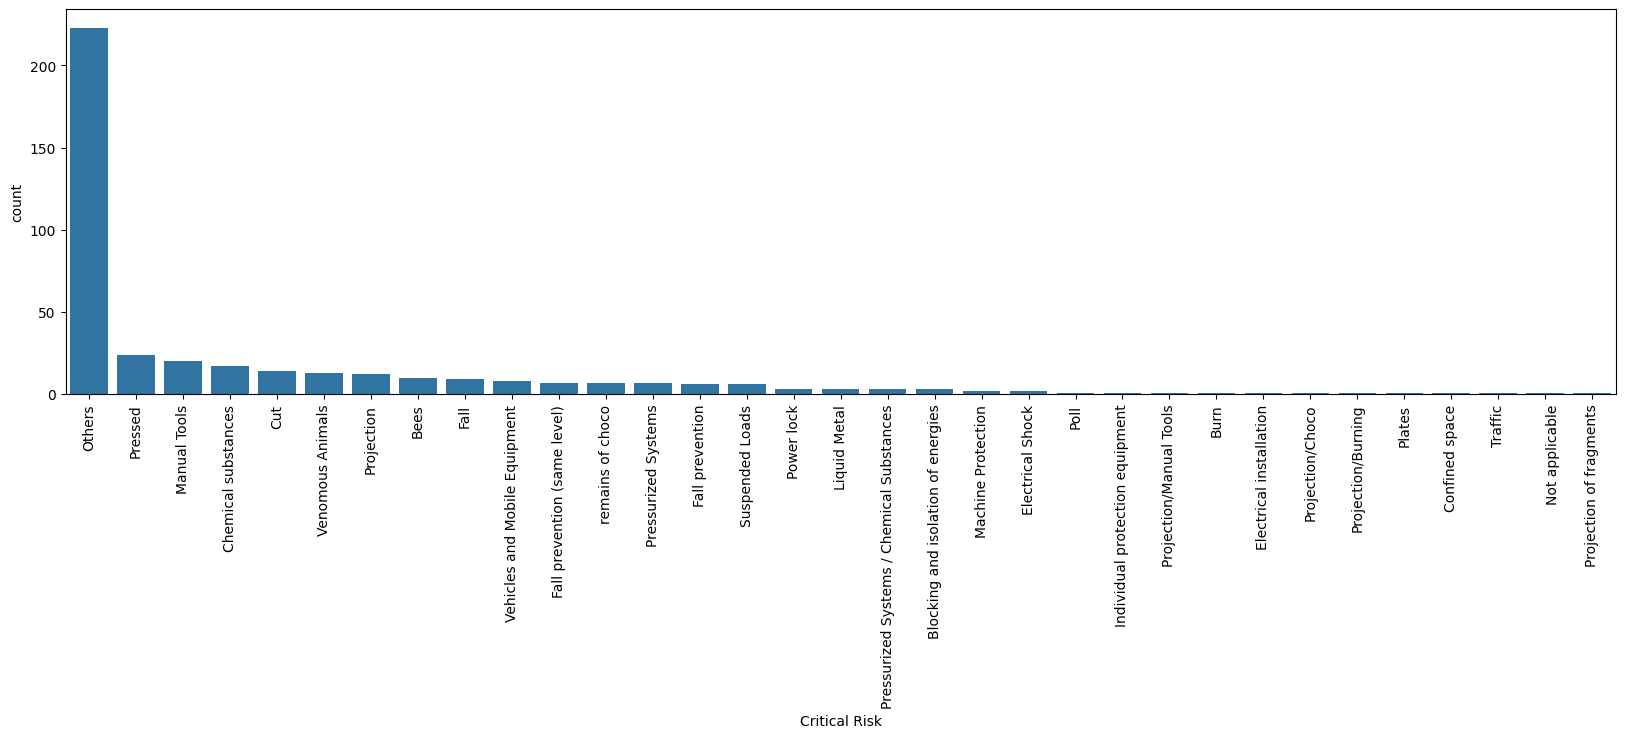

In [ ]:
plt.figure(figsize=(20,5))
descending_order = df['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=df['Critical Risk'],order=descending_order)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# Creating a function to make univariate plots for analysis
def plot(col, title, palette, edgecolor):

    value = df[col].value_counts()[1]
    plt.figure(figsize = (20,15))
    plt.subplot(2,2,1)
    sns.countplot(df[col], palette = palette, edgecolor = edgecolor, order=df[col].value_counts().index, alpha = 1.0, saturation=1);
    #sns.lineplot(df[col].value_counts().index, df[col].value_counts().values, palette='seismic')
    plt.title(title);

    plt.subplot(2,2,2)
    # colors = ['yellowgreen', 'violet', 'orange', 'grey', 'cyan']

    plt.pie(df[col].value_counts(), autopct = "%.2f",
       labels = df[col].value_counts().index , shadow = True, explode = [0.1]*len(df[col].value_counts().index), startangle = -135);
    plt.title(title);
    plt.show()

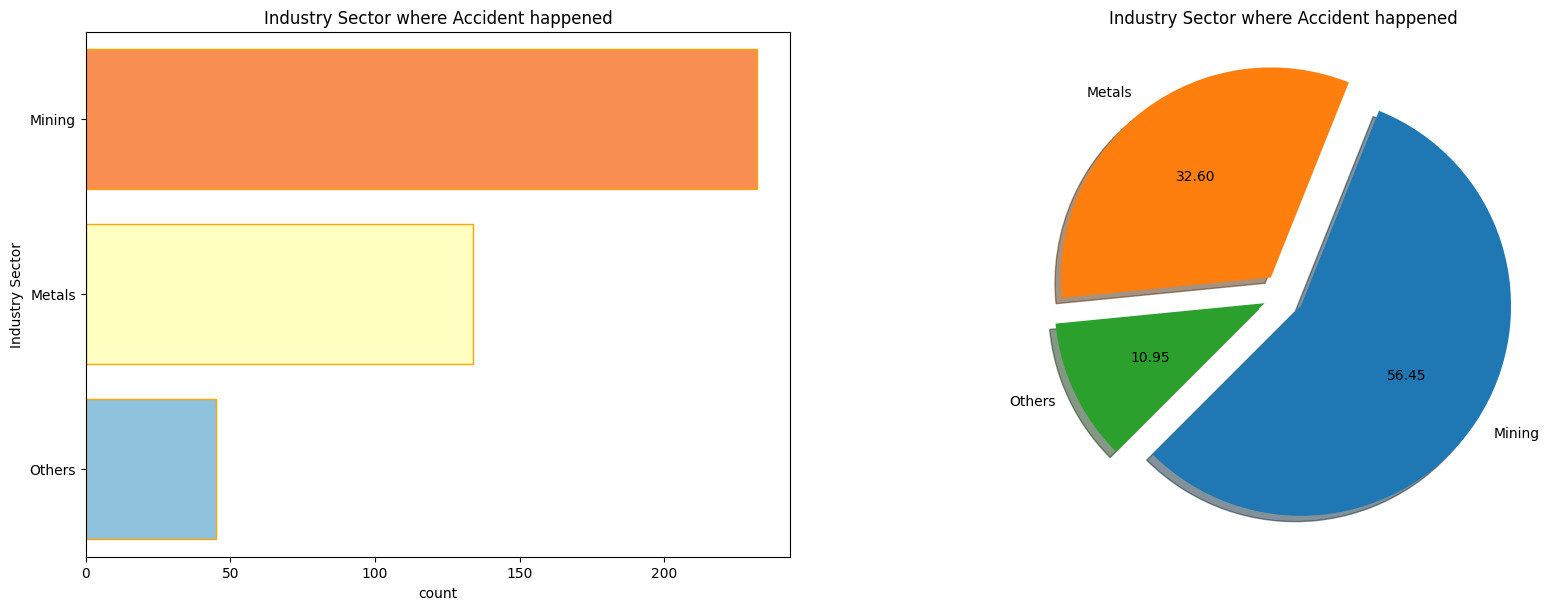

In [ ]:
plot('Industry Sector', 'Industry Sector where Accident happened', 'RdYlBu', 'orange')

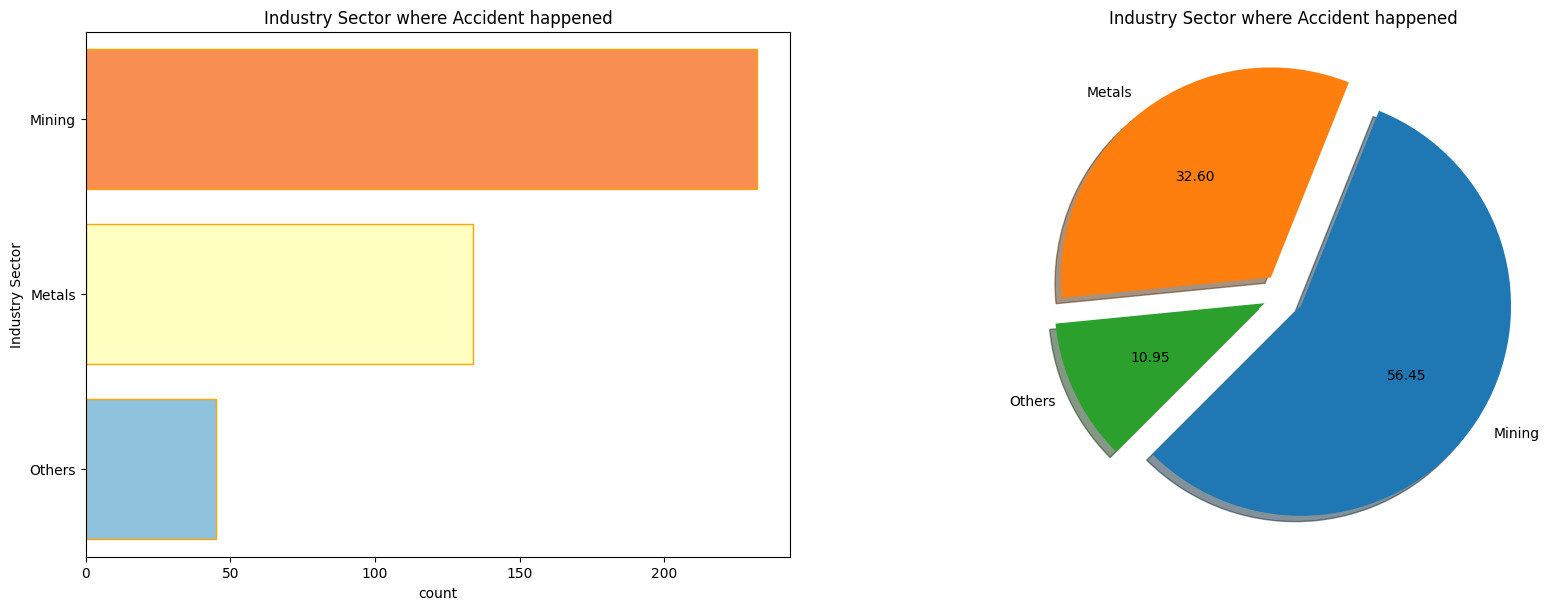

In [ ]:
plot('Industry Sector', 'Industry Sector where Accident happened', 'RdYlBu', 'orange')

* It clearly indicates that mining industries witness more accidents.
* We can say that the number of accidents in Mining Industry is considerably more than that in the Metal Industry, therefore mining job is more risky than the latter.

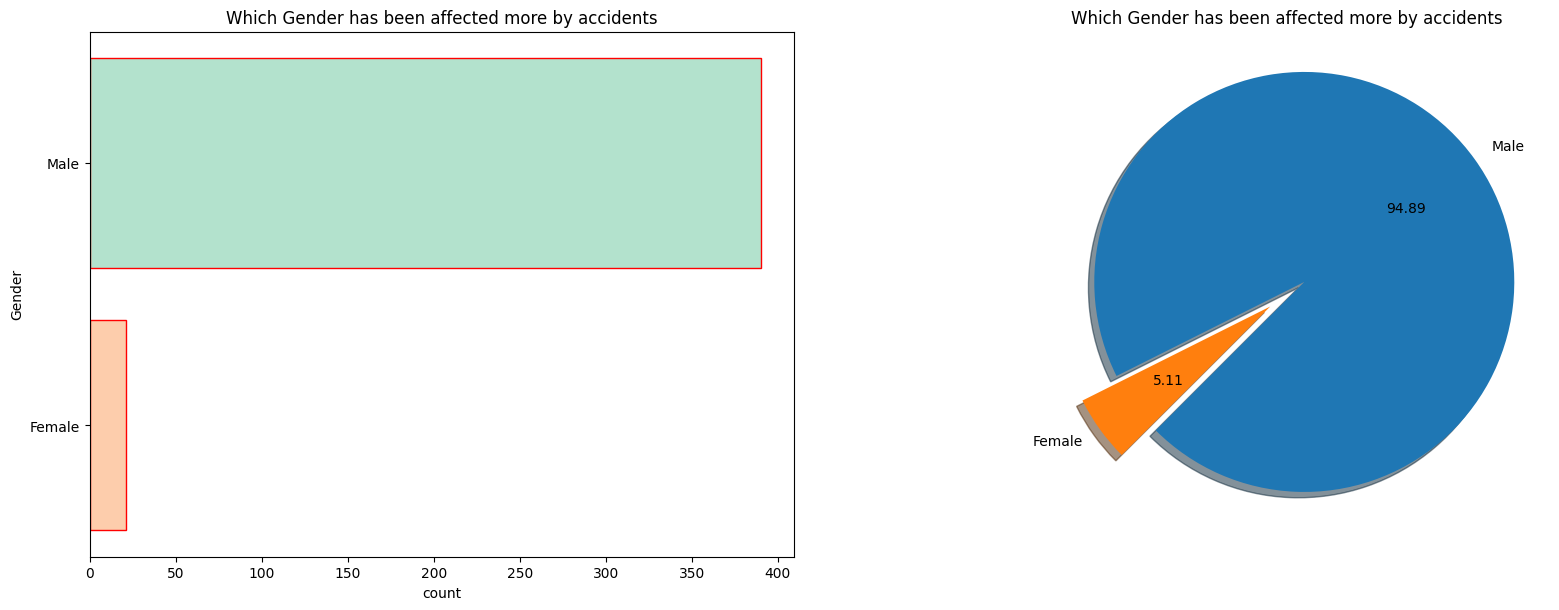

In [ ]:
plot('Gender', 'Which Gender has been affected more by accidents', 'Pastel2', 'red')

* As a characteristic of the industry, the proportion of Men employees is overwhelming.
* The dataset is biased towards Male employees.

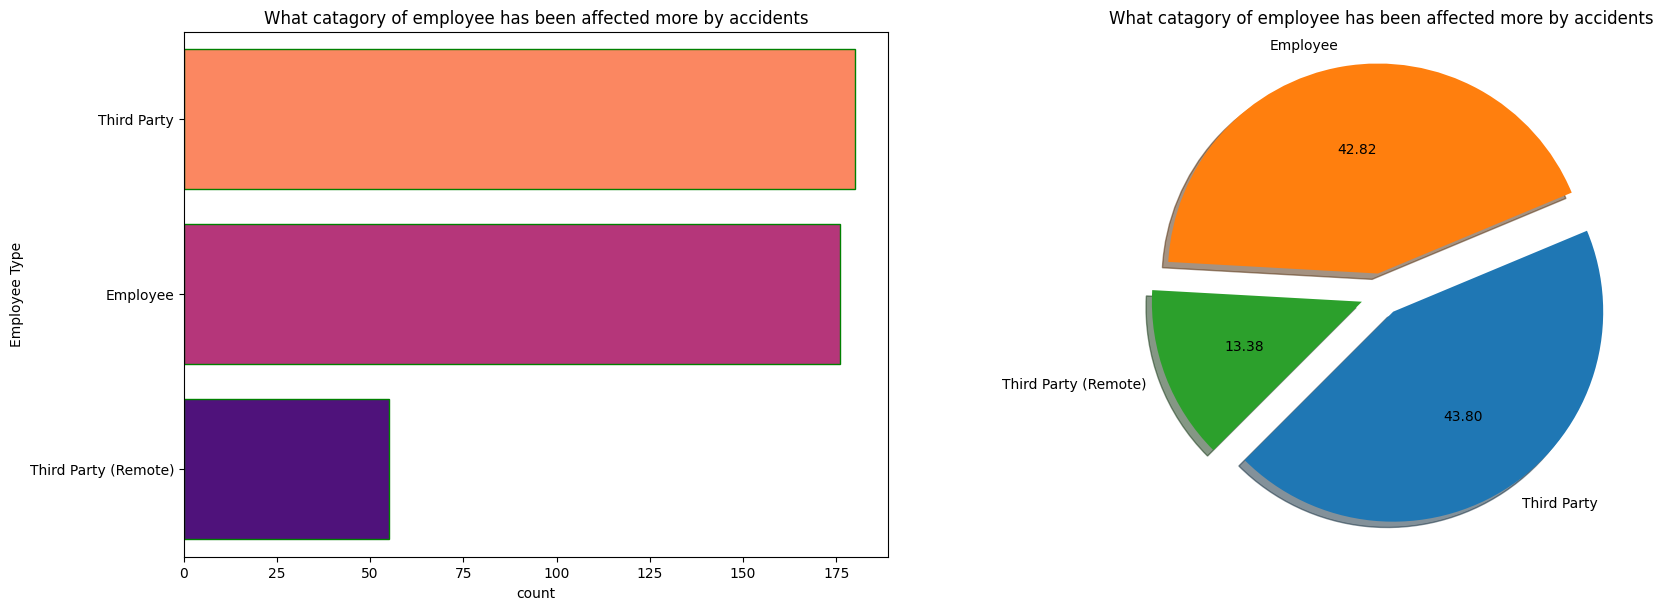

In [ ]:
plot('Employee Type', 'What catagory of employee has been affected more by accidents', 'magma_r', 'green')

Total number of Direct Employees and Third party employees are almost same, However, Third party remote employees are less in number.

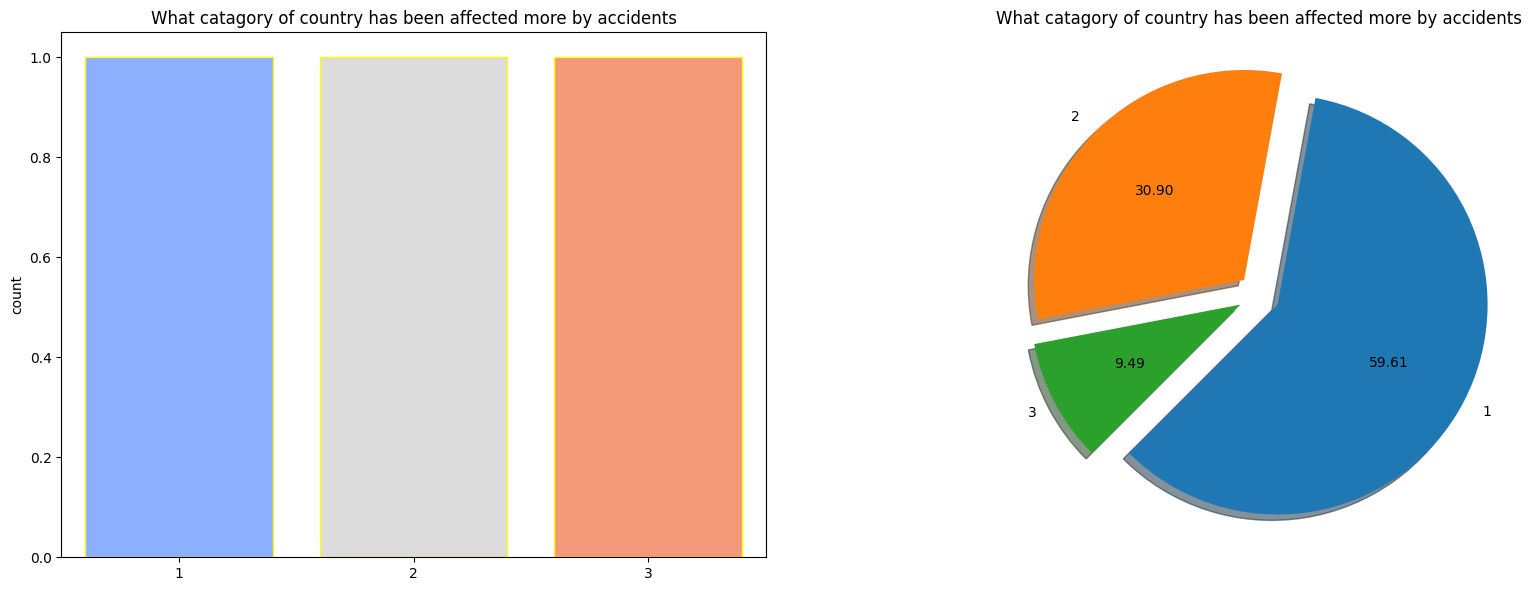

In [ ]:
plot('Countries', 'What catagory of country has been affected more by accidents', 'coolwarm', 'yellow')

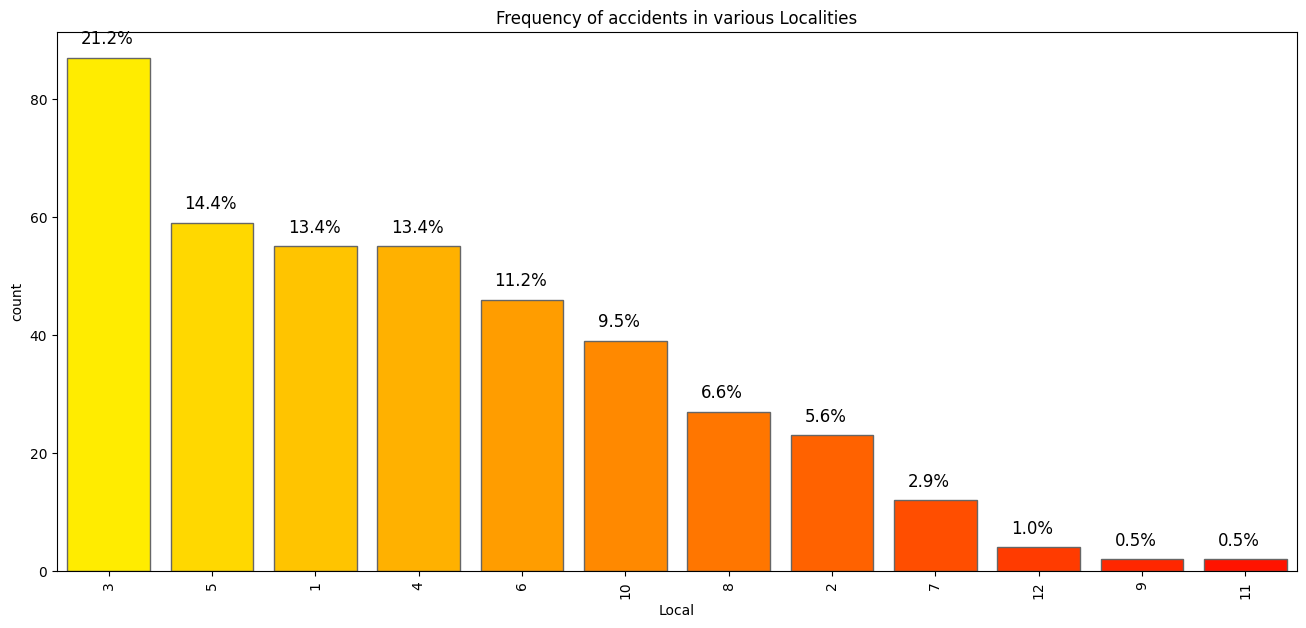

In [ ]:
# Locals Count
plt.figure(figsize = (16,7))
ax = sns.countplot(x = df['Local'], order=df['Local'].value_counts().index, palette = 'autumn_r', edgecolor='.4', saturation=1);
#sns.lineplot(df['Local'].value_counts().index, df['Local'].value_counts().values)

plt.title('Frequency of accidents in various Localities');
plt.xticks(rotation = 'vertical');

total = sum(df['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (10, 10),
                 textcoords = 'offset points')

Local_03 has recorded maximum number of accidents which is approx 21% of all the plants in the country.
This is followed by Local-05, Local-01 and so on.

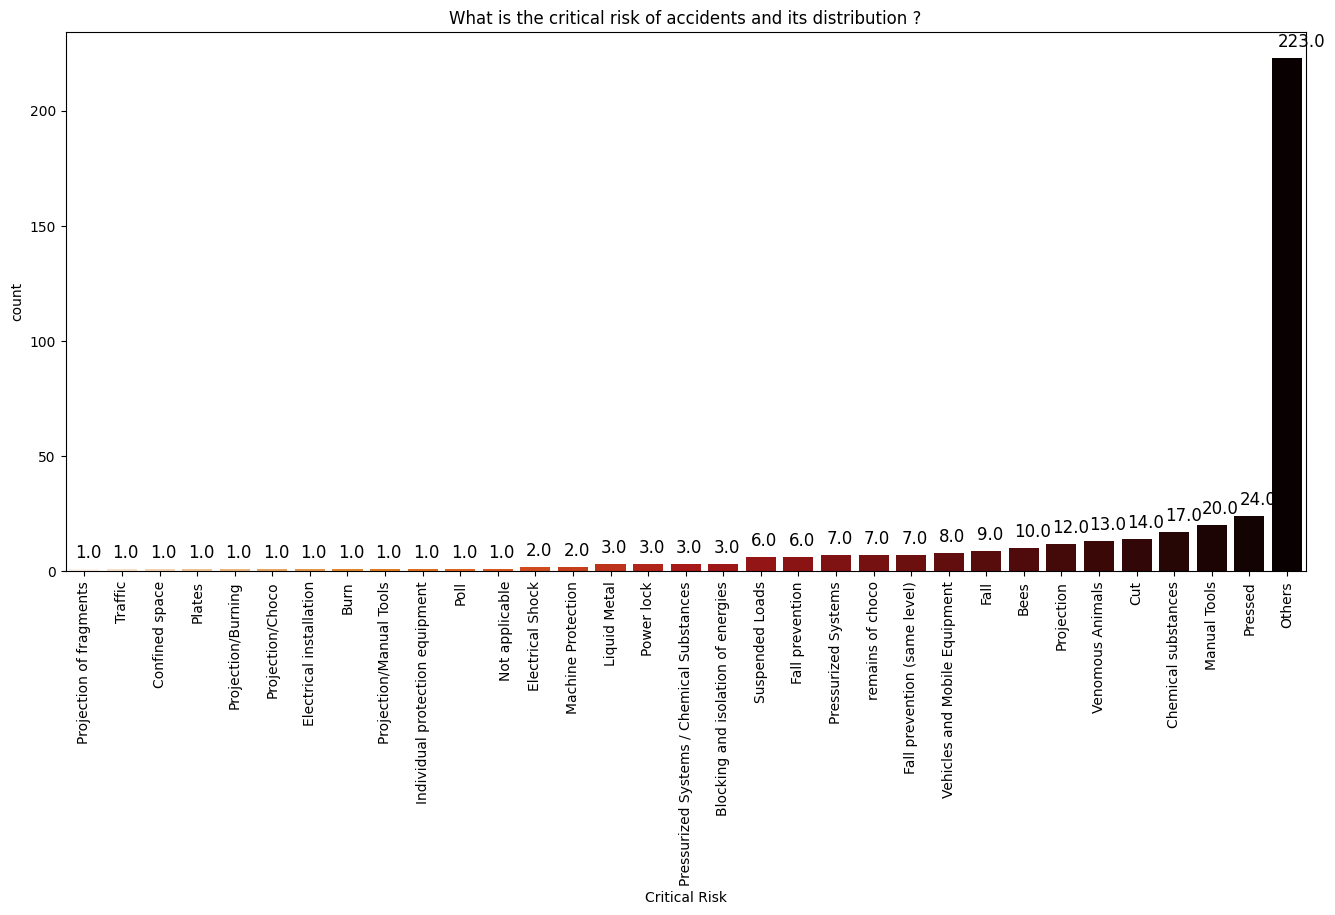

In [ ]:
# Critical Risk Count
plt.figure(figsize = (16,7))
ax = sns.countplot(x = df['Critical Risk'], order=df['Critical Risk'].value_counts().sort_values(ascending = True).index, palette = 'gist_heat_r');
plt.title('What is the critical risk of accidents and its distribution ?');
plt.xticks(rotation = 'vertical');

total = sum(df['Critical Risk'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (4, 8),
                 textcoords = 'offset points')

* Most of the Critical Risks are classified as 'Others' that is almost 50% of the dataset, hence there are too many risks need to be classified precisely.
* This is followed by Pressed, Manual tools, Chemical substances, Cut etc..


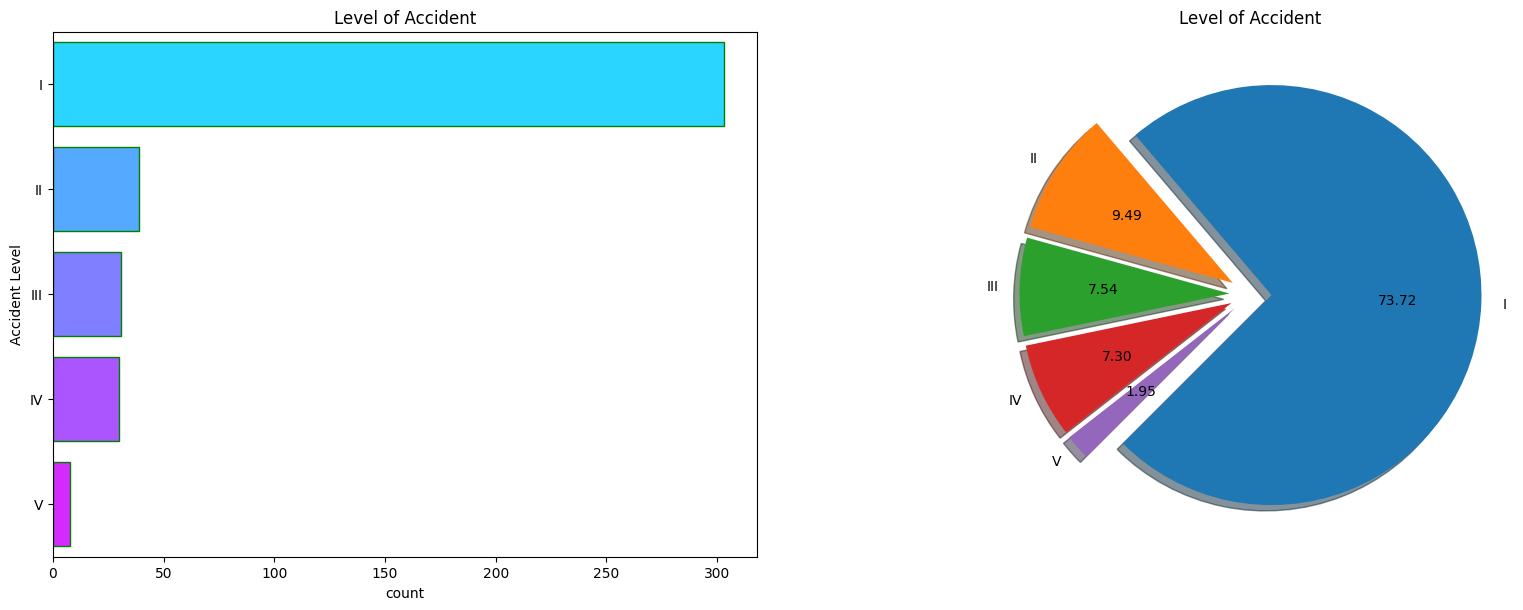

In [ ]:
plot('Accident Level', 'Level of Accident', 'cool', 'green')

* Level I  signifies not severe and V  signifies very severe.
* Accidents with the level I are most common. These are due to small misses, like people forgot their PPE, or they dropped a tool, etc.

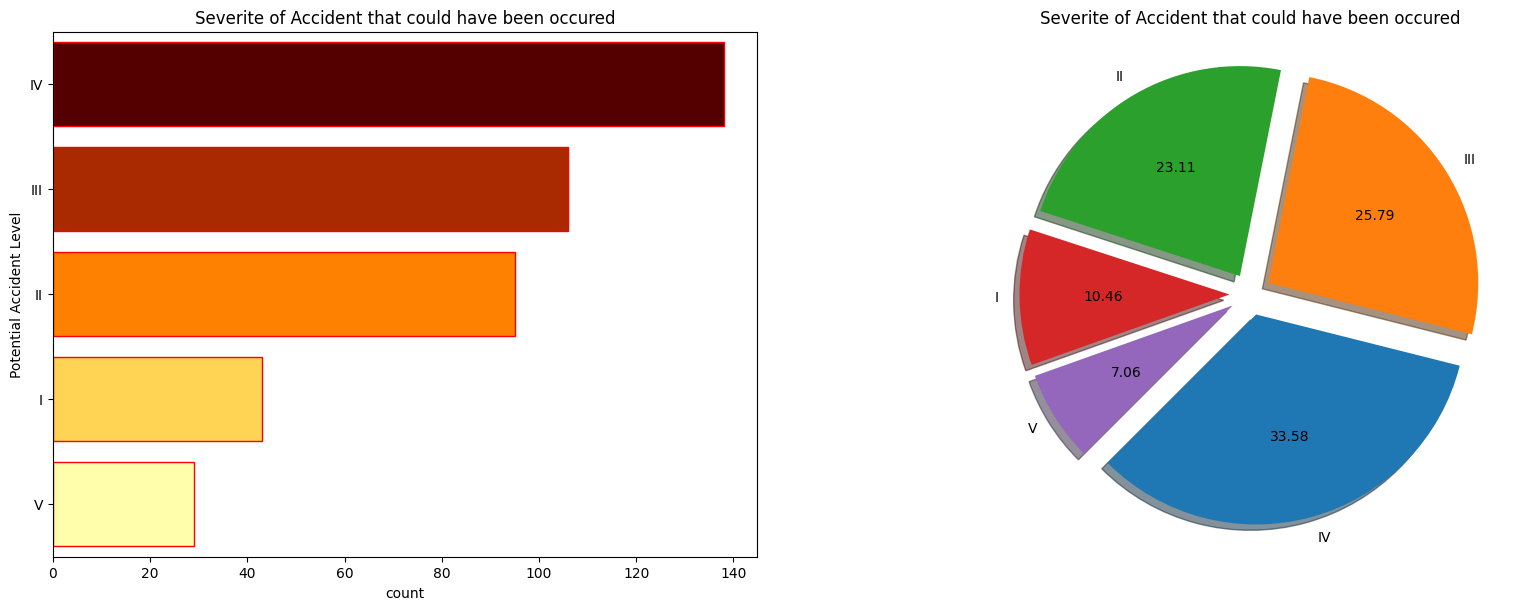

In [ ]:
plot('Potential Accident Level', 'Severite of Accident that could have been occured', 'afmhot', 'red')

Potential accident level indicates how severe the accident would been due to other factors involved in the accidents.
Potential accident level IV has the highest count and signifies the moderate severity of accidents.
We have to check the correlation of this Potential Accident level and Accident level along with the industry sector.

**Bivariate Analysis**

In [ ]:
#### Potential Accident level counts by Country

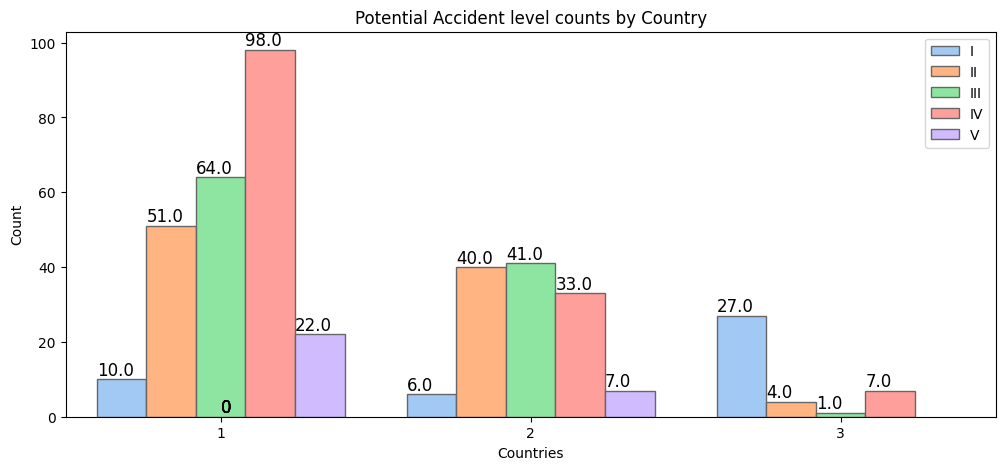

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Countries', hue='Potential Accident Level', data=df,
                   hue_order=df['Potential Accident Level'].value_counts().sort_index().index,
                   palette='pastel', edgecolor='.4', saturation=1)

total = sum(df['Countries'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Country');
plt.ylabel('Count');
plt.legend(loc='upper right')



*   Country_01 has more number of severe accidents especially Level IV
* Country_02 has moderate accidents across all the levels
* Country_03 'level I' accidents counts is more compared to country_01 and
  country_02 but less severe accidents.



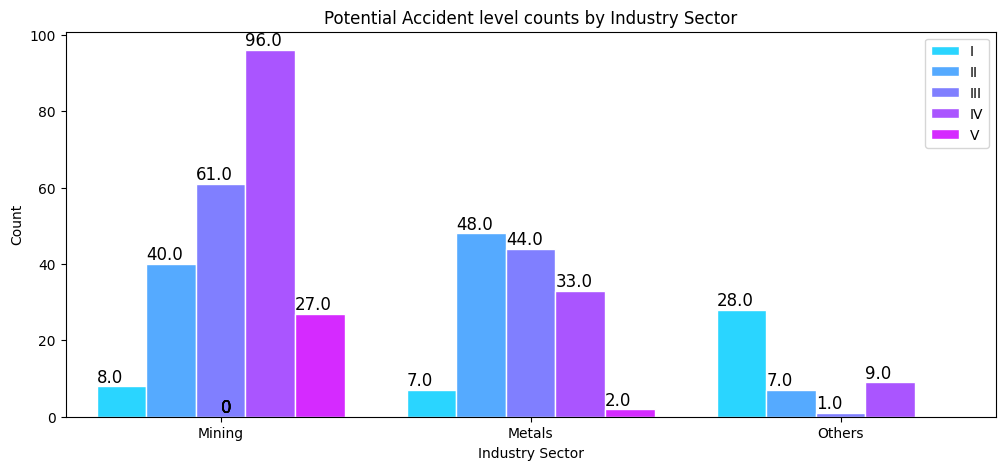

In [ ]:
#Potential Accident level counts by Industry Sector

plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'Industry Sector', hue='Potential Accident Level', data=df,hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='cool', edgecolor='1.0', saturation=1)
total = sum(df['Industry Sector'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')
plt.title('Potential Accident level counts by Industry Sector');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Out of all industries, Mining Industry has seen some accidents whose level is
the most severe and the corresponding potential Accident level is also highest.
* This is followed by Metal industry and other.
* Severity levels of the incidents are more in Mining sector (rate of level 4 is slightly higher than the level 2 & 3)

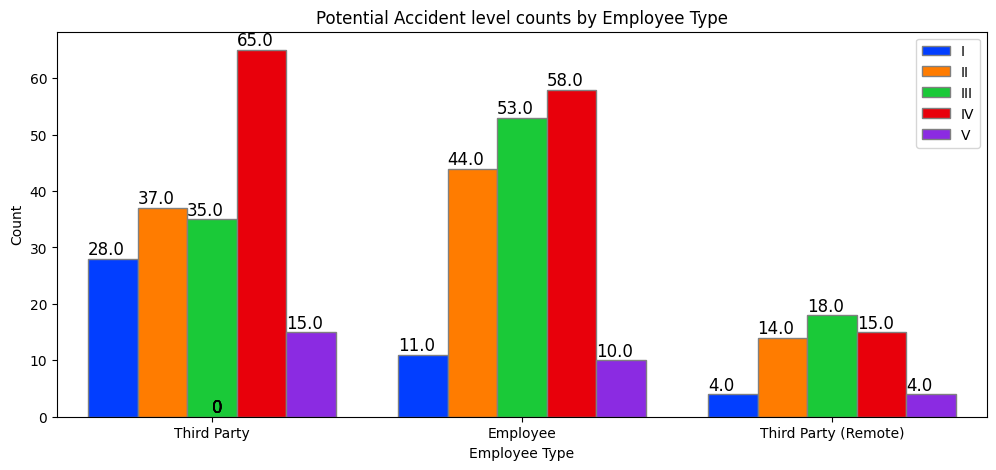

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x= 'Employee Type', hue=df['Potential Accident Level'],data=df, hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='bright', edgecolor='.5', saturation=1);

total = sum(df['Employee Type'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Employee Type');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Third Party Employees are more involved in Accidents
* We can observe that apart from Accident_Level_1 the people are also facing severe accidents (Accident_Level_IV) in the industry.

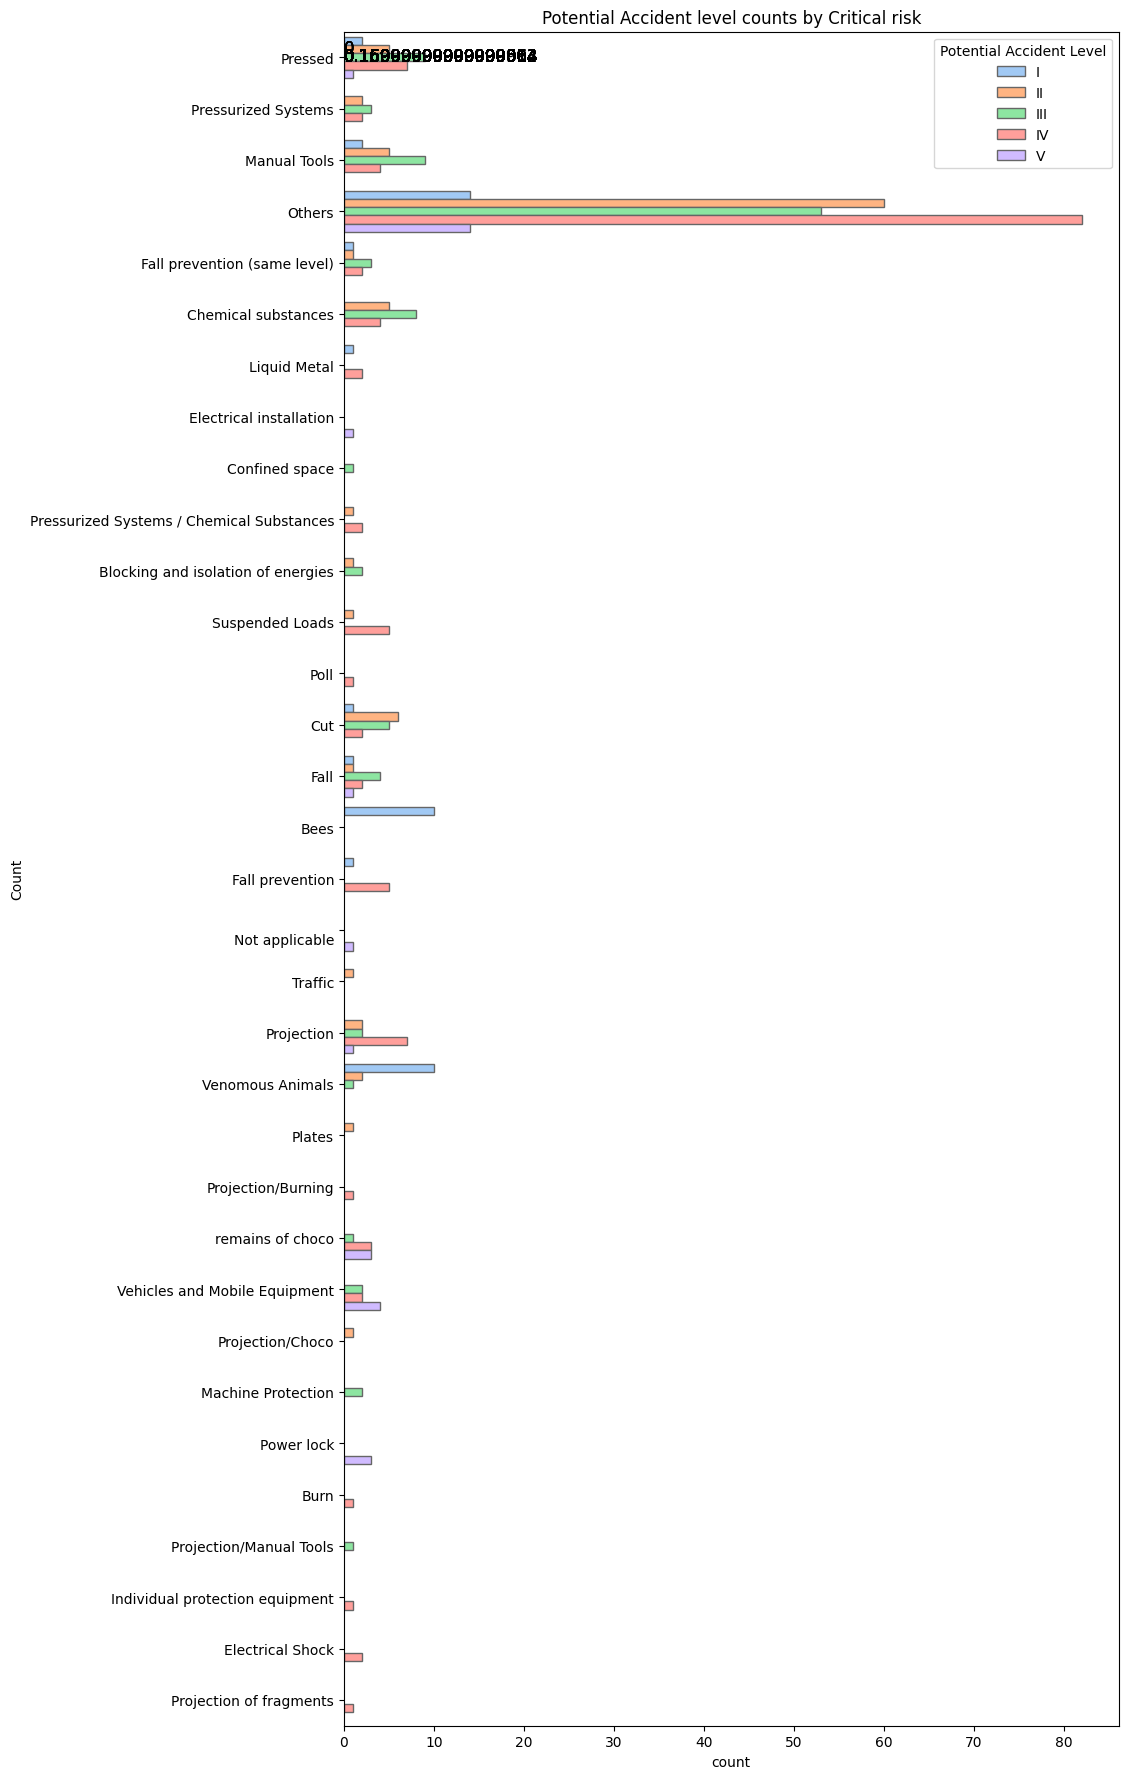

In [ ]:
plt.figure(figsize=(10,22))
ax = sns.countplot(y = 'Critical Risk', hue=df['Potential Accident Level'],data =df, hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

total = sum(df['Critical Risk'].value_counts())
for p in ax.patches:
     ax.annotate('{}'.format(p.get_height()),
                 (p.get_x(), p.get_height()),
                  size=12,
                  xytext = (0, 3),
                  textcoords = 'offset points')

plt.title('Potential Accident level counts by Critical risk');
plt.ylabel('Count');

In [ ]:
df1 = df.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count()

# 1.unstack() Function in dataframe unstacks the row to columns.
# 2.applying the row total and taking the ratio of male and female employees.
# 3.resetting the index

df1 = df1.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index()
df1 = pd.melt(df1, ['Gender']).fillna(0) # melt() function unpivots a DataFrame from wide format to long format
df1

Gender Potential Accident Level  value
0  Female                        I    0.0
1    Male                        I   11.0
2  Female                       II   67.0
3    Male                       II   21.0
4  Female                      III   14.0
5    Male                      III   26.0
6  Female                       IV   19.0
7    Male                       IV   34.0
8  Female                        V    0.0
9    Male                        V    7.0

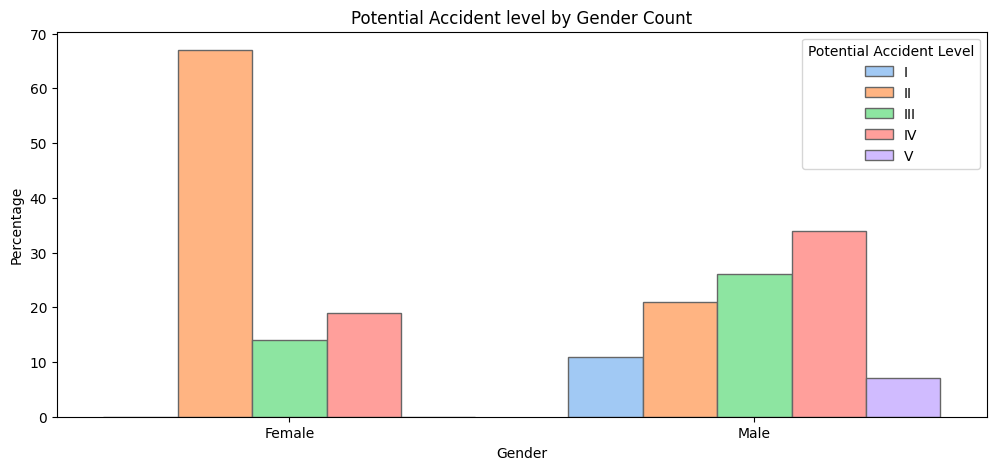

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'Gender', y ='value',data = df1, hue=df1['Potential Accident Level'], palette='pastel', edgecolor='.4', saturation=1);
plt.title('Potential Accident level by Gender Count');
plt.ylabel('Percentage');

In [ ]:
df.columns

Index(['Date', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk',
       'Description', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

Males are more involved in Severe Accidents whereas Females are suffering with less Servere ones (Level II specifically)

<Figure size 1200x500 with 0 Axes>

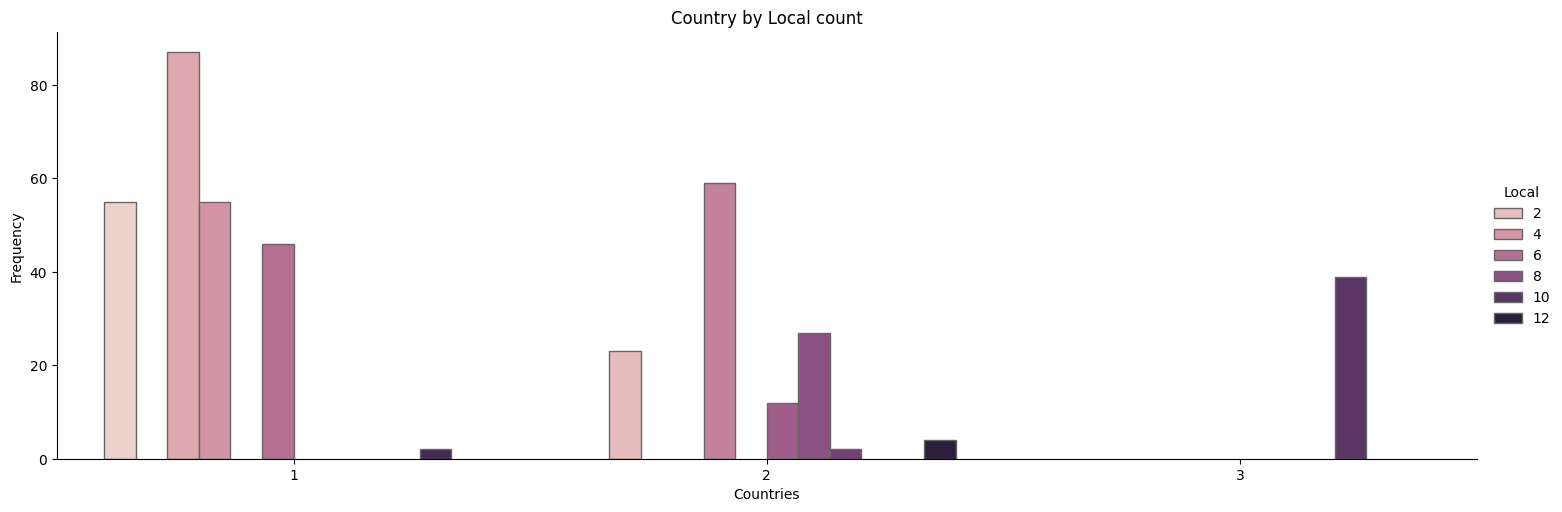

In [ ]:
#Accidents Count by Country and Local
# Country by Local count
plt.figure(figsize=(12,5))
sns.catplot(data=df, kind='count', x='Countries', hue='Local', aspect=3, edgecolor='.4', saturation=1);
plt.title('Country by Local count');
plt.ylabel('Frequency');

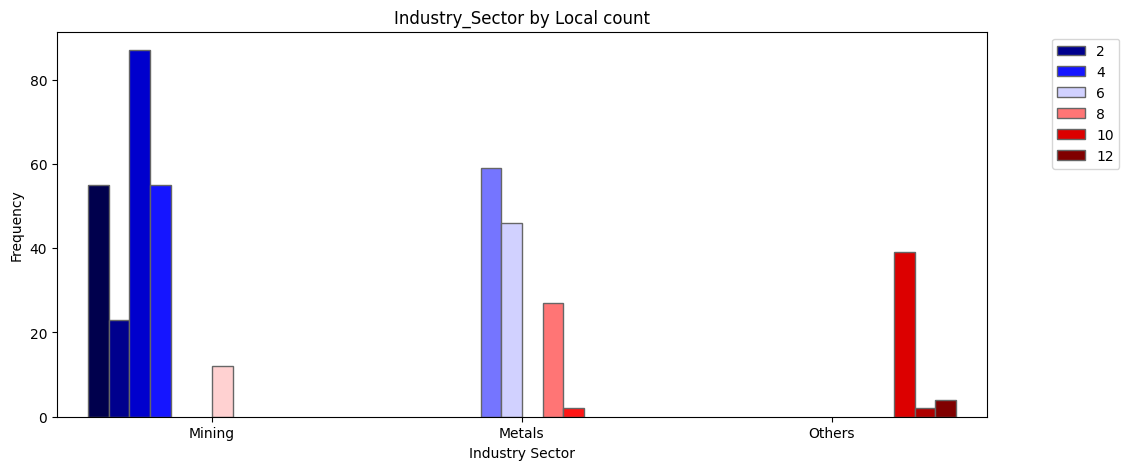

In [ ]:
#Accidents Count by Industry_Sector and Local
plt.figure(figsize=(12,5))
sns.countplot(x='Industry Sector',data = df, hue='Local', edgecolor='.4', saturation=1, palette='seismic');
plt.title('Industry_Sector by Local count');
plt.ylabel('Frequency')
plt.legend(loc='best', bbox_to_anchor=(1.15, 1))

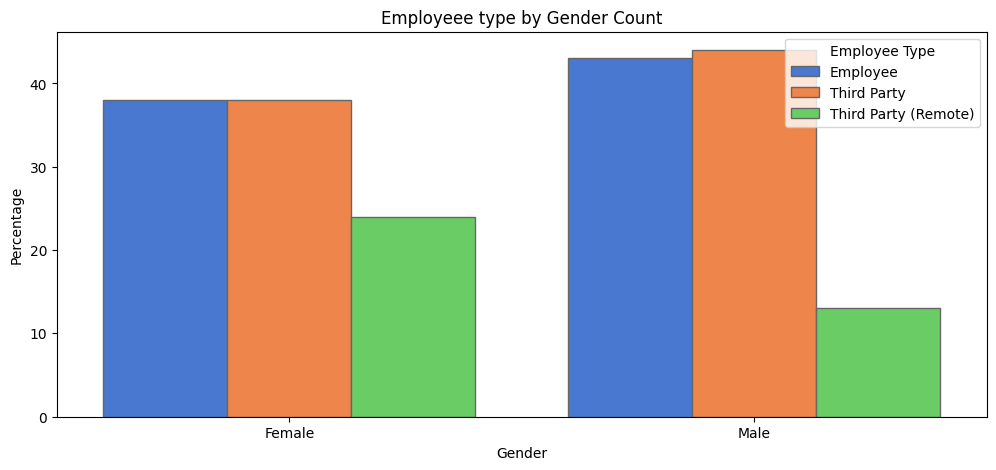

In [ ]:
# Filtering the dataframe by Gender and Employee type and taking the count.
df1 = df.groupby(['Gender','Employee Type'])['Employee Type'].count()

# 1.unstack() Function in dataframe unstacks the row to columns.
# 2.applying the row total and taking the ratio of male and female employees.
# 3.resetting the index

df1 = df1.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index()
df1 = pd.melt(df1, ['Gender']) # melt() function unpivots a DataFrame from wide format to long format
df1
plt.figure(figsize=(12,5))
sns.barplot(x ='Gender', y = 'value',data = df1, hue='Employee Type', palette='muted', edgecolor='.4', saturation=1);
plt.title('Employeee type by Gender Count');
plt.ylabel('Percentage');

In [ ]:
df.columns


* Division of employee_type in men and women is almost same
* As seen in the above plots third party empoloyees are slightly higher than the employee count in both of the sectors(men&women)
* Proportion of female third party remote employee is moderately higher than that of the males

In [ ]:
# Filtering the dataframe by Gender and Industry sector and taking the count.
df1 = pd.melt(df.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index(),['Gender'])
df1

Gender Industry Sector  value
0  Female          Metals   62.0
1    Male          Metals   31.0
2  Female          Mining   19.0
3    Male          Mining   58.0
4  Female          Others   19.0
5    Male          Others   11.0

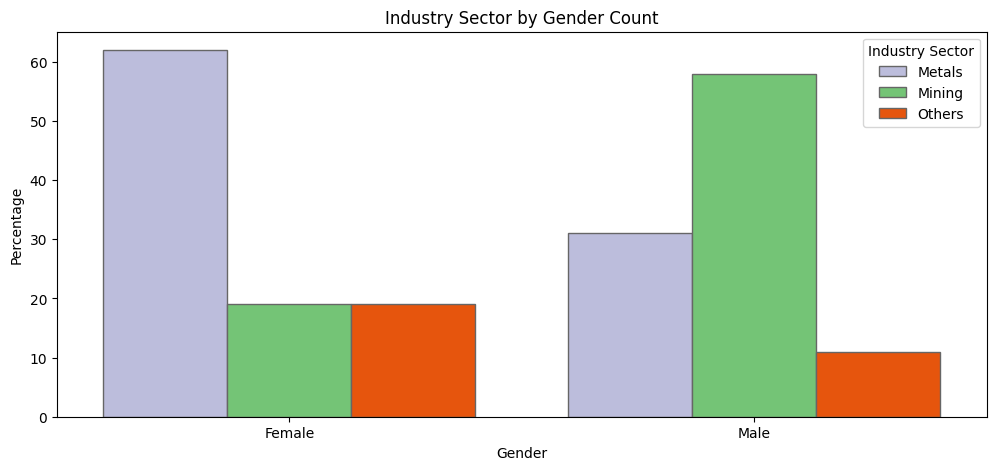

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x ='Gender', y='value',data =df1, hue='Industry Sector', palette='tab20c_r', edgecolor='.4', saturation=1);
plt.title('Industry Sector by Gender Count');
plt.ylabel('Percentage');

There is a major diferrence in mining and metals industries within males and females
We can observe the distinct safety levels by the industry sectors towards male and female

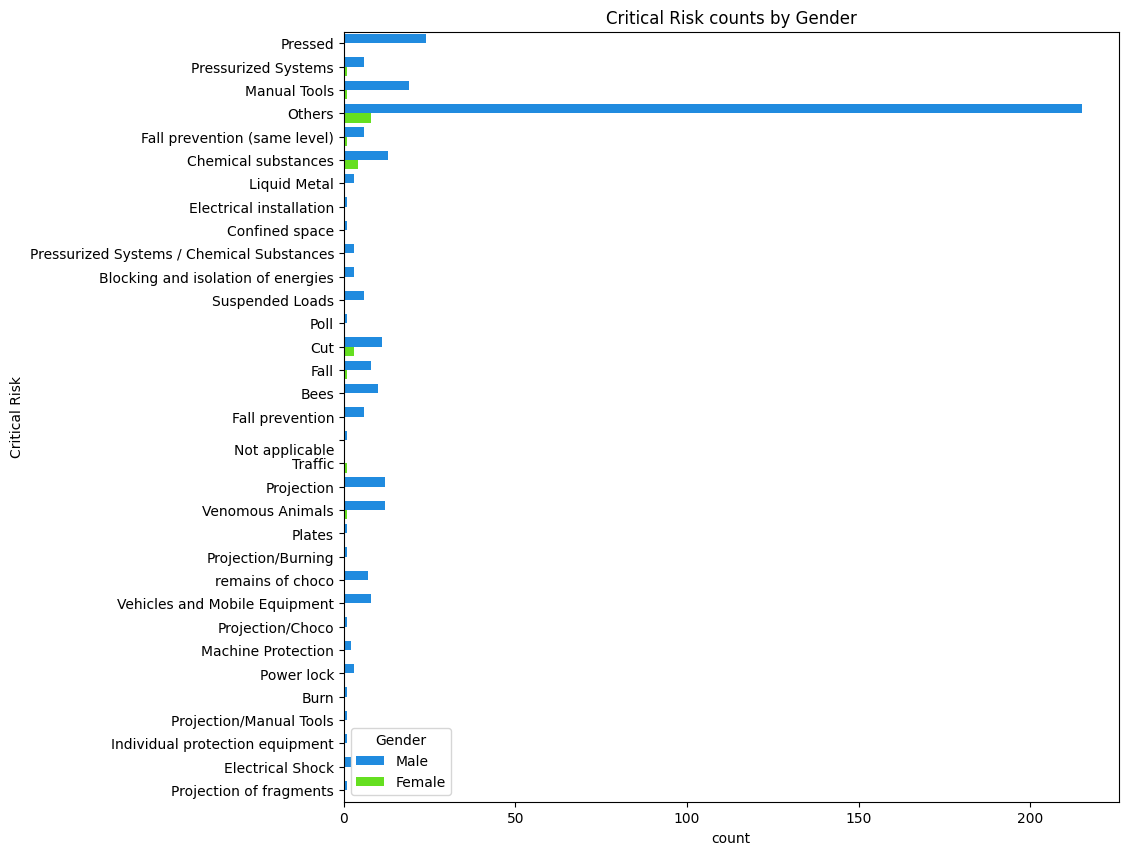

In [ ]:
#critical risk count by gender
plt.figure(figsize=(10,10))
sns.countplot(y = df['Critical Risk'], hue=df['Gender'], palette='gist_rainbow_r')
plt.title('Critical Risk counts by Gender');

In [ ]:
df.head(10)

Date  Countries  Local Industry Sector Accident Level  \
0 2016-01-01          1      1          Mining              I   
1 2016-01-02          2      2          Mining              I   
2 2016-01-06          1      3          Mining              I   
3 2016-01-08          1      4          Mining              I   
4 2016-01-10          1      4          Mining             IV   
5 2016-01-12          2      5          Metals              I   
6 2016-01-16          2      5          Metals              I   
7 2016-01-17          1      4          Mining              I   
8 2016-01-19          2      2          Mining              I   
9 2016-01-26          1      6          Metals              I   

  Potential Accident Level Gender         Employee Type  \
0                       IV   Male           Third Party   
1                       IV   Male              Employee   
2                      III   Male  Third Party (Remote)   
3                        I   Male           Third Party   
4                       IV   Male           Third Party   
5                      III   Male  Third Party (Remote)   
6                      III   Male              Employee   
7                      III   Male           Third Party   
8                       IV   Male  Third Party (Remote)   
9                       II   Male           Third Party   

                  Critical Risk  \
0                       Pressed   
1           Pressurized Systems   
2                  Manual Tools   
3                        Others   
4                        Others   
5           Pressurized Systems   
6  Fall prevention (same level)   
7                       Pressed   
8                        Others   
9           Chemical substances   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   
5  During the unloading operation of the ustulado...  2016      1   12   
6  The collaborator reports that he was on street...  2016      1   16   
7  At approximately 04:50 p.m., when the mechanic...  2016      1   17   
8  Employee was sitting in the resting area at le...  2016      1   19   
9  At the moment the forklift operator went to ma...  2016      1   26   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday  
3     Friday  
4     Sunday  
5    Tuesday  
6   Saturday  
7     Sunday  
8    Tuesday  
9    Tuesday

**Correlation plot**

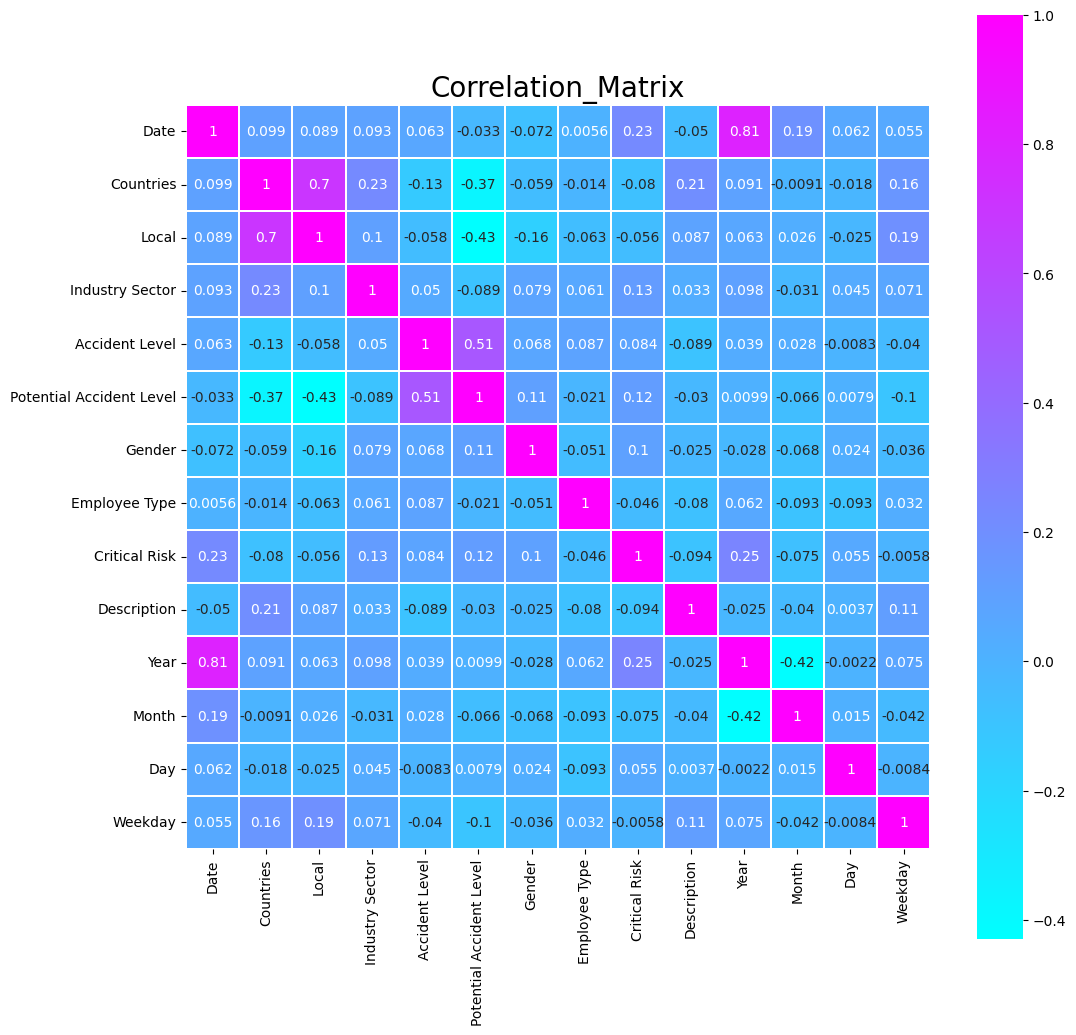

In [ ]:
le = LabelEncoder()
df_enc = df.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_enc.corr(), square=True, cmap='cool', annot=True, linewidth=0.2);

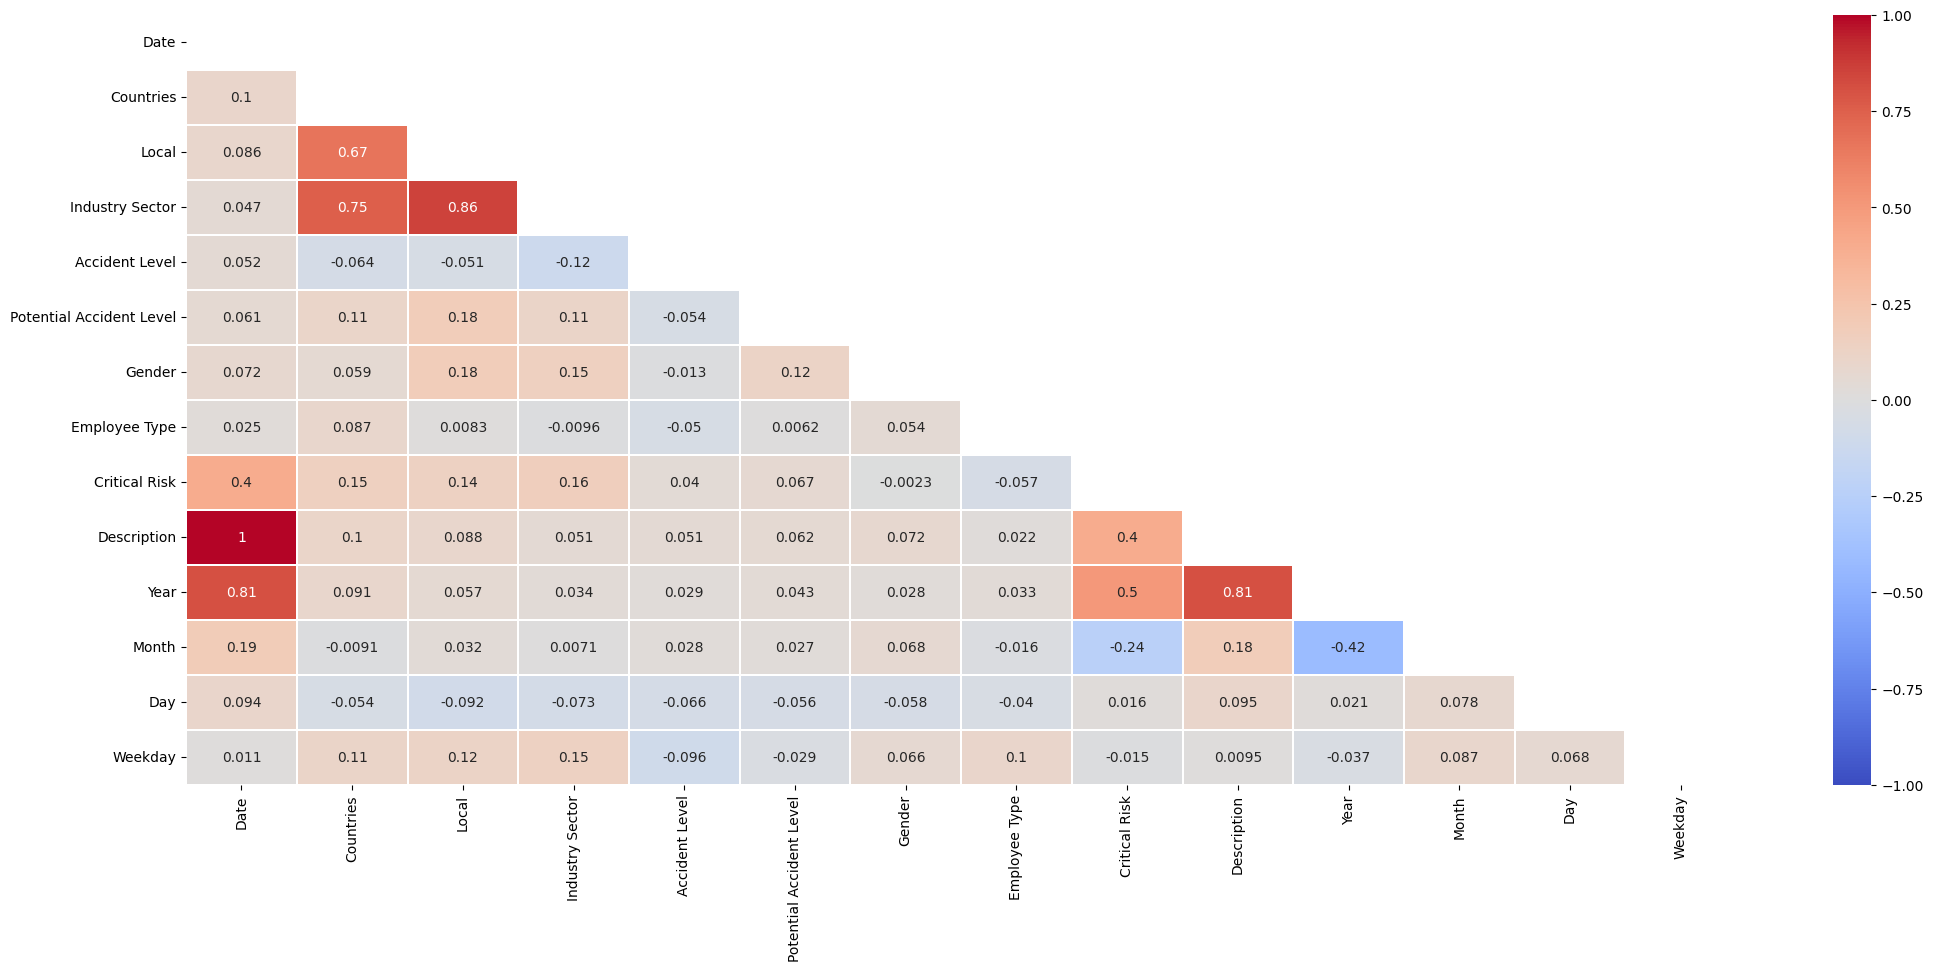

In [ ]:
plt.figure(5, figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

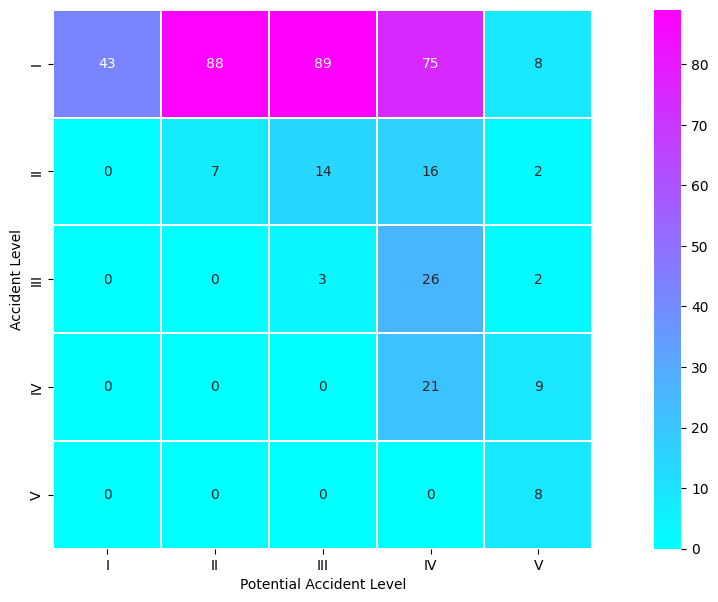

In [ ]:
# Count of Accidents grouped by Accident Level and Potential accident level
plt.figure(figsize = (16,7))
sns.heatmap(pd.crosstab(df['Accident Level'], df['Potential Accident Level']), square=True, cmap='cool', annot=True, linewidth=0.1);

In [ ]:
df.columns

Index(['Date', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk',
       'Description', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

There is a moderate correlation across dataset.
Accident levels 1 is slightly highly correlated to potential acccident levels 2 and 3

In [ ]:
# Count of Critical Risks grouped by Industry sectors
df.pivot_table(index='Critical Risk', columns='Industry Sector', aggfunc='count').fillna(0)['Accident Level'].T

Critical Risk    \nNot applicable  Bees  Blocking and isolation of energies  \
Industry Sector                                                               
Metals                        1.0   0.0                                 3.0   
Mining                        0.0   0.0                                 0.0   
Others                        0.0  10.0                                 0.0   

Critical Risk    Burn  Chemical substances  Confined space   Cut  \
Industry Sector                                                    
Metals            1.0                 15.0             1.0  10.0   
Mining            0.0                  2.0             0.0   4.0   
Others            0.0                  0.0             0.0   0.0   

Critical Risk    Electrical Shock  Electrical installation  Fall  ...  \
Industry Sector                                                   ...   
Metals                        0.0                      0.0   2.0  ...   
Mining                        2.0                      1.0   5.0  ...   
Others                        0.0                      0.0   2.0  ...   

Critical Risk    Projection  Projection of fragments  Projection/Burning  \
Industry Sector                                                            
Metals                  4.0                      0.0                 1.0   
Mining                  8.0                      1.0                 0.0   
Others                  0.0                      0.0                 0.0   

Critical Risk    Projection/Choco  Projection/Manual Tools  Suspended Loads  \
Industry Sector                                                               
Metals                        0.0                      0.0              5.0   
Mining                        0.0                      1.0              1.0   
Others                        1.0                      0.0              0.0   

Critical Risk    Traffic  Vehicles and Mobile Equipment  Venomous Animals  \
Industry Sector                                                             
Metals               0.0                            0.0               2.0   
Mining               0.0                            8.0               1.0   
Others               1.0                            0.0              10.0   

Critical Risk    remains of choco  
Industry Sector                    
Metals                        0.0  
Mining                        7.0  
Others                        0.0  

[3 rows x 33 columns]

**Multivariate Analysis**


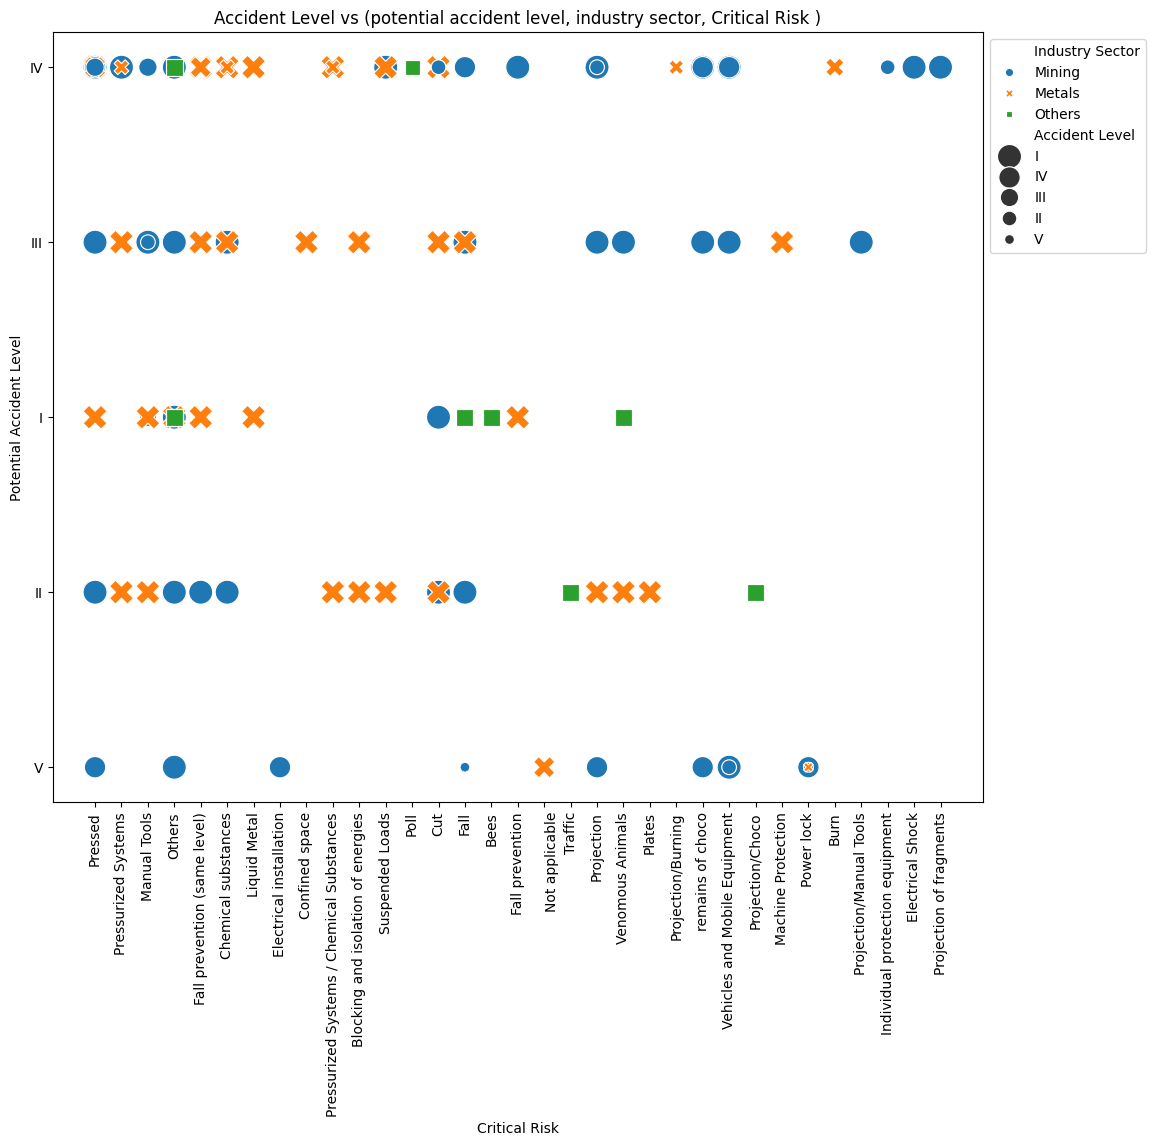

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(y="Potential Accident Level", x="Critical Risk", hue="Industry Sector",style='Industry Sector',
                size = 'Accident Level',  data=df, ax=ax, sizes=(50, 300), palette = 'tab10')
ax.set_title("Accident Level vs (potential accident level, industry sector, Critical Risk )")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation = 'vertical');
plt.show()

* Out of all industries, Mining Industry has had most severe accidents and their corresponding potential Accident level is also high.
* Most of the accidents have been reported from mining industry and almost all of them are of moderate level, followed by Metal industry and Others.
* The Potential accident level and Accident level are equivalent to each other.
Some of the critical risks are less severe and have reported maximum number of accidents.

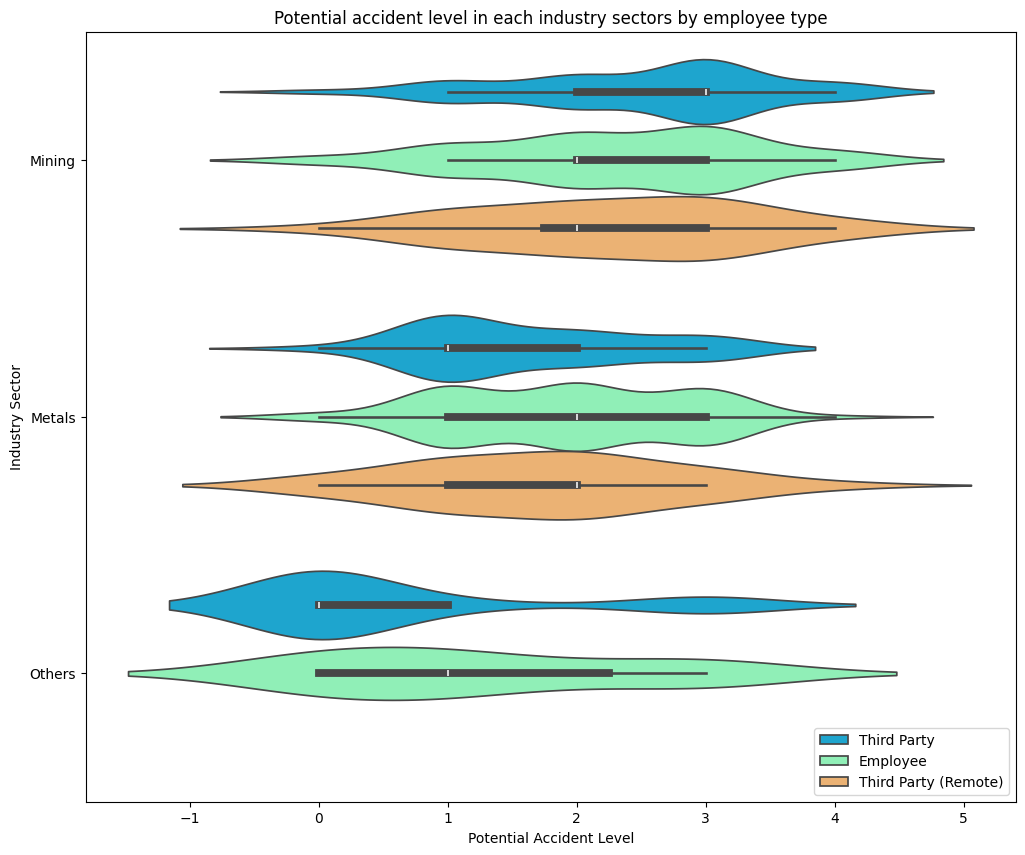

In [ ]:
df1 = df.copy()
df1['Potential Accident Level'] = LabelEncoder().fit_transform(df1['Potential Accident Level']).astype(np.int8) # Just converting one of the column to numerical data type

plt.figure(figsize=(12,10))
sns.violinplot(x=df1["Potential Accident Level"], y=df1["Industry Sector"], hue = df1['Employee Type'] ,palette='rainbow');
plt.title("Potential accident level in each industry sectors by employee type")
plt.legend(loc='lower right')

For metals industry, the distribution of potential accident level for third party employee is right skewed, that means most of the accidents have moderate risk.

For Direct employee, there is an equal distribution between low and moderate risk. Same for Third party remote employees, but it is long tailed.

For other industries, most of the third party employees are affected by very low risk which is a good sign.

Similarly, for Direct employees the potential accident level is distributed well and the mode of the distribution is located at a low risk level (with a very extended inter quartile range).



Text(0.5, 1.0, 'Number of Accidents/Day (all countries)')

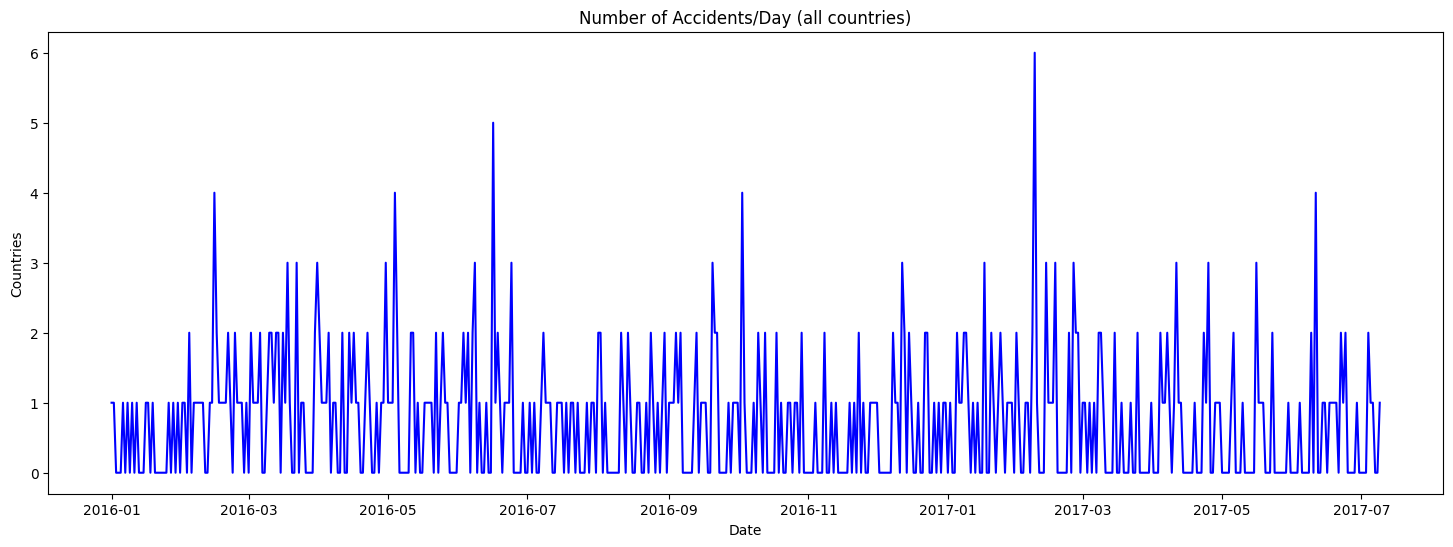

In [ ]:
# Basic trend plot accumulating accidents of all the countries day wise
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df1= df.Countries.resample('24H').count()

plt.figure(figsize=(18,6))
sns.lineplot(x = df1.index, y = df1, color='blue')
plt.title('Number of Accidents/Day (all countries)')

It can be observed that more number of accidents occured in 2016 compared to 2017, in year 2016 we have all 12 months of data whereas year 2017 has only 7 months of data.
It seems that the number of accidents decreased in latter of the year / month.
The number of accidents increased during the middle of the week and declined since the middle of the week.


Text(0.5, 0, 'Month')

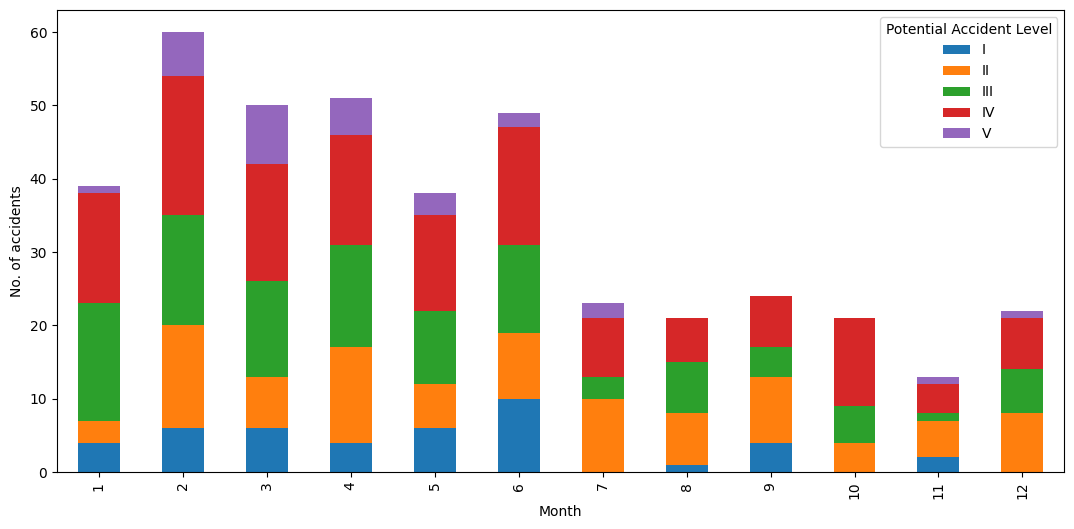

In [ ]:
#Potential Accident level counts by Month
ct = pd.crosstab(columns=df["Potential Accident Level"],index=df["Month"])
ax = ct.plot(kind="bar",stacked=True,figsize=(13,6))
ax.set_ylabel('No. of accidents')
ax.set_xlabel('Month')

Accident level have the tendency that non-severe levels(I,II) decreased throughout the year but severe(III, IV) levels did not change much.
Initial months see more accidents which seem to decrease by year end
High level accidents(V) occur in the initial months

In [ ]:
output_file_path = '/content/drive/My Drive/industrial_accidents.xlsx'
df.to_excel(output_file_path, index=False)

In [ ]:
from google.colab import files

files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**NLP PREPROCESSING**


In [ ]:
# Removing the columns which are not required for modelling
df = df.reset_index()
df.drop(columns=['Date', 'Day', 'Weekday', 'Year', 'Month'], inplace= True)

In [ ]:
df


Countries  Local Industry Sector Accident Level Potential Accident Level  \
0            1      1          Mining              I                       IV   
1            2      2          Mining              I                       IV   
2            1      3          Mining              I                      III   
3            1      4          Mining              I                        I   
4            1      4          Mining             IV                       IV   
..         ...    ...             ...            ...                      ...   
406          1      4          Mining              I                      III   
407          1      3          Mining              I                       II   
408          2      9          Metals              I                       II   
409          2      5          Metals              I                       II   
410          1      4          Mining              I                       II   

     Gender         Employee Type                 Critical Risk  \
0      Male           Third Party                       Pressed   
1      Male              Employee           Pressurized Systems   
2      Male  Third Party (Remote)                  Manual Tools   
3      Male           Third Party                        Others   
4      Male           Third Party                        Others   
..      ...                   ...                           ...   
406    Male           Third Party                        Others   
407  Female              Employee                        Others   
408    Male              Employee              Venomous Animals   
409    Male              Employee                           Cut   
410  Female           Third Party  Fall prevention (same level)   

                                           Description  
0    While removing the drill rod of the Jumbo 08 f...  
1    During the activation of a sodium sulphide pum...  
2    In the sub-station MILPO located at level +170...  
3    Being 9:45 am. approximately in the Nv. 1880 C...  
4    Approximately at 11:45 a.m. in circumstances t...  
..                                                 ...  
406  Being approximately 5:00 a.m. approximately, w...  
407  The collaborator moved from the infrastructure...  
408  During the environmental monitoring activity i...  
409  The Employee performed the activity of strippi...  
410  At 10:00 a.m., when the assistant cleaned the ...  

[411 rows x 9 columns]

Description about accidents is important to understand the cause of accidents, so we need to discover characteristical words or phrases indicating situation.

In [ ]:
df['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
# Defining a function for NLP preprocessing
def des_cleaning(text):

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    # #remove non-alphabetical characters like '(', '.' or '!'
    # alphas = [i for i in lems if (i.isalpha() or i.isnumeric()) and (i not in stopwords)]

    words = [w for w in lems if len(w)>2]

    return words

In [ ]:
# Apply all the preprocessing techniques we have defined on Description columns
tokens = des_cleaning(' '.join(df['Description'].sum().split()))
words_for_embedding = des_cleaning(''.join(str(df['Description'].tolist())))
# Verifying by printing first 20 words
print('Length of all the words:', len(tokens),'\n')
print('Length of words:',len(words_for_embedding))
print('Length of unique tokens in the dataset:', len(np.unique(tokens)),'\n')
np.array(tokens[0:20])

Length of all the words: 13192 

Length of words: 13611
Length of unique tokens in the dataset: 3799 



array(['removing', 'drill', 'rod', 'jumbo', 'maintenance,', 'supervisor',
       'proceeds', 'loosen', 'support', 'intermediate', 'centralizer',
       'facilitate', 'removal,', 'seeing', 'mechanic', 'support', 'one',
       'end', 'drill', 'equipment'], dtype='<U12')

In [ ]:
df['NewDescription'] = df.apply(lambda x: " ".join(des_cleaning(x.Description)), axis=1)
df['NewDescription'][0]

'removing drill rod jumbo maintenance, supervisor proceeds loosen support intermediate centralizer facilitate removal, seeing mechanic support one end drill equipment pull hand bar accelerate removal this, moment bar slide point support tightens finger mechanic drilling bar beam jumbo.'

# N-grams

In [ ]:
# Function to calculate ngrams
def extract_ngrams(data, num):
  # Taking ngrams on Description column text and taking the value counts of each of the tokens
  words_with_count  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(30) # taking top 30 most common words
  # Creating the dataframe the words and thier counts
  words_with_count = pd.DataFrame(words_with_count, columns=['Words', 'Count'])
  # Removing the brackets and commans
  words_with_count.Words = [' '.join(i) for i in words_with_count.Words]
  # words_with_count.index = [' '.join(i) for i in words_with_count.Words]
  words_with_count.set_index('Words', inplace=True) # setting the Words as index
  # Returns the dataframe which contains unique tokens ordered by their counts
  return words_with_count

In [ ]:
# Uni-Grams
uni_grams = extract_ngrams(tokens, 1)

# Printing top words with their counts
uni_grams[0:10]

Count
Words          
causing     164
left        151
right       151
hand        123
employee    122
operator    121
time        108
moment       87
activity     75
finger       70

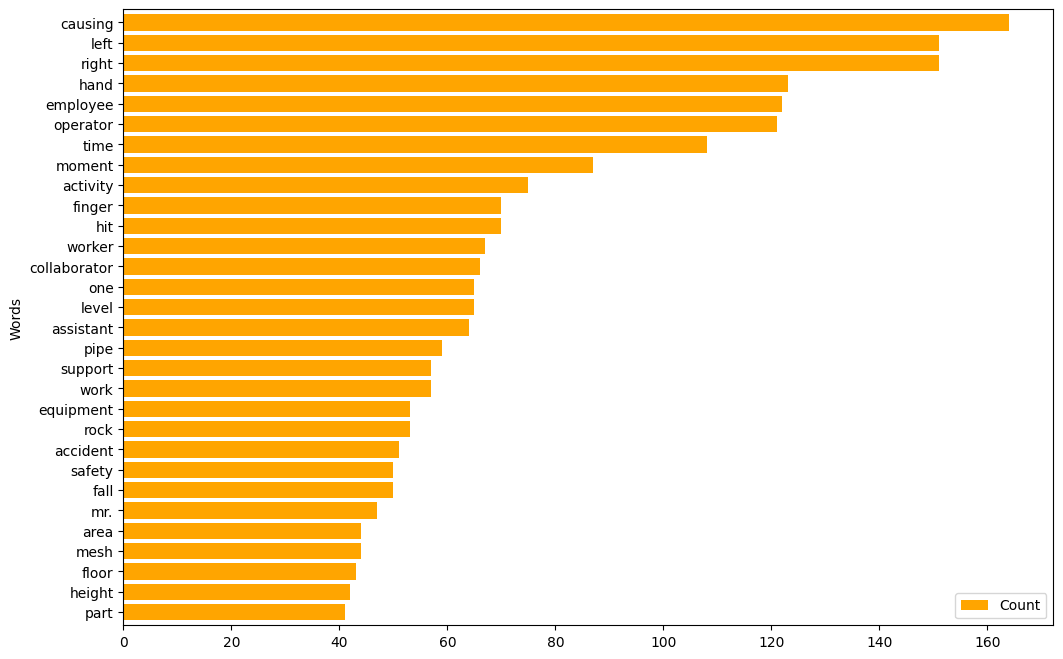

In [ ]:
# Visualising the ngrams
uni_grams.sort_values(by='Count').plot.barh(color = 'orange', width = 0.8, figsize = (12,8));

Causing is the most frequent word.
There are several nouns like pipe, collaborator, time etc.
Most accidents involved the hands of the persons involved.
Moreover there are other words which depict some sort of action (verbs). For example hit, remove, fall move...etc

In [ ]:
# Bi-Grams
bi_grams = extract_ngrams(tokens, 2)

# Printing the words with their counts
bi_grams[0:10]

Count
Words                
left hand          45
right hand         40
time accident      37
finger left        25
causing injury     23
fragment rock      15
time accident,     15
medical center     15
finger right       14
injury. time       14

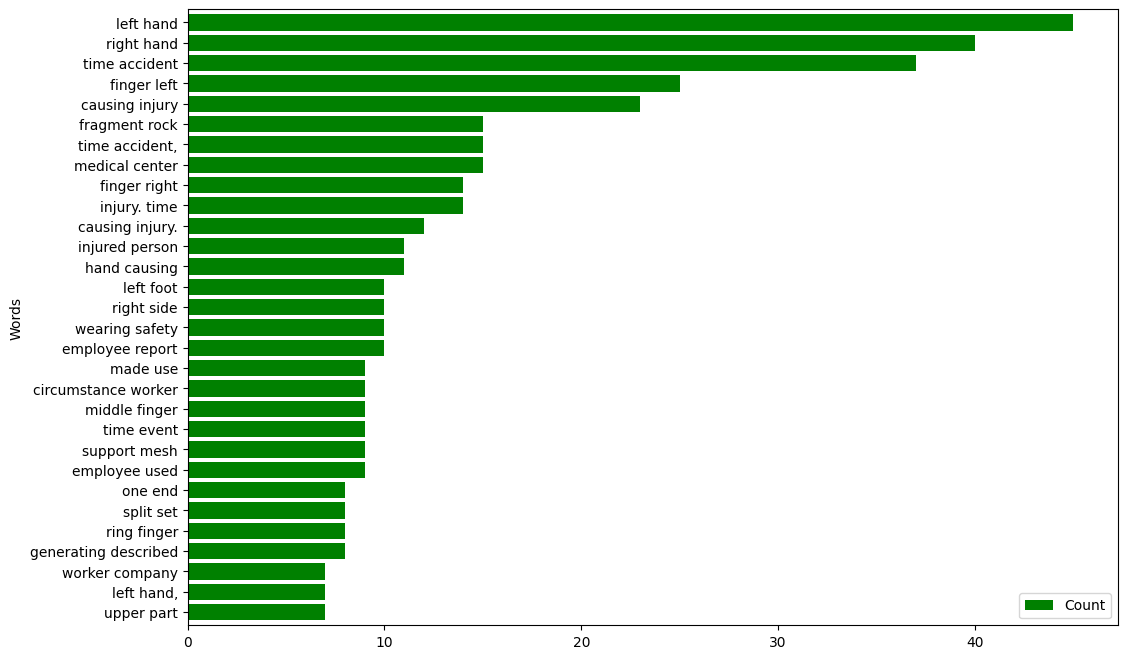

In [ ]:
bi_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8));

There are many phrases which is related to hands. For example hand causing, left hand, right hand, finger left, finger right, middle finger and ring finger.
There are also some phrases which is related to other body parts. For example left foot and right side.

In [ ]:
# tri-Grams
tri_grams = extract_ngrams(tokens, 3)

# Printing the words with their counts
tri_grams[0:10]

Count
Words                        
finger left hand           12
injury. time accident      10
finger right hand           9
time accident employee      6
worker wearing safety       5
time accident worker        5
causing injury. time        5
hit back right              4
wearing safety glove        4
finger left hand,           4

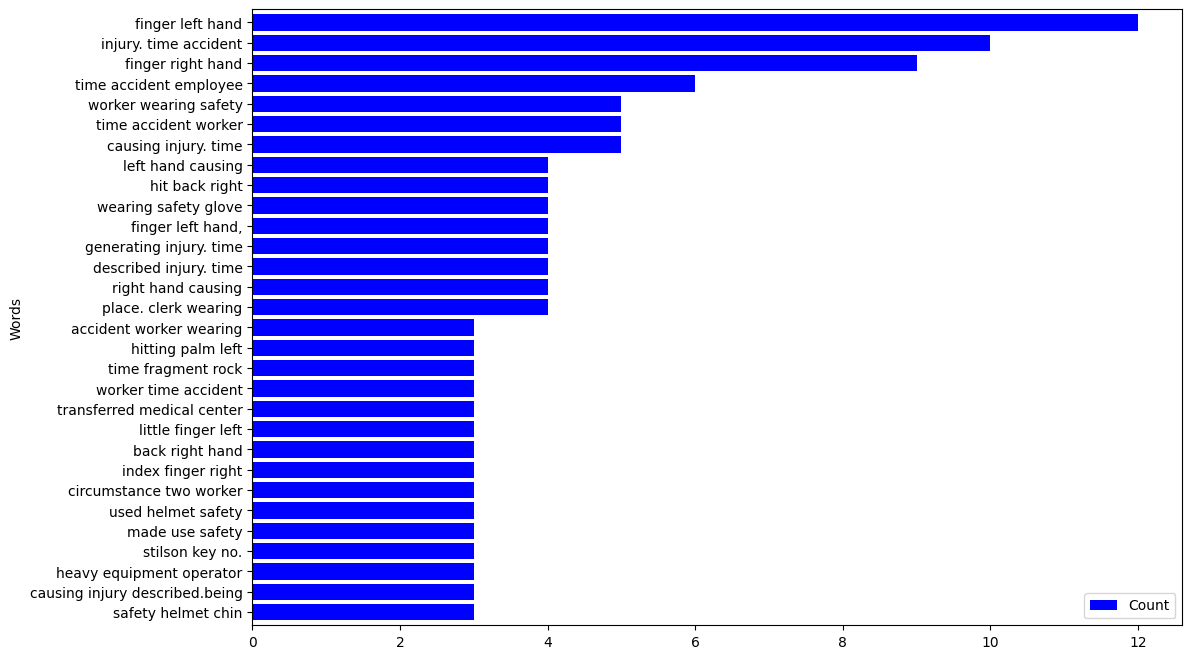

In [ ]:
tri_grams.sort_values(by='Count').plot.barh(color = 'blue', width = 0.8, figsize = (12,8));

* Like Unigram and Bigram, there are also many phrases which is related to hands or other body parts, but increasing the grams makes sense
* For example left/right hand finger, left hand causing, hit back right and wearing safety glove.. etc.

In [ ]:
#Ngram with Industry column

# Dividing the tokens with respect to Industry Sector from the description text
# Concatenate descriptions for 'Metals' sector
descriptions_metals = ' '.join(df[df['Industry Sector'] == 'Metals']['Description'].tolist())
tokens_metals = des_cleaning(descriptions_metals)

# Concatenate descriptions for 'Mining' sector
descriptions_mining = ' '.join(df[df['Industry Sector'] == 'Mining']['Description'].tolist())
tokens_mining = des_cleaning(descriptions_mining)

print("Tokens for Metals sector:", tokens_metals)
print("Tokens for Mining sector:", tokens_mining)


Tokens for Metals sector: ['unloading', 'operation', 'ustulado', 'bag', 'need', 'unclog', 'discharge', 'mouth', 'silo', 'truck.', 'performing', 'procedure,', 'maneuver', 'unhooking', 'hose', 'without', 'total', 'depressurisation', 'mouth,', 'projecting', 'ustulado', 'powder', 'collaborator', 'caused', 'irritation', 'eyes.', 'collaborator', 'report', 'street', 'holding', 'left', 'hand', 'volumetric', 'balloon,', 'slipped', 'placing', 'hand', 'ground', 'volumetric', 'balloon', 'ended', 'breaking', 'caused', 'small', 'wound', 'left', 'hand.', 'moment', 'forklift', 'operator', 'went', 'manipulate', 'big', 'bag', 'bioxide', 'section', 'front', 'ladder', 'lead', 'area', 'manual', 'displacement,', 'splashed', 'spent', 'height', 'forehead', 'fissure', 'pipe', 'subsequently', 'spilling', 'left', 'eye.', 'collaborator', 'went', 'nearby', 'eyewash', 'cleaning', 'immediately', 'medical', 'center.', 'collaborator', 'report', 'working', 'ustulacion', 'realized', 'cyclone', 'duct', 'obstructed', 'ope

In [ ]:
# Extracting unigrams on metals category
unigrams_metals = extract_ngrams(tokens_metals, 1).reset_index()

# Extracting unigrams on mining category
unigrams_mining = extract_ngrams(tokens_mining, 1).reset_index()

unigrams_metals.join(unigrams_mining, lsuffix='_Metals', rsuffix='_Mining')

Words_Metals  Count_Metals  Words_Mining  Count_Mining
0       employee            68       causing           103
1           left            46         right           100
2        causing            43      operator            96
3          right            37          time            96
4           hand            27          left            92
5            hit            27          hand            89
6       operator            25        moment            62
7       activity            25         level            60
8        medical            24     assistant            59
9         report            23       injury.            57
10        finger            19        worker            53
11        moment            18       support            51
12  collaborator            16          rock            49
13           one            16          pipe            48
14         hand.            15      accident            48
15      cleaning            15     equipment            47
16           mr.            15        finger            47
17        worker            14      employee            46
18     performed            13  collaborator            44
19        center            13        safety            44
20          hose            12          mesh            44
21          area            12          work            43
22          face            12           hit            42
23        remove            12           one            37
24         sheet            12          fall            36
25           cut            12  circumstance            35
26      reaching            12        height            35
27    performing            11           mr.            34
28          pipe            11         floor            34
29          fall            11        injury            32

In [ ]:
#Ngram with Gender column
# Dividing the tokens of male and female category from the description text
tokens_male = des_cleaning(' '.join(df[df.Gender=='Male']['Description'].sum().split()))
tokens_female = des_cleaning(' '.join(df[df.Gender=='Female']['Description'].sum().split()))

In [ ]:
print('Total number of words in Male category:', len(tokens_male))
print('Total number of words in Female category:',len(tokens_female))

Total number of words in Male category: 12810
Total number of words in Female category: 383


In [ ]:
# Extracting unigrams on male category
unigrams_male = extract_ngrams(tokens_male, 1).reset_index()

# Extracting unigrams on female category
unigrams_female = extract_ngrams(tokens_female, 1).reset_index()

# Joining both the dataframes
uni_male_female = unigrams_male.join(unigrams_female, lsuffix='_Male', rsuffix='_Female')

#------------------------------------------------------------------------------------------

# Extracting bigrams on male category
bigrams_male = extract_ngrams(tokens_male, 2).reset_index()

# Extracting unigrams on female category
bigrams_female = extract_ngrams(tokens_female, 2).reset_index()

# Joining both the dataframes
bi_male_female = bigrams_male.join(bigrams_female, lsuffix='_Male', rsuffix='_Female')
print(bi_male_female)

              Words_Male  Count_Male         Words_Female  Count_Female
0              left hand          43           pump house             2
1             right hand          40         nitric acid,             2
2          time accident          37            left hand             2
3            finger left          24      due overheating             1
4         causing injury          22      overheating bar             1
5          fragment rock          15              bar row             1
6         time accident,          15             row cell             1
7         medical center          15           cell spark             1
8           finger right          14      spark produced,             1
9           injury. time          14  produced, projected             1
10       causing injury.          12    projected manages             1
11        injured person          11        manages reach             1
12            right side          10          reach chief       

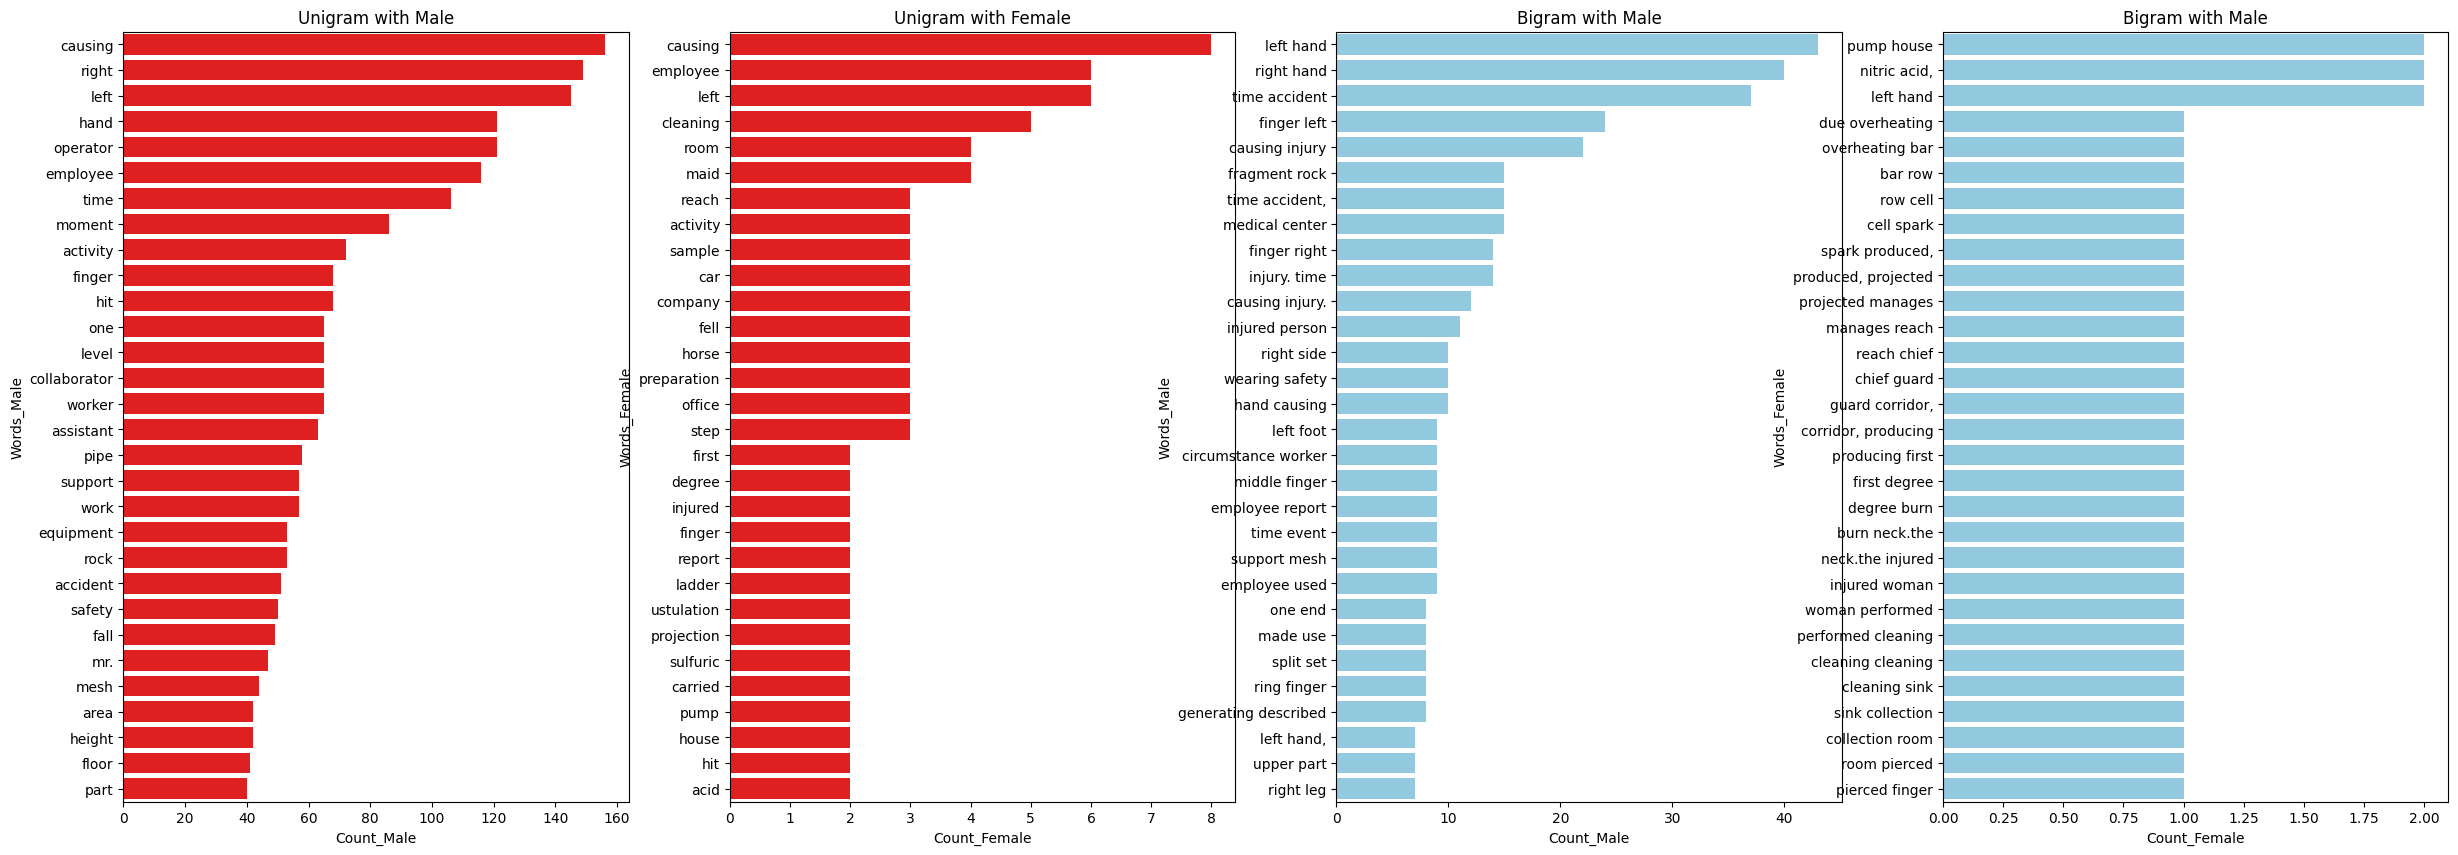

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(30, 10))

sns.barplot(y = uni_male_female['Words_Male'], x = uni_male_female['Count_Male'], ax=axes[0], color='red');
axes[0].set_title('Unigram with Male');

sns.barplot(y = uni_male_female['Words_Female'], x = uni_male_female['Count_Female'], ax=axes[1], color='red');
axes[1].set_title('Unigram with Female');

sns.barplot(y = bi_male_female['Words_Male'], x = bi_male_female['Count_Male'], ax=axes[2], color='skyblue');
axes[2].set_title('Bigram with Male');

sns.barplot(y = bi_male_female['Words_Female'], x = bi_male_female['Count_Female'], ax=axes[3], color='skyblue');
axes[3].set_title('Bigram with Male');

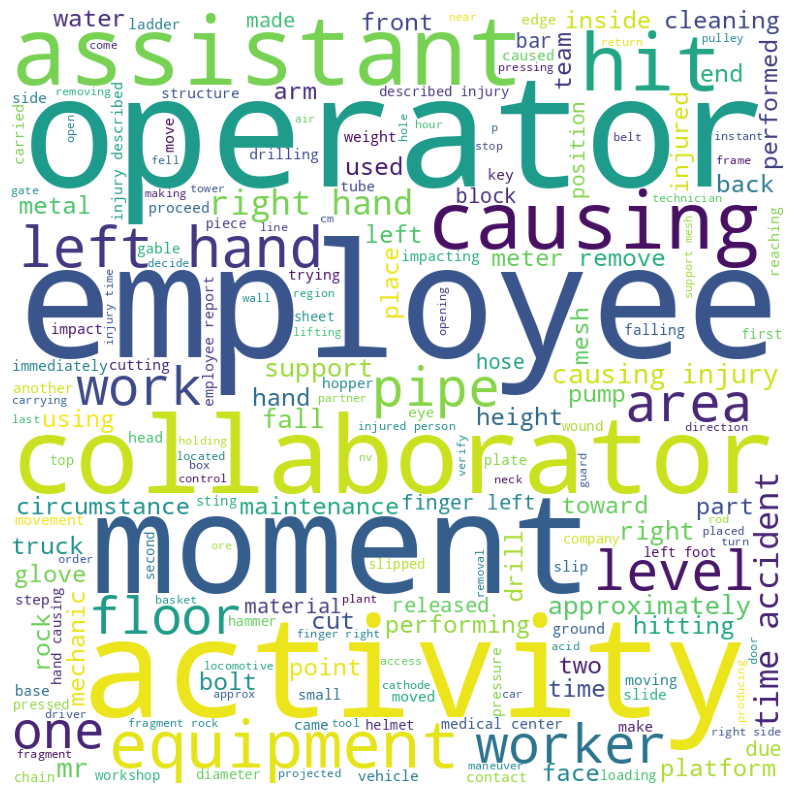

In [ ]:
#Word Cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(des_cleaning(' '.join(df['Description'].sum().split()))))
plt.figure(figsize = (10, 15), facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

As same as the Ngram analysis above, there are many hand-related and movement-related words.
Hand-related: left, right, hand, finger, and glove
Movement-related: fall, hit, carry, lift and slip

In [ ]:
#POS Tagging
blob = TextBlob(str(df['NewDescription']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.head()

pos
NN     35
CD     11
JJ      6
RB      6
VBG     4
Name: count, dtype: int64

<Axes: ylabel='pos'>

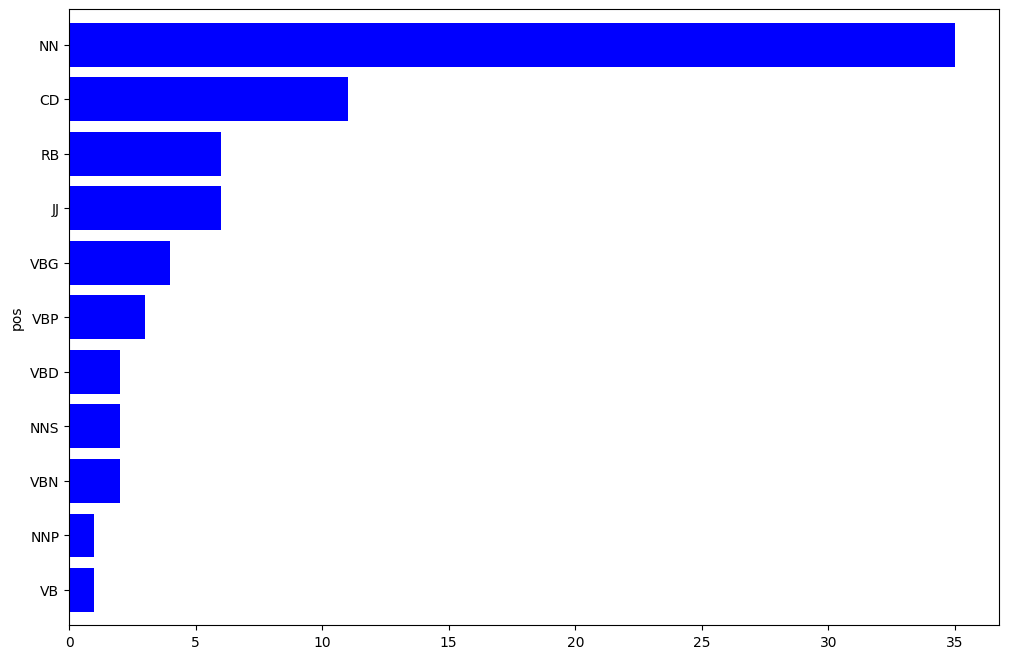

In [ ]:
pos_df.sort_values().plot.barh(color = 'blue', width = 0.8, figsize = (12,8))

NN - noun

NNP - proper noun

NNS - noun plural

CD - cardinal digit

DT - determiner

VB - verb

JJ - adjective

RB - adverb

VB -	verb

VBD	- verb past tense...etc

*Train Test split*



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['NewDescription'], df['Potential Accident Level'].values, test_size=0.2, random_state=42)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 328
Validation utterances: 83


## 1. Bag of words
A bag-of-words is a representation of text that describes the occurrence of words within a document.

In [ ]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
# Converting the categorical values to one-hot encoding
y_train_new = pd.get_dummies(y_train)
y_test_new = pd.get_dummies(y_test)

#**TF-IDF**

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.


In [ ]:

# Initializing TfidfVectorizer object
tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

**Word Embeddings**

Word2Vec

Word2vec is a combination of models used to represent distributed representations of words in a corpus C. Word2Vec (W2V) is an algorithm that accepts text corpus as an input and outputs a vector representation for each word of 32 or more dimension

In [ ]:
# Converting the words back to the sentence form for modelling
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary

            continue
    if count != 0:
        vec /= count
    return vec

#3. CBOW

In [ ]:


training = df['NewDescription'].tolist() # Covnerting the text to list
training = [sentence.split(' ')  for sentence in training] # Splitting on each sentence which gives the multi dimensional list
np.array(training[0]) # Priting the first sentence

array(['removing', 'drill', 'rod', 'jumbo', 'maintenance,', 'supervisor',
       'proceeds', 'loosen', 'support', 'intermediate', 'centralizer',
       'facilitate', 'removal,', 'seeing', 'mechanic', 'support', 'one',
       'end', 'drill', 'equipment', 'pull', 'hand', 'bar', 'accelerate',
       'removal', 'this,', 'moment', 'bar', 'slide', 'point', 'support',
       'tightens', 'finger', 'mechanic', 'drilling', 'bar', 'beam',
       'jumbo.'], dtype='<U12')

In [ ]:
# Initiation of Word2Vec model
# Every word represented by 100 dimensions, ignore words which appears less than 2 times, and use skip gram model
model = Word2Vec(sentences=training,
                 min_count =2,
                 sg=0,
                 vector_size=100)
print(model)

Word2Vec<vocab=1644, vector_size=100, alpha=0.025>


In [ ]:
# The trained word vectors are stored in a KeyedVectors instance, as model.wv
print(model.wv['removing'].reshape(1,100)) # printing the 100 dimensional vector for first word
vectors = model.wv.vectors # Storing the vectors of words which is trained on word2vec model

[[-0.01191995  0.01897533 -0.00682094 -0.00672954 -0.00524076 -0.01161223
   0.00147491  0.03359563  0.00244178  0.00223396 -0.00272183 -0.01226125
  -0.00304676  0.01030028 -0.00628932  0.00034063 -0.00125749 -0.02677058
   0.00282789 -0.01170917  0.0099641   0.0053351   0.01454176  0.00576408
  -0.00909215  0.00574163 -0.00732306 -0.01586732 -0.00877934  0.00286695
   0.02026979  0.00145846 -0.00582015 -0.00791986 -0.00797105  0.00342823
  -0.0025677  -0.02105861  0.00176713 -0.02895006  0.00378699 -0.01339524
  -0.00118866 -0.00248598 -0.00051676 -0.00996689  0.00134542  0.0029614
   0.00913269 -0.00019917 -0.00211887 -0.0003226  -0.0082523  -0.00112331
  -0.00665932 -0.0016268   0.00538851 -0.00762463 -0.01593375  0.00320147
   0.01006472  0.00787203 -0.01061854 -0.00030786 -0.00691817  0.01528123
   0.00620832  0.01951589 -0.00689302  0.01667477 -0.00430573  0.00800315
   0.01140198 -0.00593641  0.02093006 -0.00454584  0.00455936  0.00387182
  -0.00410264  0.00545644 -0.01196358 -

In [ ]:

tokenized_words = [i.split() for i in df['NewDescription']]
wordvec_arrays = np.zeros((len(tokenized_words), 100))
num_sentences = len(tokenized_words)

# Vector size (should match the vector_size of the Word2Vec model)
vector_size = model.vector_size

# Initialize the word vector array
wordvec_arrays = np.zeros((num_sentences, vector_size))

# Fill the array with word vectors
for i, tokens in enumerate(tokenized_words):
    # Initialize an empty vector to accumulate token vectors
    temp_vector = np.zeros(vector_size)
    valid_token_count = 0

    for token in tokens:
        if token in model.wv:
            temp_vector += model.wv[token]
            valid_token_count += 1

    if valid_token_count > 0:
        wordvec_arrays[i, :] = temp_vector / valid_token_count

print(wordvec_arrays)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape



[[-0.01027346  0.01654096  0.00023443 ... -0.01434158  0.00697426
  -0.00562143]
 [-0.00994255  0.008142   -0.0030142  ... -0.00591176  0.00312343
   0.00052653]
 [-0.01067425  0.01792204 -0.0001514  ... -0.01544321  0.00806825
  -0.0068027 ]
 ...
 [-0.01139124  0.0184629  -0.00152712 ... -0.01350259  0.00627777
  -0.0051176 ]
 [-0.01444235  0.02328161 -0.00154449 ... -0.01800052  0.01074862
  -0.00975334]
 [-0.00846563  0.01125419 -0.00018797 ... -0.01295426  0.0083104
  -0.00169756]]


(411, 100)

In [ ]:
tokenized_words = [i.split() for i in df['NewDescription']]
 #Splitting the data on word2vec embeddings
xtrain_w2v, xtest_w2v = train_test_split(wordvec_df, random_state=42, test_size=0.2)

## 4. Skip Gram

In [ ]:
training = df['NewDescription'].tolist() # Covnerting the text to list
training = [sentence.split(' ')  for sentence in training] # Splitting on each sentence which gives the multi dimensional list
np.array(training[0]) # Priting the first sentence

array(['removing', 'drill', 'rod', 'jumbo', 'maintenance,', 'supervisor',
       'proceeds', 'loosen', 'support', 'intermediate', 'centralizer',
       'facilitate', 'removal,', 'seeing', 'mechanic', 'support', 'one',
       'end', 'drill', 'equipment', 'pull', 'hand', 'bar', 'accelerate',
       'removal', 'this,', 'moment', 'bar', 'slide', 'point', 'support',
       'tightens', 'finger', 'mechanic', 'drilling', 'bar', 'beam',
       'jumbo.'], dtype='<U12')

In [ ]:
# Initiation of Word2Vec model
# Every word represented by 100 dimensions, ignore words which appears less than 2 times, and use skip gram model
model = Word2Vec(sentences=training,
                 min_count =2,
                 sg=1,
                 vector_size=100)
print(model)

Word2Vec<vocab=1644, vector_size=100, alpha=0.025>


In [ ]:
model.wv['removing'] # printing the 100 dimensional vector for first word

array([-0.10286023,  0.20276172, -0.00676462, -0.03109159,  0.01722059,
       -0.2388527 ,  0.07923774,  0.43831164, -0.00569451, -0.0700665 ,
       -0.05702552, -0.19650061,  0.01456609,  0.08253013,  0.02083661,
       -0.10927787,  0.02086897, -0.24895418,  0.00677449, -0.2898982 ,
        0.14478932,  0.04760326,  0.14796054, -0.07092567, -0.11280056,
       -0.01699949, -0.10117105, -0.09754859, -0.13464585, -0.0181541 ,
        0.22674961,  0.07198486, -0.03914297, -0.03322377, -0.01804323,
        0.13602576, -0.02374828, -0.19331145, -0.12659244, -0.33940595,
        0.04400003, -0.15267088,  0.03500459,  0.05045792,  0.1403737 ,
       -0.04411935, -0.03382138,  0.01499345,  0.08567853,  0.15690534,
        0.02680034, -0.08776245, -0.17994738,  0.07838015, -0.19636013,
        0.1140344 ,  0.0987516 , -0.02186523, -0.22900501,  0.03645242,
        0.12050936,  0.04001609, -0.08681037, -0.02215127, -0.19231375,
        0.20501809,  0.10318115,  0.16709419, -0.21944427,  0.24

In [ ]:
tokenized_words = [i.split() for i in df['NewDescription']]

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_words), 100))

for i in range(len(tokenized_words)):
    wordvec_arrays[i,:] = word_vector(tokenized_words[i], 100)

skipgram_df = pd.DataFrame(wordvec_arrays)
skipgram_df.shape

(411, 100)

In [ ]:
# Splitting the data on word2vec embeddings
xtrain_skip, xtest_skip= train_test_split(skipgram_df, random_state=42, test_size=0.2)

**5. GLOVE EMBEDDINGS**

In [ ]:
# Getting the length of the each description
df['sen_length'] = [len(i.split()) for i in df.NewDescription]

print('min length:',df.sen_length.min(), '\t' ,'max length:', df.sen_length.max())

min length: 9 	 max length: 93


<Axes: xlabel='sen_length', ylabel='Density'>

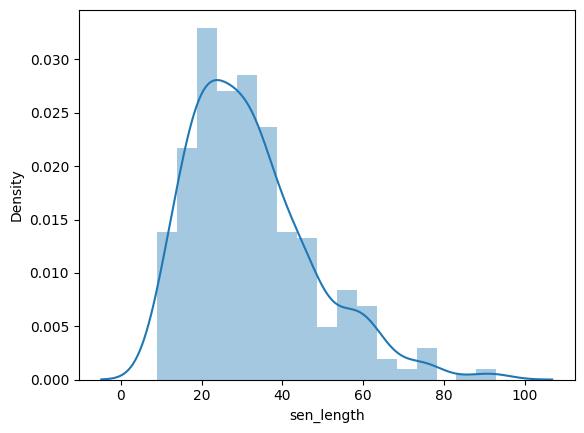

In [ ]:
sns.distplot(df.sen_length)

In [ ]:
max_features = 10000
maxlen = df.sen_length.max()      # Add your max length here
embedding_size = 100              # Size of the embeddings
#------------------------------------------------------------

# Tokeninzing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['NewDescription'])

In [ ]:
# Transforming each text to a sequence of integers.
X = tokenizer.texts_to_sequences(df['NewDescription'])
#------------------------------------------------------------

# Get the Vocabulary size
vocab_size = len(tokenizer.word_index)
#-------------------------------------------------------------

# Padding the sequences to ensure that all sequences in a list have the same length
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['Potential Accident Level'])
#-------------------------------------------------------------

print("Number of Samples:", len(X))

Number of Samples: 411


In [ ]:
# Download the GloVe embeddings
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip -O glove.6B.zip

# Unzip the downloaded file
!unzip -q glove.6B.zip

# Verify the directory contents
!ls

# Load GloVe Model (100D)
from gensim.models import KeyedVectors

glove_file = 'glove.6B.100d.txt'
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

--2024-06-16 13:52:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-16 13:52:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-16 13:52:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embeddings = {}
for o in open(glove_file, encoding="utf8"):
     word = o.split(" ")[0]
     print(word)
     embd = o.split(" ")[1:]
     embd = np.asarray(embd, dtype='float32')
     print(embd)
     embeddings[word] = embd

Streaming output truncated to the last 5000 lines.
  0.45191   -0.25587   -0.24104   -0.12871   -0.1735    -0.54123
  0.046478  -0.33745    0.19382    0.15413   -0.11041    0.24291
 -0.092769   0.025335  -0.054363   0.062758   0.042962   0.39225
  0.16882    0.60407    0.10298   -0.33461   -0.09897   -0.6859
  0.12542    0.48187    0.19308    0.036737  -0.6461    -0.082856
  0.11237   -0.23095   -0.061489  -0.011843  -0.42802    0.028814
 -0.006828  -0.19267   -0.16634    0.10103    0.46372   -0.09067
 -0.37755    0.37929   -0.23615   -0.22986   -0.058458   0.21233
  0.64083    0.73464   -0.48036    0.24388    0.42688    0.23026
  0.40298    0.48567   -0.32028   -0.19621    0.43989    0.12678
  0.085822  -0.024536   0.35801    0.0090023  0.34849   -0.072897
  0.38076    0.45574   -0.25728    0.077557 ]
neukomm
[ 0.097527  -0.36919   -0.58502    0.19861   -0.049643  -0.19937
 -0.097126  -0.41012    0.39693   -0.061985  -0.087345   0.34818
 -0.21003   -0.57723   -0.20543   -0.0062616 -0.

In [ ]:
embedding_matrix = np.zeros((vocab_size+1, 100))

for word, i in tokenizer.word_index.items():
     embedding_vector = embeddings.get(word)
     if embedding_vector is not None:
               embedding_matrix[i-1] = embedding_vector
len(embeddings.values())

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

In [ ]:
def find_similar_word(embedes):
  nearest = sorted(embedding_matrix.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest

In [ ]:
word_to_index = {f"word_{i}": i for i in range(10000)}  # Example word-to-index mapping
index_to_word = {i: f"word_{i}" for i in range(10000)}  # Reverse mapping
embeddings_index = load_glove_embeddings('glove.6B.100d.txt')

In [ ]:
from scipy.spatial import distance
def find_similar_word(embed_vec, embedding_matrix, index_to_word, top_n=10):
    distances = distance.cdist([embed_vec], embedding_matrix, "euclidean")[0]
    nearest_indices = np.argsort(distances)[:top_n]
    nearest_words = [index_to_word[idx] for idx in nearest_indices]
    return nearest_words

In [ ]:
# Example embedding to find similar words for
example_words = list(words_for_embedding)

In [ ]:
# Example embedding to find similar words for (you should replace this with the actual embedding vector


words = list(embeddings_index.keys())


for i, word in enumerate(words):
    for example_word in example_words:
        embedding_matrix[i] = embeddings_index[word]
        word_to_index[word] = i
        index_to_word[i] = word
        if example_word in word_to_index:
           example_embed_vec = embeddings_index[example_word]
           similar_words = find_similar_word(example_embed_vec, embedding_matrix, index_to_word, top_n=10)
           print(f"Words similar to '{example_word}': {similar_words}")
        else:
           print(f"Word '{example_word}' not found in the vocabulary.")


Streaming output truncated to the last 5000 lines.
Word 'height' not found in the vocabulary.
Word 'cm',' not found in the vocabulary.
Word '"in' not found in the vocabulary.
Word 'alimak' not found in the vocabulary.
Word 'chimney' not found in the vocabulary.
Word 'level' not found in the vocabulary.
Word 'alimakero' not found in the vocabulary.
Word 'driller' not found in the vocabulary.
Word 'assistant' not found in the vocabulary.
Word 'positioned' not found in the vocabulary.
Word 'main' not found in the vocabulary.
Word 'cage' not found in the vocabulary.
Word 'guard' not found in the vocabulary.
Word 'head' not found in the vocabulary.
Word 'proceed' not found in the vocabulary.
Word 'perform' not found in the vocabulary.
Word 'rock' not found in the vocabulary.
Word 'untie' not found in the vocabulary.
Word 'top' not found in the vocabulary.
Word 'chimney,' not found in the vocabulary.
Word 'time' not found in the vocabulary.
Word 'teacher' not found in the vocabulary.
Word 'p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Word 'pushed' not found in the vocabulary.
Word 'side' not found in the vocabulary.
Word 'container' not found in the vocabulary.
Word 'creating' not found in the vocabulary.
Word 'opening' not found in the vocabulary.
Word 'corrugated' not found in the vocabulary.
Word 'iron' not found in the vocabulary.
Word 'wall,' not found in the vocabulary.
Word 'time,' not found in the vocabulary.
Word 'continuing' not found in the vocabulary.
Word 'hit' not found in the vocabulary.
Word 'ribbon,' not found in the vocabulary.
Word 'fall' not found in the vocabulary.
Word 'causing' not found in the vocabulary.
Word 'wall' not found in the vocabulary.
Word 'container' not found in the vocabulary.
Word 'return' not found in the vocabulary.
Word 'initial' not found in the vocabulary.
Word 'position,' not found in the vocabulary.
Word 'pressing' not found in the vocabulary.
Word 'tip' not found in the vocabulary.
Word 'little' not found in the vocabu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
Word 'stun' not found in the vocabulary.
Word 'noise' not found in the vocabulary.
Word 'produced.',' not found in the vocabulary.
Word ''the' not found in the vocabulary.
Word 'employee' not found in the vocabulary.
Words similar to 'report': ['report', 'reports', 'word_2812', 'reported', 'word_1003', 'word_1218', 'according', 'word_1413', 'statement', 'word_1865']
Word 'performed' not found in the vocabulary.
Word 'routine' not found in the vocabulary.
Word 'activity' not found in the vocabulary.
Word 'foundry' not found in the vocabulary.
Words similar to 'area': ['area', 'areas', 'where', 'word_1033', 'along', 'word_905', 'word_2248', 'located', 'word_2083', 'part']
Word 'necessary' not found in the vocabulary.
Word 'fit' not found in the vocabulary.
Words similar to 'last': ['last', 'week', 'month', 'word_2431', 'word_1866', 'ago', 'year', 'earlier', 'months', 'weeks']
Word 'zamac' not found in the vocabulary.
Word 'ingot' not fou

In [ ]:
def vectorize_text(tokens, embeddings_index, embedding_dim=100):
    vector = np.zeros(embedding_dim)
    count = 0
    for token in tokens:
        if token in embeddings_index:
            vector += embeddings_index[token]
            count += 1
    if count > 0:
        vector /= count
    return vector

In [ ]:
# Vectorize the tokenized texts
embedding_dim = 100
vectors = np.array([vectorize_text(tokens, embeddings_index, embedding_dim) for tokens in df['NewDescription']])
vectors=vectors.T
vectors.shape

(100, 411)

In [ ]:
# Split the data
X_train_glove, X_test_glove, y_train, y_test = train_test_split(vectors.T,y, test_size=0.2, random_state=42)

Thus using glove model we find similar words for all stop words to model and predict future predictions

In [ ]:
df = df.drop('Description', axis=1)
#df = df.drop(unnamed,axis=1)

In [ ]:
output_file_path = '/content/drive/My Drive/industrial_accidents.xlsx'
df.to_excel(output_file_path, index=False)

In [ ]:
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Building**

In [ ]:
# To replace white space everywhere in Employee type
df['Employee Type'] = df['Employee Type'].str.replace(' ', '_')
df['Employee Type'].value_counts()

Employee Type
Third_Party             180
Employee                176
Third_Party_(Remote)     55
Name: count, dtype: int64

In [ ]:
# To replace white space everywhere in Critical Risk
df['Critical Risk'] = df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
df['Critical Risk'].value_counts().head()

Critical Risk
Others                 223
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: count, dtype: int64

In [ ]:
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

# Print the one-hot encoded data (for reference)
print("One-hot encoded y_train:\n", y_train_encoded)
# Convert to 1D array (get the original categorical values)
y_train_new = y_train_encoded.idxmax(axis=1).to_numpy()
y_test_new = y_test_encoded.idxmax(axis=1).to_numpy()

# Print the 1D array of encoded data
print("\n1D array of y_train_new:\n", y_train_new)
print("\n1D array of y_test_new:\n", y_test_new)
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training data and transform both training and test data
y_train_new = label_encoder.fit_transform(y_train)
y_test_new= label_encoder.transform(y_test)
print(y_train_encoded)
print(y_test_encoded)
print(y_train_new)
print(y_test_new)

One-hot encoded y_train:
          I     II    III     IV      V
0    False   True  False  False  False
1    False  False  False   True  False
2     True  False  False  False  False
3    False  False   True  False  False
4     True  False  False  False  False
..     ...    ...    ...    ...    ...
323  False  False   True  False  False
324   True  False  False  False  False
325  False  False  False   True  False
326  False  False  False  False   True
327  False   True  False  False  False

[328 rows x 5 columns]

1D array of y_train_new:
 ['II' 'IV' 'I' 'III' 'I' 'II' 'II' 'II' 'III' 'IV' 'III' 'IV' 'I' 'III'
 'II' 'III' 'II' 'III' 'IV' 'III' 'II' 'IV' 'III' 'V' 'II' 'IV' 'IV' 'IV'
 'III' 'III' 'III' 'III' 'III' 'I' 'IV' 'II' 'III' 'IV' 'II' 'IV' 'II'
 'III' 'I' 'III' 'III' 'III' 'IV' 'II' 'IV' 'III' 'II' 'II' 'IV' 'IV' 'II'
 'III' 'II' 'I' 'II' 'III' 'I' 'IV' 'IV' 'IV' 'V' 'V' 'IV' 'II' 'III' 'II'
 'I' 'III' 'IV' 'III' 'V' 'III' 'IV' 'IV' 'III' 'IV' 'III' 'IV' 'III' 'II'
 'II' 'II' 'I

In [ ]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, report, save_model):

    if report == "yes":
        print (model)
        print ("***************************************************************************")
        model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")

        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set


    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')


    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score,
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score,
                              }, index=[index])

    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))

    return resultsDf  # return all the metrics along with predictions

In [ ]:
# Defining a function which quickly test the fit of 11 different models on the dataset
def ml_models(X_train , y_train_new, X_test, y_test_new):

    # creating a dictionary with different ML models
    models = {
        'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(kernel = 'rbf', probability=True),
        'RidgeClassifier':RidgeClassifier(random_state = 1),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier(task_type= 'GPU', loss_function="MultiClass", random_state=1, verbose=0),
    }

    names = []
    scores = []
    resultsDf_common = pd.DataFrame()
    i = 1
    for name, model in models.items(): # Looping through each and every model
        reg_resultsDf = train_test_model(model, name, X_train, X_test, y_train_new, y_test_new, 'none', i, 'yes', 'no')
        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

        #names.append(name)
        #scores.append(result) # Appending the test scores to the list

        #result_df =  pd.DataFrame({'model': names, 'accuracy': scores}) # Creating the dataframe using the model scores
    # Plotting the train and test accuracy
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=resultsDf_common, x='Method', y='Train Accuracy', marker='o', label='Train Accuracy')
    sns.lineplot(data=resultsDf_common, x='Method', y='Test Accuracy', marker='o', label='Test Accuracy')
    plt.xticks(rotation=45)
    plt.title('Train and Test Accuracy of Different Models')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return resultsDf_common # Returns the dataframe


LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


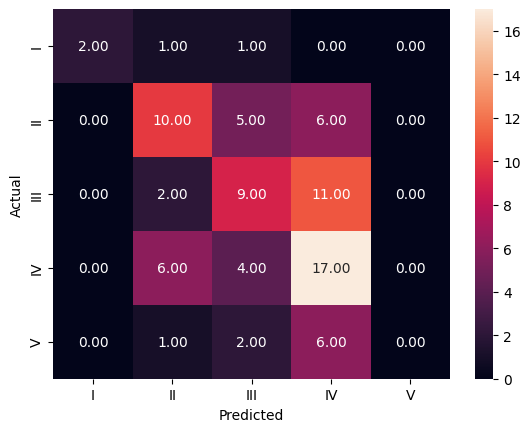

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      0.48      0.49        21
           2       0.43      0.41      0.42        22
           3       0.42      0.63      0.51        27
           4       0.00      0.00      0.00         9

    accuracy                           0.46        83
   macro avg       0.47      0.40      0.42        83
weighted avg       0.43      0.46      0.43        83

GaussianNB()
***************************************************************************


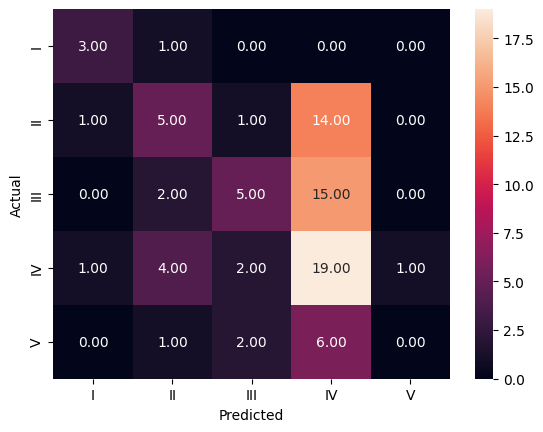

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.38      0.24      0.29        21
           2       0.50      0.23      0.31        22
           3       0.35      0.70      0.47        27
           4       0.00      0.00      0.00         9

    accuracy                           0.39        83
   macro avg       0.37      0.38      0.35        83
weighted avg       0.37      0.39      0.34        83

KNeighborsClassifier()
***************************************************************************


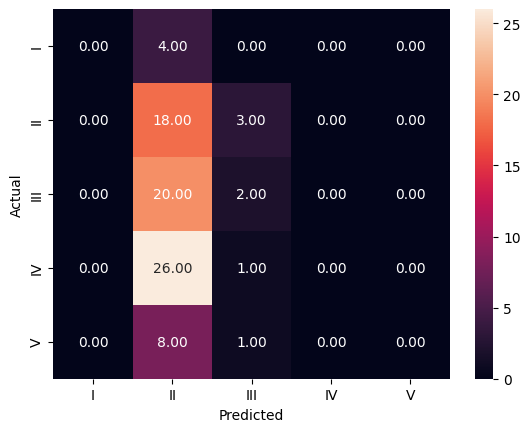

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.24      0.86      0.37        21
           2       0.29      0.09      0.14        22
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         9

    accuracy                           0.24        83
   macro avg       0.10      0.19      0.10        83
weighted avg       0.14      0.24      0.13        83

SVC(probability=True)
***************************************************************************


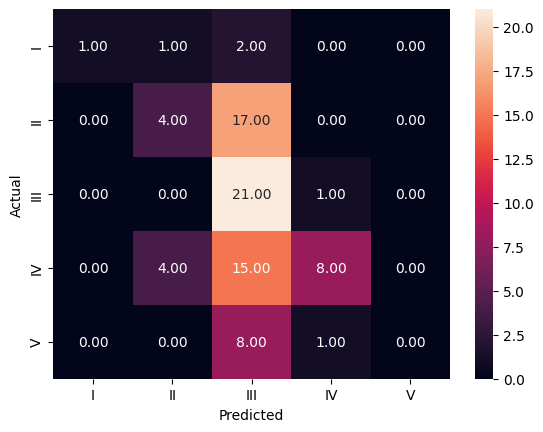

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.44      0.19      0.27        21
           2       0.33      0.95      0.49        22
           3       0.80      0.30      0.43        27
           4       0.00      0.00      0.00         9

    accuracy                           0.41        83
   macro avg       0.52      0.34      0.32        83
weighted avg       0.51      0.41      0.36        83

RidgeClassifier(random_state=1)
***************************************************************************


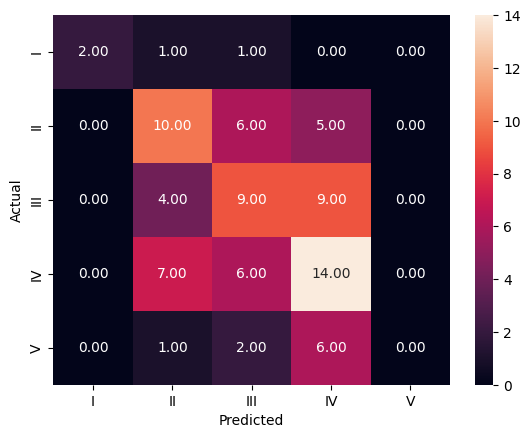

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.43      0.48      0.45        21
           2       0.38      0.41      0.39        22
           3       0.41      0.52      0.46        27
           4       0.00      0.00      0.00         9

    accuracy                           0.42        83
   macro avg       0.44      0.38      0.39        83
weighted avg       0.39      0.42      0.40        83

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)
***************************************************************************


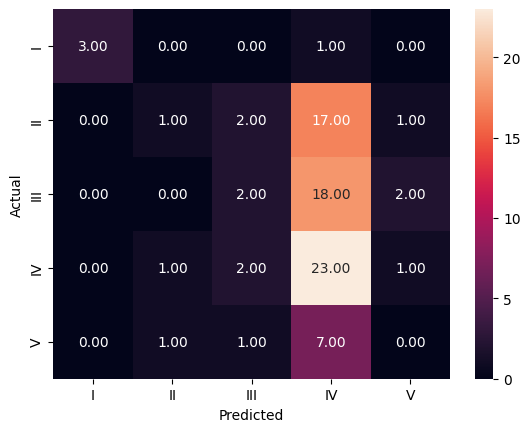

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.33      0.05      0.08        21
           2       0.29      0.09      0.14        22
           3       0.35      0.85      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.35        83
   macro avg       0.39      0.35      0.31        83
weighted avg       0.32      0.35      0.26        83

RandomForestClassifier(max_depth=7)
***************************************************************************


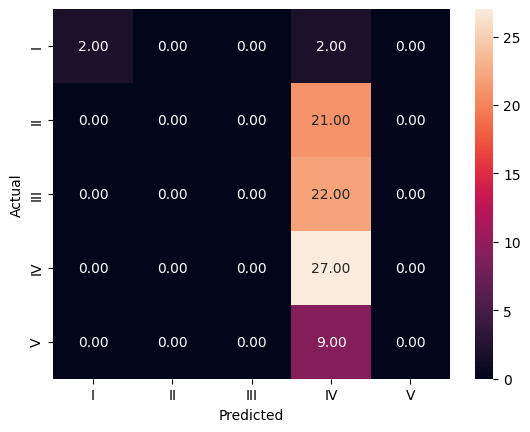

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.33      1.00      0.50        27
           4       0.00      0.00      0.00         9

    accuracy                           0.35        83
   macro avg       0.27      0.30      0.23        83
weighted avg       0.16      0.35      0.19        83

BaggingClassifier(max_samples=0.7, n_estimators=50)
***************************************************************************


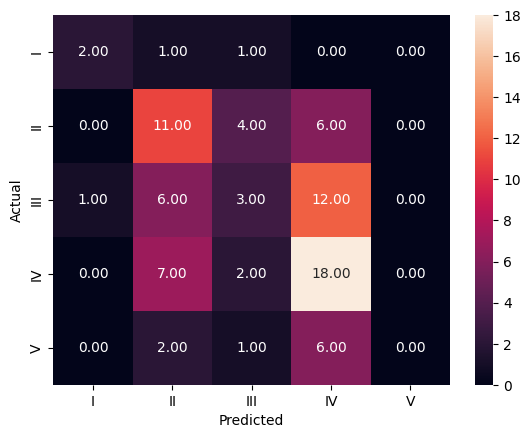

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.41      0.52      0.46        21
           2       0.27      0.14      0.18        22
           3       0.43      0.67      0.52        27
           4       0.00      0.00      0.00         9

    accuracy                           0.41        83
   macro avg       0.36      0.37      0.35        83
weighted avg       0.35      0.41      0.36        83

AdaBoostClassifier()
***************************************************************************


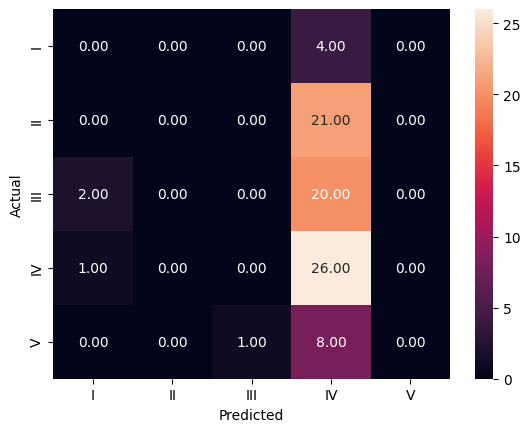

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.33      0.96      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.31        83
   macro avg       0.07      0.19      0.10        83
weighted avg       0.11      0.31      0.16        83

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50)
***************************************************************************


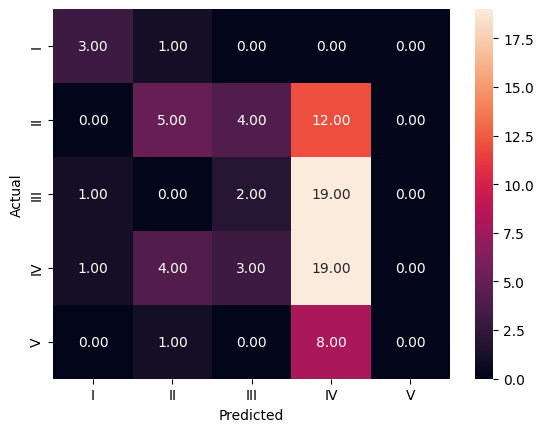

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.45      0.24      0.31        21
           2       0.22      0.09      0.13        22
           3       0.33      0.70      0.45        27
           4       0.00      0.00      0.00         9

    accuracy                           0.35        83
   macro avg       0.32      0.36      0.31        83
weighted avg       0.31      0.35      0.29        83

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              loss_function='MultiClass', max_bin=None, max_cat_threshold=None,
              max_cat_t

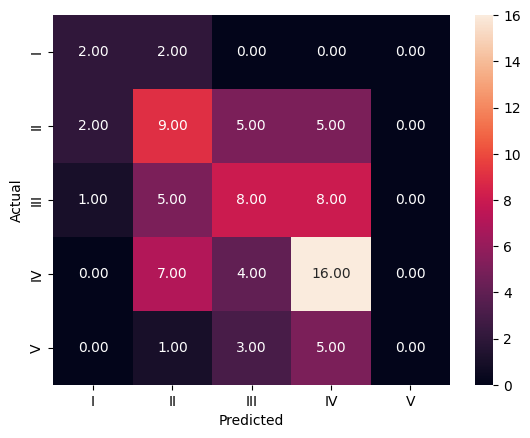

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.38      0.43      0.40        21
           2       0.40      0.36      0.38        22
           3       0.47      0.59      0.52        27
           4       0.00      0.00      0.00         9

    accuracy                           0.42        83
   macro avg       0.33      0.38      0.35        83
weighted avg       0.37      0.42      0.39        83



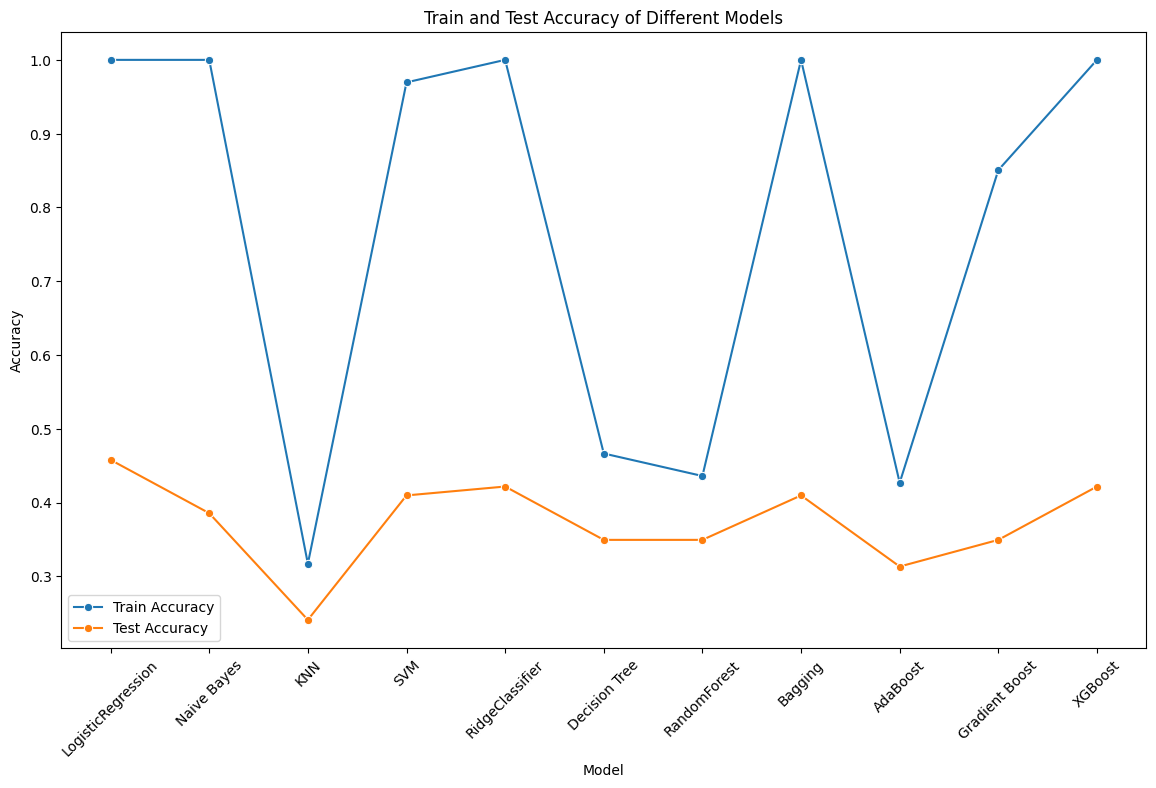

Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1   LogisticRegression        1.000000       0.457831   0.426549  0.457831   
2          Naive Bayes        1.000000       0.385542   0.373216  0.385542   
3                  KNN        0.317073       0.240964   0.135655  0.240964   
4                  SVM        0.969512       0.409639   0.509237  0.409639   
5      RidgeClassifier        1.000000       0.421687   0.391543  0.421687   
6        Decision Tree        0.466463       0.349398   0.321624  0.349398   
7         RandomForest        0.435976       0.349398   0.156627  0.349398   
8              Bagging        1.000000       0.409639   0.346911  0.409639   
9             AdaBoost        0.426829       0.313253   0.107061  0.313253   
10      Gradient Boost        0.850610       0.349398   0.309388  0.349398   
11             XGBoost        1.000000       0.421687   0.373264  0.421687   

    F1-Score  
1   0.431583  
2   0.341986  
3   0.130461  
4   0.358389  
5   0.400172  
6   0.259854  
7   0.194779  
8   0.361418  
9   0.159582  
10  0.290825  
11  0.394249

In [ ]:
#BOW
ml_models(X_train_bow.toarray(), y_train_new, X_test_bow.toarray(), y_test_new)

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


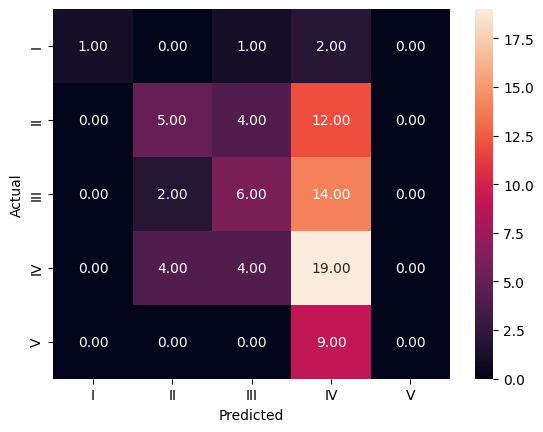

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.45      0.24      0.31        21
           2       0.40      0.27      0.32        22
           3       0.34      0.70      0.46        27
           4       0.00      0.00      0.00         9

    accuracy                           0.37        83
   macro avg       0.44      0.29      0.30        83
weighted avg       0.38      0.37      0.33        83

GaussianNB()
***************************************************************************


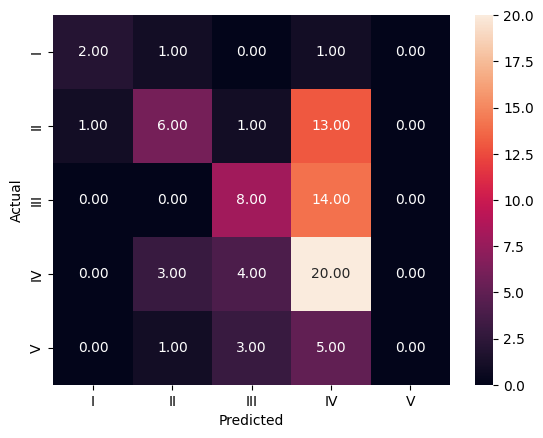

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.55      0.29      0.37        21
           2       0.50      0.36      0.42        22
           3       0.38      0.74      0.50        27
           4       0.00      0.00      0.00         9

    accuracy                           0.43        83
   macro avg       0.42      0.38      0.37        83
weighted avg       0.43      0.43      0.40        83

KNeighborsClassifier()
***************************************************************************


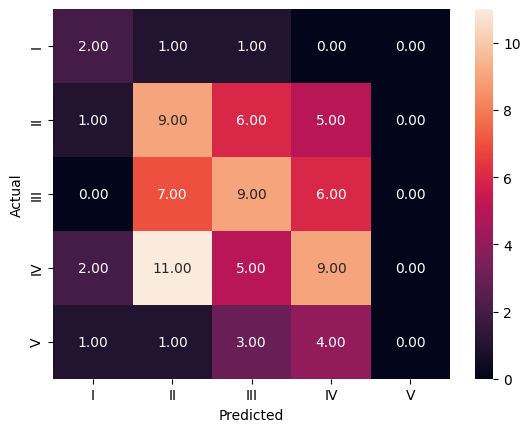

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.31      0.43      0.36        21
           2       0.38      0.41      0.39        22
           3       0.38      0.33      0.35        27
           4       0.00      0.00      0.00         9

    accuracy                           0.35        83
   macro avg       0.28      0.33      0.30        83
weighted avg       0.32      0.35      0.33        83

SVC(probability=True)
***************************************************************************


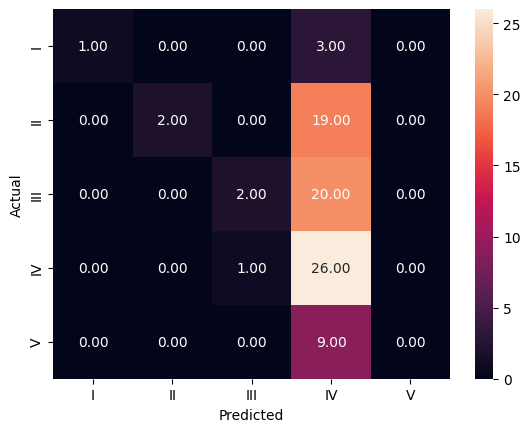

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      0.10      0.17        21
           2       0.67      0.09      0.16        22
           3       0.34      0.96      0.50        27
           4       0.00      0.00      0.00         9

    accuracy                           0.37        83
   macro avg       0.60      0.28      0.25        83
weighted avg       0.59      0.37      0.27        83

RidgeClassifier(random_state=1)
***************************************************************************


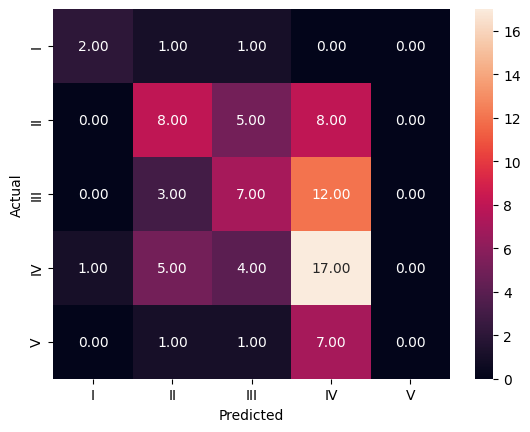

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.44      0.38      0.41        21
           2       0.39      0.32      0.35        22
           3       0.39      0.63      0.48        27
           4       0.00      0.00      0.00         9

    accuracy                           0.41        83
   macro avg       0.38      0.37      0.36        83
weighted avg       0.37      0.41      0.38        83

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)
***************************************************************************


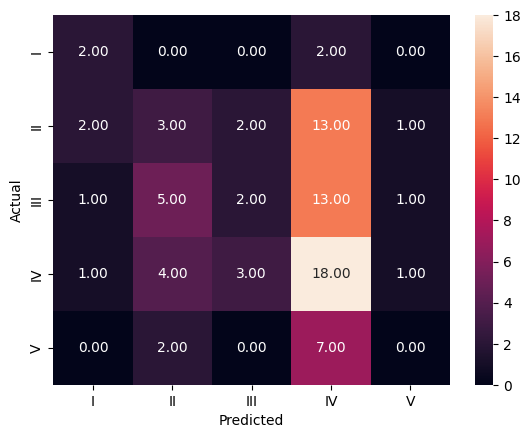

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.21      0.14      0.17        21
           2       0.29      0.09      0.14        22
           3       0.34      0.67      0.45        27
           4       0.00      0.00      0.00         9

    accuracy                           0.30        83
   macro avg       0.23      0.28      0.23        83
weighted avg       0.26      0.30      0.25        83

RandomForestClassifier(max_depth=7)
***************************************************************************


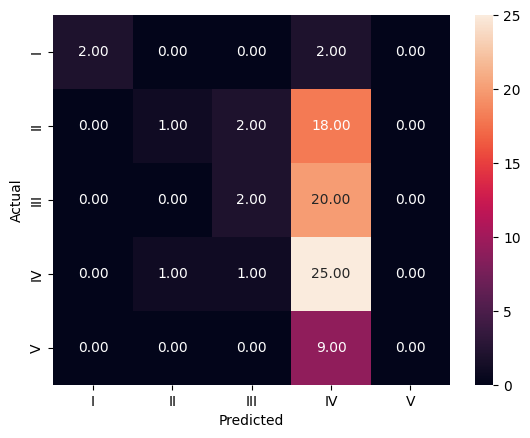

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      0.05      0.09        21
           2       0.40      0.09      0.15        22
           3       0.34      0.93      0.50        27
           4       0.00      0.00      0.00         9

    accuracy                           0.36        83
   macro avg       0.45      0.31      0.28        83
weighted avg       0.39      0.36      0.25        83

BaggingClassifier(max_samples=0.7, n_estimators=50)
***************************************************************************


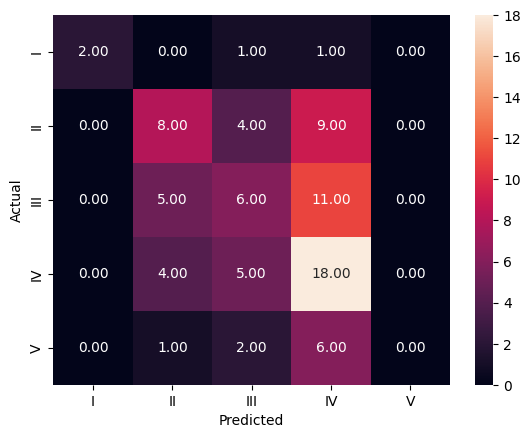

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.44      0.38      0.41        21
           2       0.33      0.27      0.30        22
           3       0.40      0.67      0.50        27
           4       0.00      0.00      0.00         9

    accuracy                           0.41        83
   macro avg       0.44      0.36      0.38        83
weighted avg       0.38      0.41      0.38        83

AdaBoostClassifier()
***************************************************************************


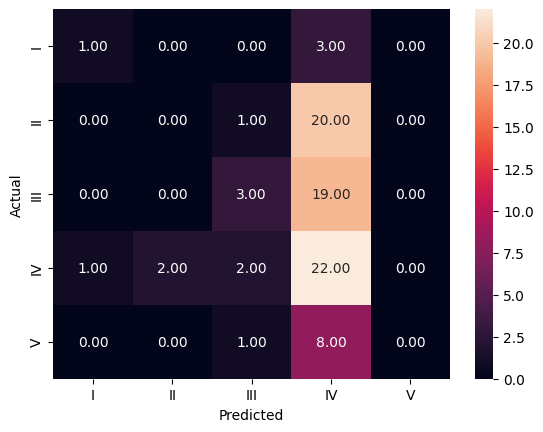

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00        21
           2       0.43      0.14      0.21        22
           3       0.31      0.81      0.44        27
           4       0.00      0.00      0.00         9

    accuracy                           0.31        83
   macro avg       0.25      0.24      0.20        83
weighted avg       0.24      0.31      0.22        83

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50)
***************************************************************************


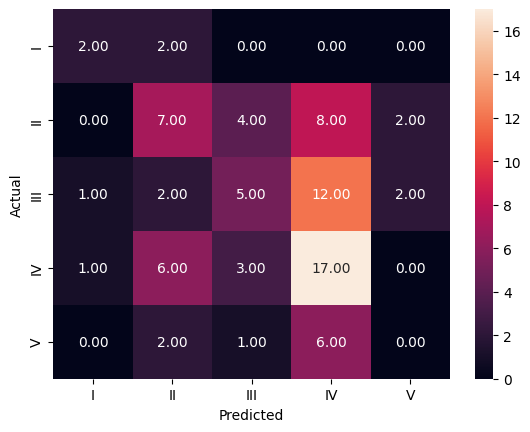

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.37      0.33      0.35        21
           2       0.38      0.23      0.29        22
           3       0.40      0.63      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.37        83
   macro avg       0.33      0.34      0.32        83
weighted avg       0.35      0.37      0.35        83

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              loss_function='MultiClass', max_bin=None, max_cat_threshold=None,
              max_cat_t

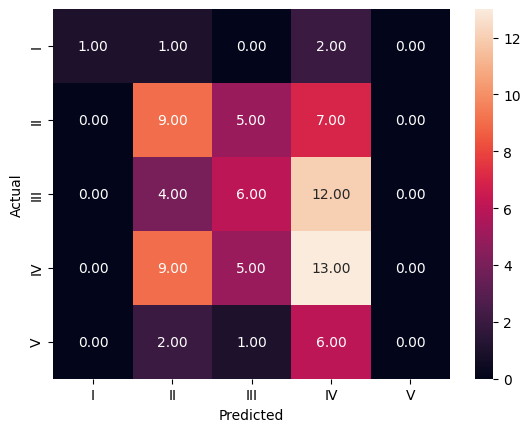

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.36      0.43      0.39        21
           2       0.35      0.27      0.31        22
           3       0.33      0.48      0.39        27
           4       0.00      0.00      0.00         9

    accuracy                           0.35        83
   macro avg       0.41      0.29      0.30        83
weighted avg       0.34      0.35      0.33        83



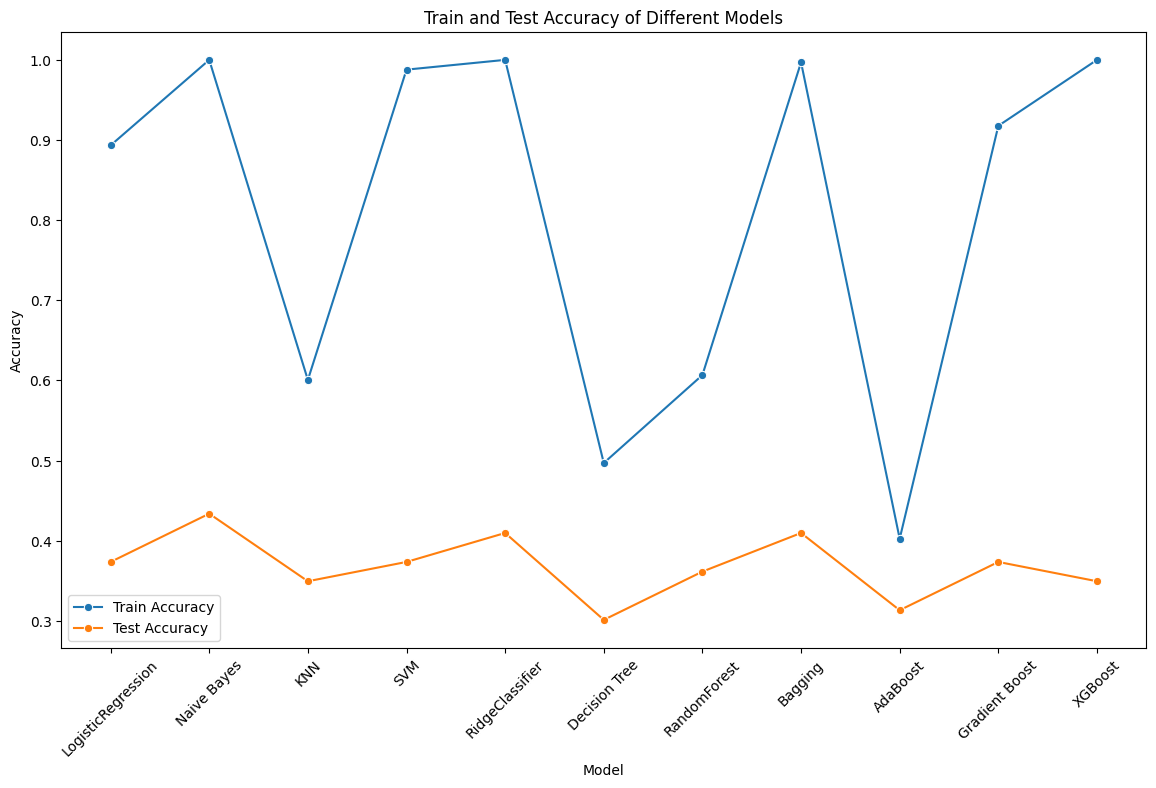

Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1   LogisticRegression        0.893293       0.373494   0.379592  0.373494   
2          Naive Bayes        1.000000       0.433735   0.425420  0.433735   
3                  KNN        0.600610       0.349398   0.315971  0.349398   
4                  SVM        0.987805       0.373494   0.587754  0.373494   
5      RidgeClassifier        1.000000       0.409639   0.373342  0.409639   
6        Decision Tree        0.496951       0.301205   0.256492  0.301205   
7         RandomForest        0.606707       0.361446   0.390622  0.361446   
8              Bagging        0.996951       0.409639   0.379116  0.409639   
9             AdaBoost        0.402439       0.313253   0.237091  0.313253   
10      Gradient Boost        0.917683       0.373494   0.347865  0.373494   
11             XGBoost        1.000000       0.349398   0.338551  0.349398   

    F1-Score  
1   0.333242  
2   0.396673  
3   0.328893  
4   0.268339  
5   0.379888  
6   0.245596  
7   0.254438  
8   0.378097  
9   0.215483  
10  0.346386  
11  0.326075

In [ ]:
#TF-IDF
ml_models(X_train_tf.toarray(), y_train_new, X_test_tf.toarray(), y_test_new)

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


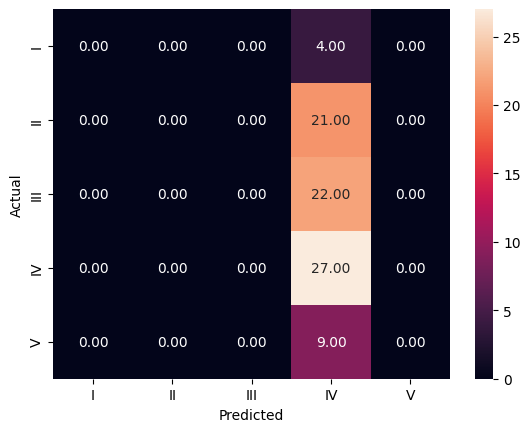

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.33      1.00      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.07      0.20      0.10        83
weighted avg       0.11      0.33      0.16        83

GaussianNB()
***************************************************************************


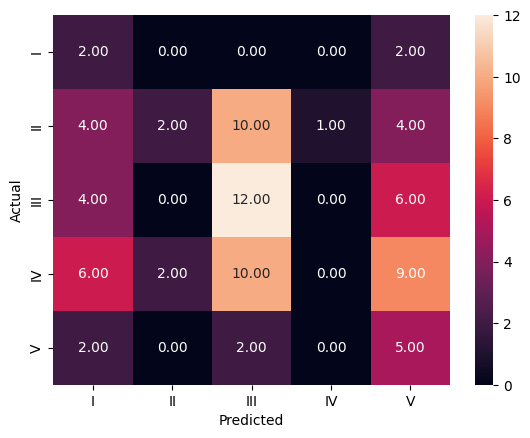

              precision    recall  f1-score   support

           0       0.11      0.50      0.18         4
           1       0.50      0.10      0.16        21
           2       0.35      0.55      0.43        22
           3       0.00      0.00      0.00        27
           4       0.19      0.56      0.29         9

    accuracy                           0.25        83
   macro avg       0.23      0.34      0.21        83
weighted avg       0.25      0.25      0.19        83

KNeighborsClassifier()
***************************************************************************


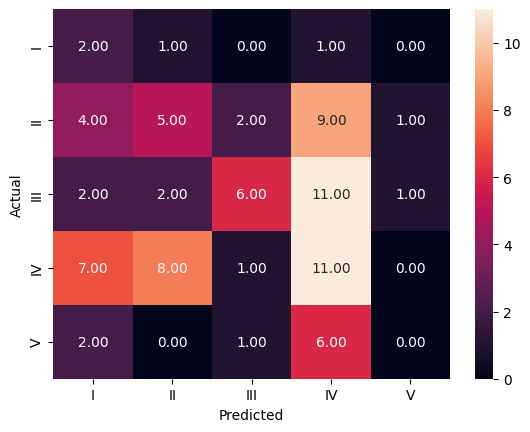

              precision    recall  f1-score   support

           0       0.12      0.50      0.19         4
           1       0.31      0.24      0.27        21
           2       0.60      0.27      0.37        22
           3       0.29      0.41      0.34        27
           4       0.00      0.00      0.00         9

    accuracy                           0.29        83
   macro avg       0.26      0.28      0.23        83
weighted avg       0.34      0.29      0.29        83

SVC(probability=True)
***************************************************************************


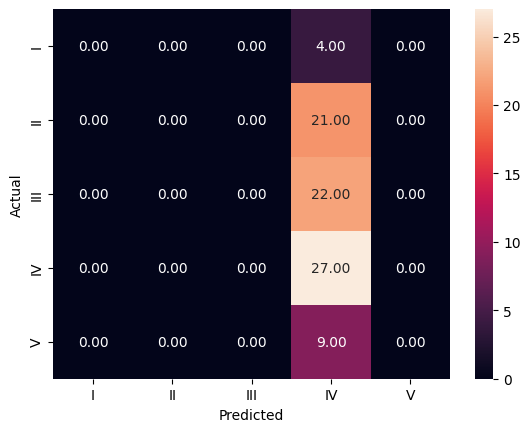

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.33      1.00      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.07      0.20      0.10        83
weighted avg       0.11      0.33      0.16        83

RidgeClassifier(random_state=1)
***************************************************************************


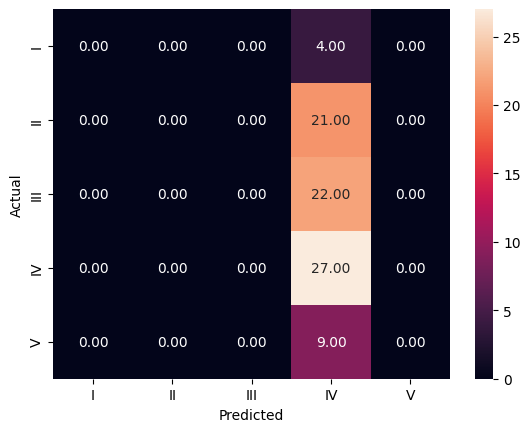

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.33      1.00      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.07      0.20      0.10        83
weighted avg       0.11      0.33      0.16        83

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)
***************************************************************************


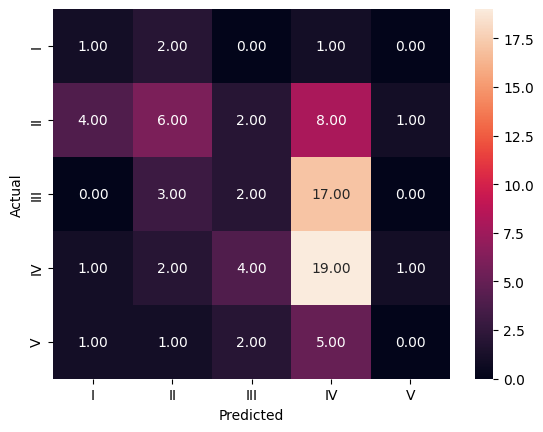

              precision    recall  f1-score   support

           0       0.14      0.25      0.18         4
           1       0.43      0.29      0.34        21
           2       0.20      0.09      0.13        22
           3       0.38      0.70      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.34        83
   macro avg       0.23      0.27      0.23        83
weighted avg       0.29      0.34      0.29        83

RandomForestClassifier(max_depth=7)
***************************************************************************


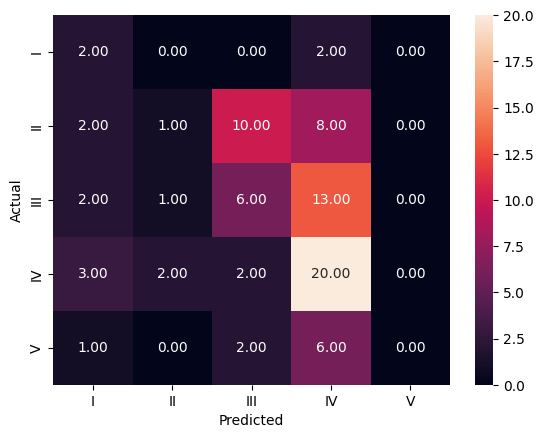

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         4
           1       0.25      0.05      0.08        21
           2       0.30      0.27      0.29        22
           3       0.41      0.74      0.53        27
           4       0.00      0.00      0.00         9

    accuracy                           0.35        83
   macro avg       0.23      0.31      0.24        83
weighted avg       0.29      0.35      0.28        83

BaggingClassifier(max_samples=0.7, n_estimators=50)
***************************************************************************


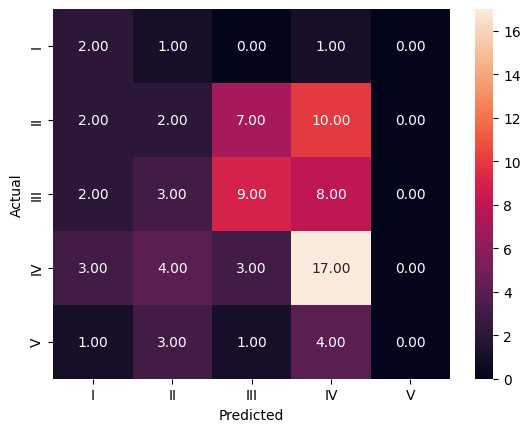

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         4
           1       0.15      0.10      0.12        21
           2       0.45      0.41      0.43        22
           3       0.42      0.63      0.51        27
           4       0.00      0.00      0.00         9

    accuracy                           0.36        83
   macro avg       0.25      0.33      0.27        83
weighted avg       0.31      0.36      0.32        83

AdaBoostClassifier()
***************************************************************************


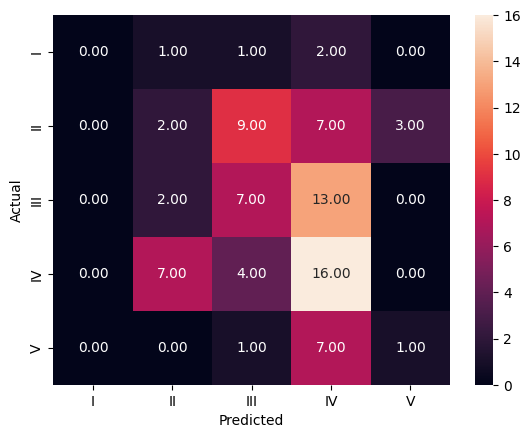

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      0.10      0.12        21
           2       0.32      0.32      0.32        22
           3       0.36      0.59      0.44        27
           4       0.25      0.11      0.15         9

    accuracy                           0.31        83
   macro avg       0.22      0.22      0.21        83
weighted avg       0.27      0.31      0.28        83

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50)
***************************************************************************


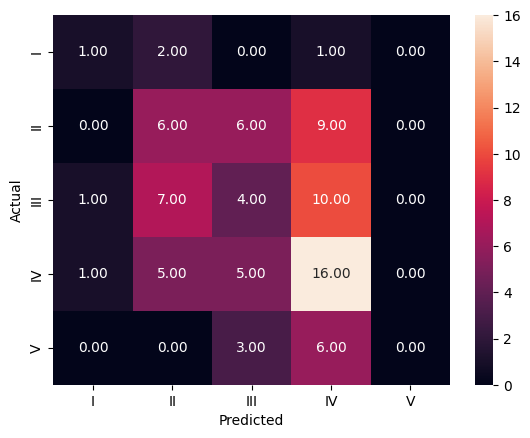

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.30      0.29      0.29        21
           2       0.22      0.18      0.20        22
           3       0.38      0.59      0.46        27
           4       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.25      0.26      0.25        83
weighted avg       0.27      0.33      0.29        83

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              loss_function='MultiClass', max_bin=None, max_cat_threshold=None,
              max_cat_t

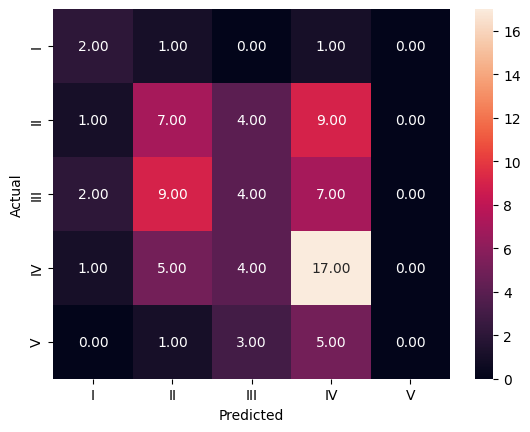

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.30      0.33      0.32        21
           2       0.27      0.18      0.22        22
           3       0.44      0.63      0.52        27
           4       0.00      0.00      0.00         9

    accuracy                           0.36        83
   macro avg       0.27      0.33      0.29        83
weighted avg       0.31      0.36      0.32        83



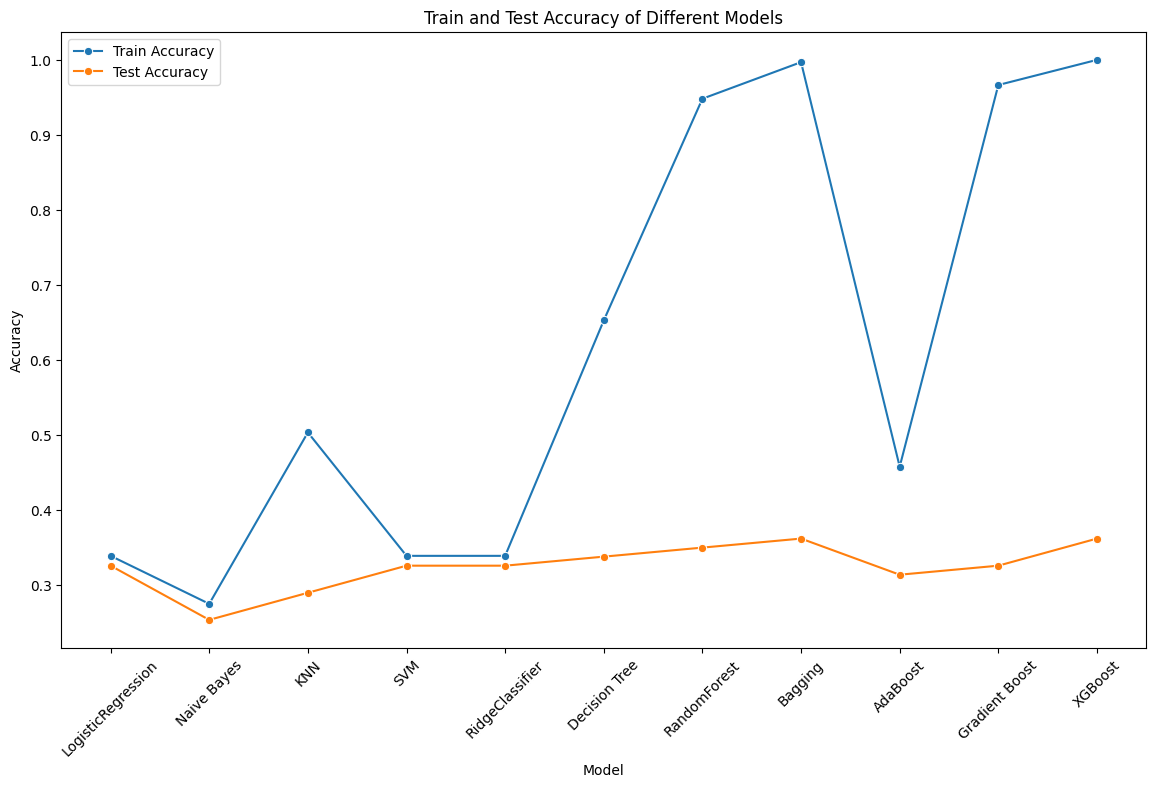

Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1   LogisticRegression        0.338415       0.325301   0.105821  0.325301   
2          Naive Bayes        0.274390       0.253012   0.246264  0.253012   
3                  KNN        0.503049       0.289157   0.337938  0.289157   
4                  SVM        0.338415       0.325301   0.105821  0.325301   
5      RidgeClassifier        0.338415       0.325301   0.105821  0.325301   
6        Decision Tree        0.652439       0.337349   0.291945  0.337349   
7         RandomForest        0.948171       0.349398   0.285186  0.349398   
8              Bagging        0.996951       0.361446   0.306094  0.361446   
9             AdaBoost        0.457317       0.313253   0.269277  0.313253   
10      Gradient Boost        0.966463       0.325301   0.274794  0.325301   
11             XGBoost        1.000000       0.361446   0.305549  0.361446   

    F1-Score  
1   0.159693  
2   0.193823  
3   0.287061  
4   0.159693  
5   0.159693  
6   0.289180  
7   0.280953  
8   0.322211  
9   0.276266  
10  0.291698  
11  0.324671

In [ ]:
#Word2Vec CBOW
ml_models(xtrain_w2v, y_train_new, xtest_w2v, y_test_new)

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


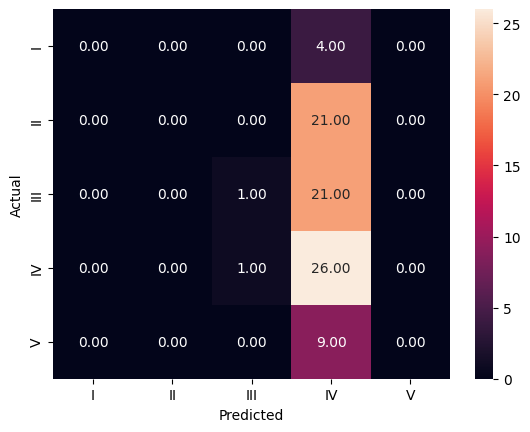

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.50      0.05      0.08        22
           3       0.32      0.96      0.48        27
           4       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.16      0.20      0.11        83
weighted avg       0.24      0.33      0.18        83

GaussianNB()
***************************************************************************


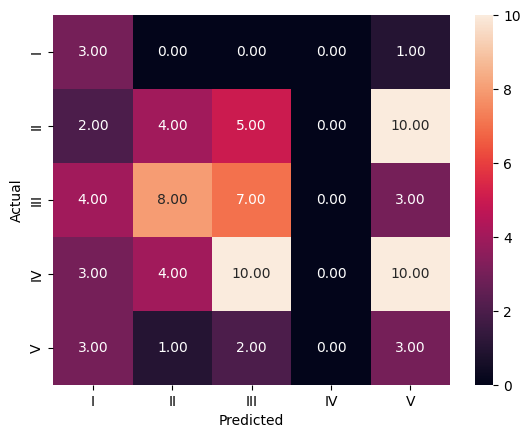

              precision    recall  f1-score   support

           0       0.20      0.75      0.32         4
           1       0.24      0.19      0.21        21
           2       0.29      0.32      0.30        22
           3       0.00      0.00      0.00        27
           4       0.11      0.33      0.17         9

    accuracy                           0.20        83
   macro avg       0.17      0.32      0.20        83
weighted avg       0.16      0.20      0.17        83

KNeighborsClassifier()
***************************************************************************


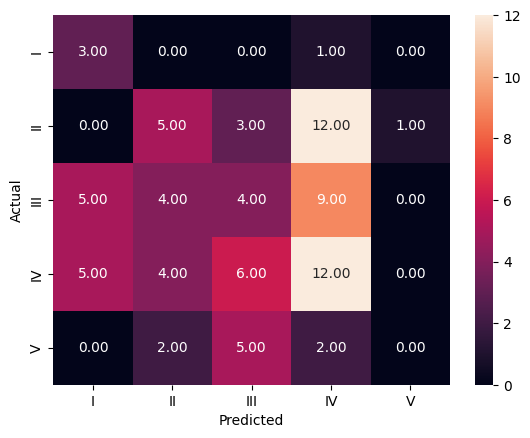

              precision    recall  f1-score   support

           0       0.23      0.75      0.35         4
           1       0.33      0.24      0.28        21
           2       0.22      0.18      0.20        22
           3       0.33      0.44      0.38        27
           4       0.00      0.00      0.00         9

    accuracy                           0.29        83
   macro avg       0.22      0.32      0.24        83
weighted avg       0.26      0.29      0.26        83

SVC(probability=True)
***************************************************************************


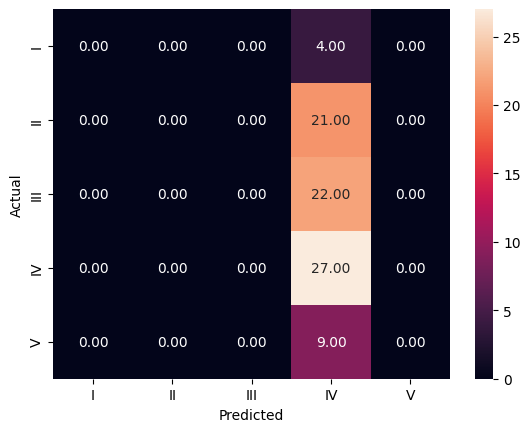

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.33      1.00      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.07      0.20      0.10        83
weighted avg       0.11      0.33      0.16        83

RidgeClassifier(random_state=1)
***************************************************************************


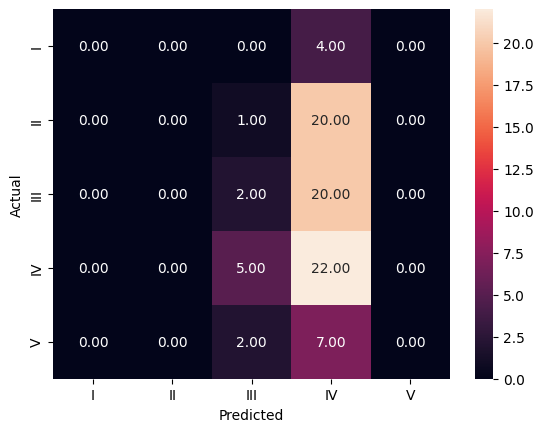

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.20      0.09      0.13        22
           3       0.30      0.81      0.44        27
           4       0.00      0.00      0.00         9

    accuracy                           0.29        83
   macro avg       0.10      0.18      0.11        83
weighted avg       0.15      0.29      0.18        83

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)
***************************************************************************


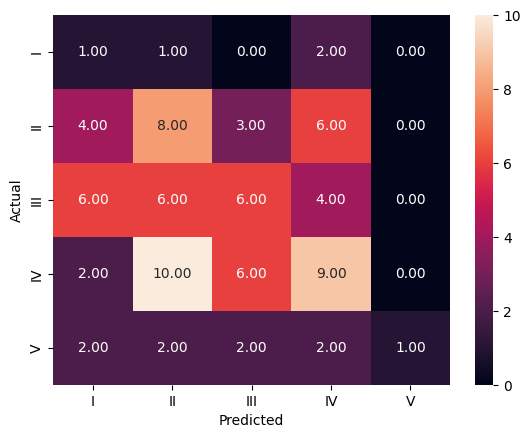

              precision    recall  f1-score   support

           0       0.07      0.25      0.11         4
           1       0.30      0.38      0.33        21
           2       0.35      0.27      0.31        22
           3       0.39      0.33      0.36        27
           4       1.00      0.11      0.20         9

    accuracy                           0.30        83
   macro avg       0.42      0.27      0.26        83
weighted avg       0.41      0.30      0.31        83

RandomForestClassifier(max_depth=7)
***************************************************************************


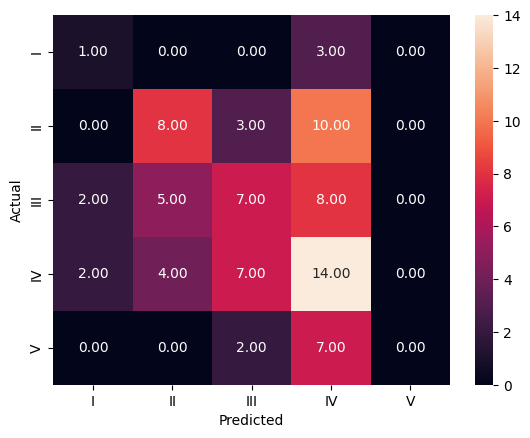

              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.47      0.38      0.42        21
           2       0.37      0.32      0.34        22
           3       0.33      0.52      0.41        27
           4       0.00      0.00      0.00         9

    accuracy                           0.36        83
   macro avg       0.27      0.29      0.28        83
weighted avg       0.33      0.36      0.34        83

BaggingClassifier(max_samples=0.7, n_estimators=50)
***************************************************************************


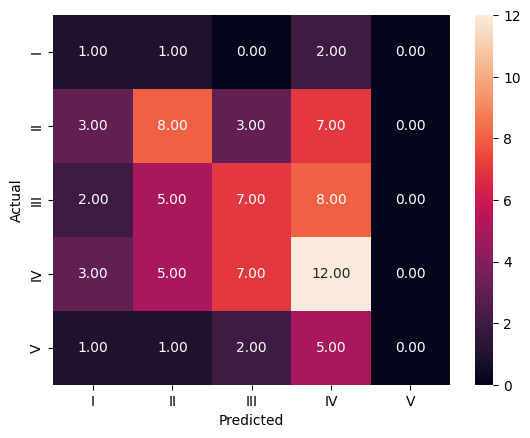

              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.40      0.38      0.39        21
           2       0.37      0.32      0.34        22
           3       0.35      0.44      0.39        27
           4       0.00      0.00      0.00         9

    accuracy                           0.34        83
   macro avg       0.24      0.28      0.25        83
weighted avg       0.32      0.34      0.32        83

AdaBoostClassifier()
***************************************************************************


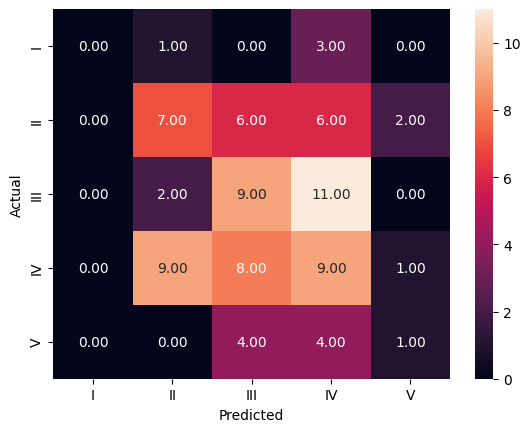

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.37      0.33      0.35        21
           2       0.33      0.41      0.37        22
           3       0.27      0.33      0.30        27
           4       0.25      0.11      0.15         9

    accuracy                           0.31        83
   macro avg       0.24      0.24      0.23        83
weighted avg       0.30      0.31      0.30        83

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50)
***************************************************************************


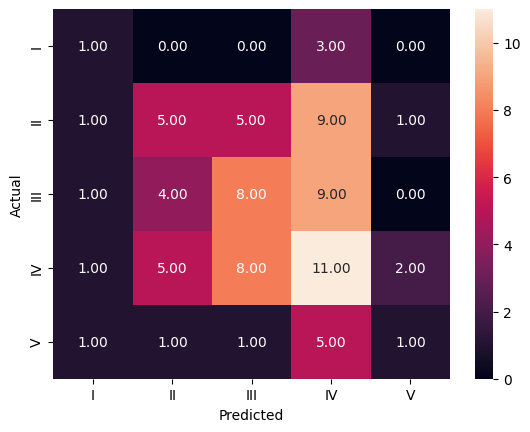

              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.33      0.24      0.28        21
           2       0.36      0.36      0.36        22
           3       0.30      0.41      0.34        27
           4       0.25      0.11      0.15         9

    accuracy                           0.31        83
   macro avg       0.29      0.27      0.27        83
weighted avg       0.31      0.31      0.31        83

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              loss_function='MultiClass', max_bin=None, max_cat_threshold=None,
              max_cat_t

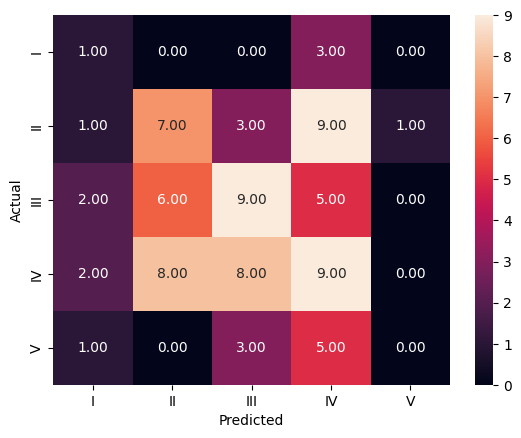

              precision    recall  f1-score   support

           0       0.14      0.25      0.18         4
           1       0.33      0.33      0.33        21
           2       0.39      0.41      0.40        22
           3       0.29      0.33      0.31        27
           4       0.00      0.00      0.00         9

    accuracy                           0.31        83
   macro avg       0.23      0.27      0.25        83
weighted avg       0.29      0.31      0.30        83



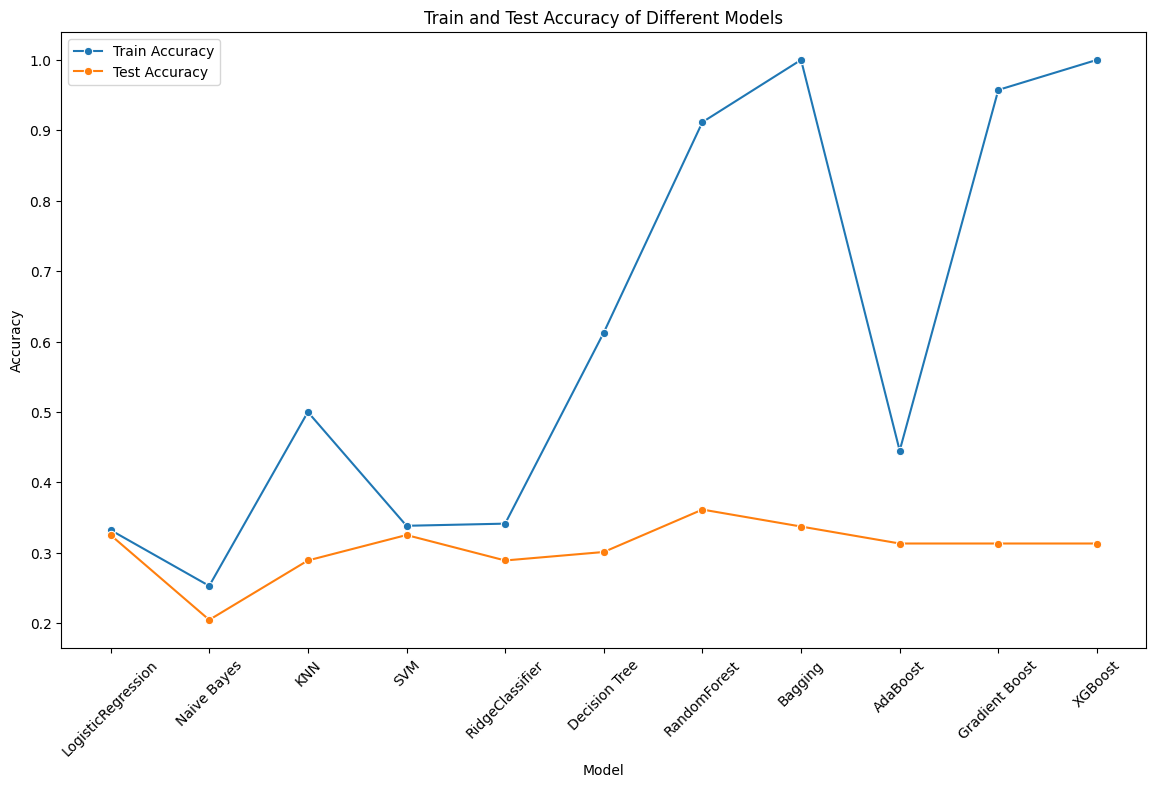

Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1   LogisticRegression        0.332317       0.325301   0.236948  0.325301   
2          Naive Bayes        0.253049       0.204819   0.158528  0.204819   
3                  KNN        0.500000       0.289157   0.262795  0.289157   
4                  SVM        0.338415       0.325301   0.105821  0.325301   
5      RidgeClassifier        0.341463       0.289157   0.151048  0.289157   
6        Decision Tree        0.612805       0.301205   0.407456  0.301205   
7         RandomForest        0.911585       0.361446   0.334791  0.361446   
8              Bagging        1.000000       0.337349   0.318490  0.337349   
9             AdaBoost        0.445122       0.313253   0.297395  0.313253   
10      Gradient Boost        0.957317       0.313253   0.314181  0.313253   
11             XGBoost        1.000000       0.313253   0.289384  0.313253   

    F1-Score  
1   0.178715  
2   0.167227  
3   0.264227  
4   0.159693  
5   0.176265  
6   0.309762  
7   0.339756  
8   0.324117  
9   0.300196  
10  0.305881  
11  0.300079

In [ ]:
#skip-gram
ml_models(xtrain_skip, y_train_new, xtest_skip, y_test_new)

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


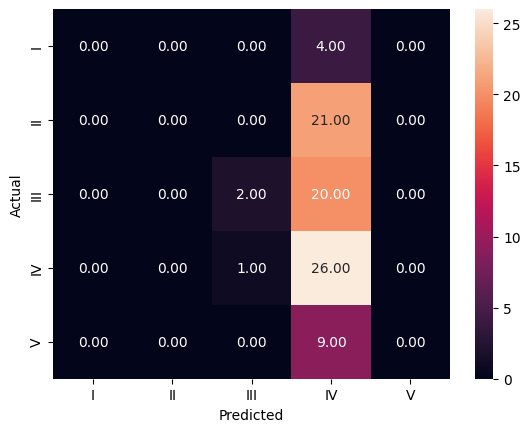

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.67      0.09      0.16        22
           3       0.33      0.96      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.34        83
   macro avg       0.20      0.21      0.13        83
weighted avg       0.28      0.34      0.20        83

GaussianNB()
***************************************************************************


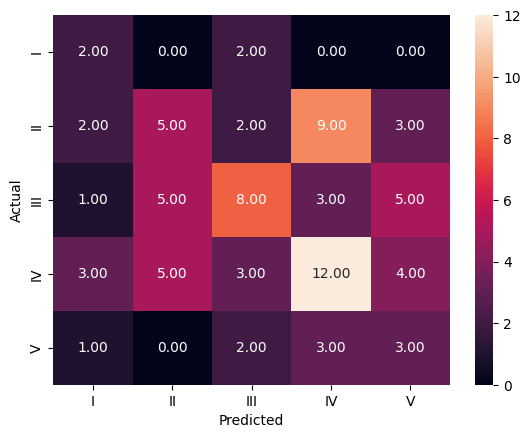

              precision    recall  f1-score   support

           0       0.22      0.50      0.31         4
           1       0.33      0.24      0.28        21
           2       0.47      0.36      0.41        22
           3       0.44      0.44      0.44        27
           4       0.20      0.33      0.25         9

    accuracy                           0.36        83
   macro avg       0.33      0.38      0.34        83
weighted avg       0.39      0.36      0.37        83

KNeighborsClassifier()
***************************************************************************


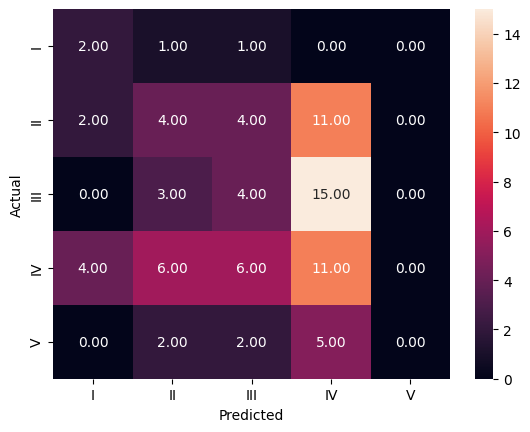

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.25      0.19      0.22        21
           2       0.24      0.18      0.21        22
           3       0.26      0.41      0.32        27
           4       0.00      0.00      0.00         9

    accuracy                           0.25        83
   macro avg       0.20      0.26      0.21        83
weighted avg       0.22      0.25      0.23        83

SVC(probability=True)
***************************************************************************


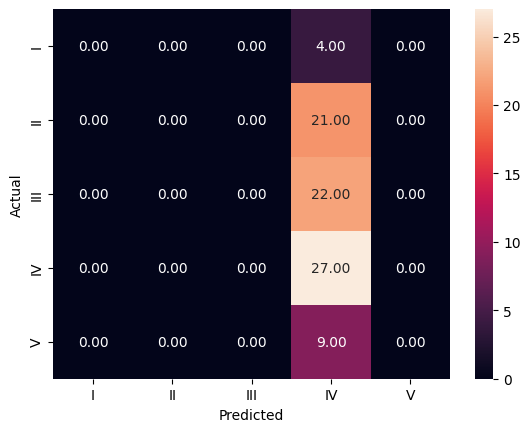

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.33      1.00      0.49        27
           4       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.07      0.20      0.10        83
weighted avg       0.11      0.33      0.16        83

RidgeClassifier(random_state=1)
***************************************************************************


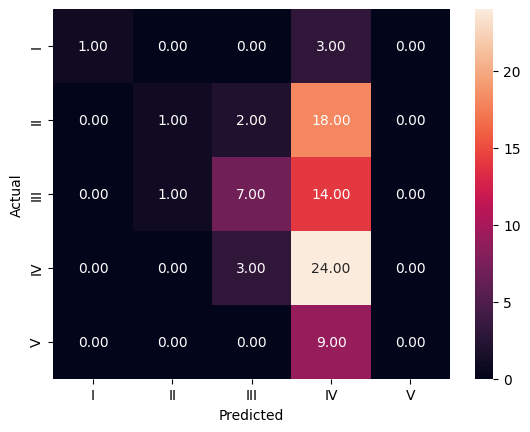

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.50      0.05      0.09        21
           2       0.58      0.32      0.41        22
           3       0.35      0.89      0.51        27
           4       0.00      0.00      0.00         9

    accuracy                           0.40        83
   macro avg       0.49      0.30      0.28        83
weighted avg       0.44      0.40      0.31        83

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)
***************************************************************************


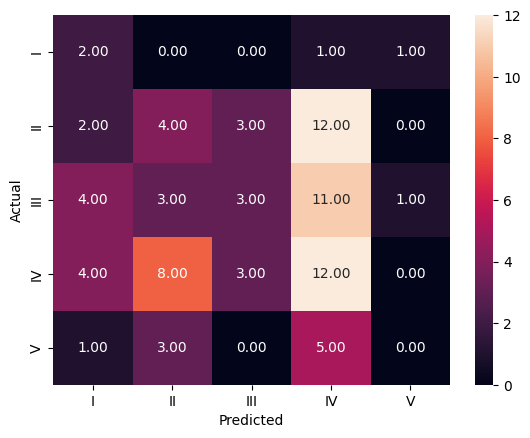

              precision    recall  f1-score   support

           0       0.15      0.50      0.24         4
           1       0.22      0.19      0.21        21
           2       0.33      0.14      0.19        22
           3       0.29      0.44      0.35        27
           4       0.00      0.00      0.00         9

    accuracy                           0.25        83
   macro avg       0.20      0.25      0.20        83
weighted avg       0.25      0.25      0.23        83

RandomForestClassifier(max_depth=7)
***************************************************************************


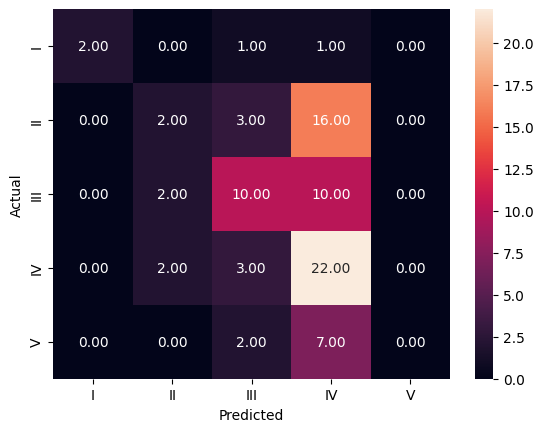

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.33      0.10      0.15        21
           2       0.53      0.45      0.49        22
           3       0.39      0.81      0.53        27
           4       0.00      0.00      0.00         9

    accuracy                           0.43        83
   macro avg       0.45      0.37      0.37        83
weighted avg       0.40      0.43      0.37        83

BaggingClassifier(max_samples=0.7, n_estimators=50)
***************************************************************************


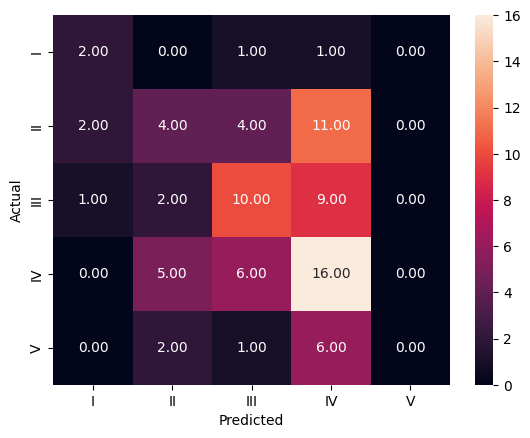

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.31      0.19      0.24        21
           2       0.45      0.45      0.45        22
           3       0.37      0.59      0.46        27
           4       0.00      0.00      0.00         9

    accuracy                           0.39        83
   macro avg       0.31      0.35      0.32        83
weighted avg       0.34      0.39      0.35        83

AdaBoostClassifier()
***************************************************************************


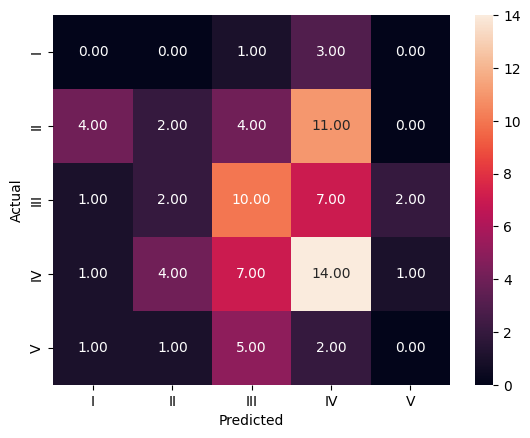

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.22      0.10      0.13        21
           2       0.37      0.45      0.41        22
           3       0.38      0.52      0.44        27
           4       0.00      0.00      0.00         9

    accuracy                           0.31        83
   macro avg       0.19      0.21      0.20        83
weighted avg       0.28      0.31      0.28        83

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50)
***************************************************************************


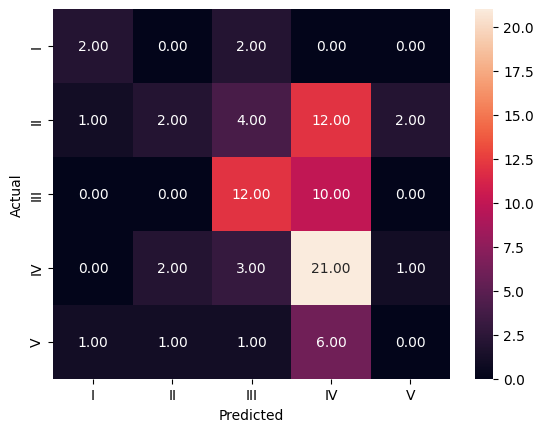

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.40      0.10      0.15        21
           2       0.55      0.55      0.55        22
           3       0.43      0.78      0.55        27
           4       0.00      0.00      0.00         9

    accuracy                           0.45        83
   macro avg       0.37      0.38      0.35        83
weighted avg       0.41      0.45      0.39        83

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              loss_function='MultiClass', max_bin=None, max_cat_threshold=None,
              max_cat_t

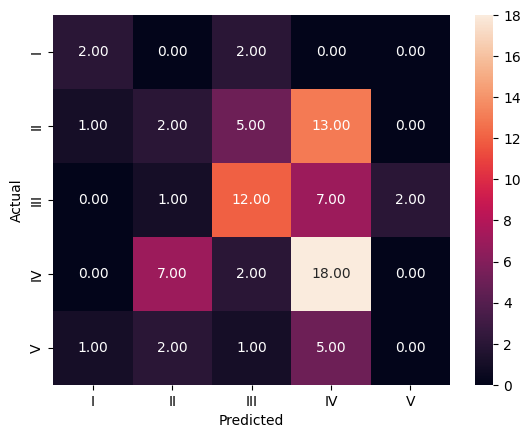

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.17      0.10      0.12        21
           2       0.55      0.55      0.55        22
           3       0.42      0.67      0.51        27
           4       0.00      0.00      0.00         9

    accuracy                           0.41        83
   macro avg       0.33      0.36      0.34        83
weighted avg       0.35      0.41      0.37        83



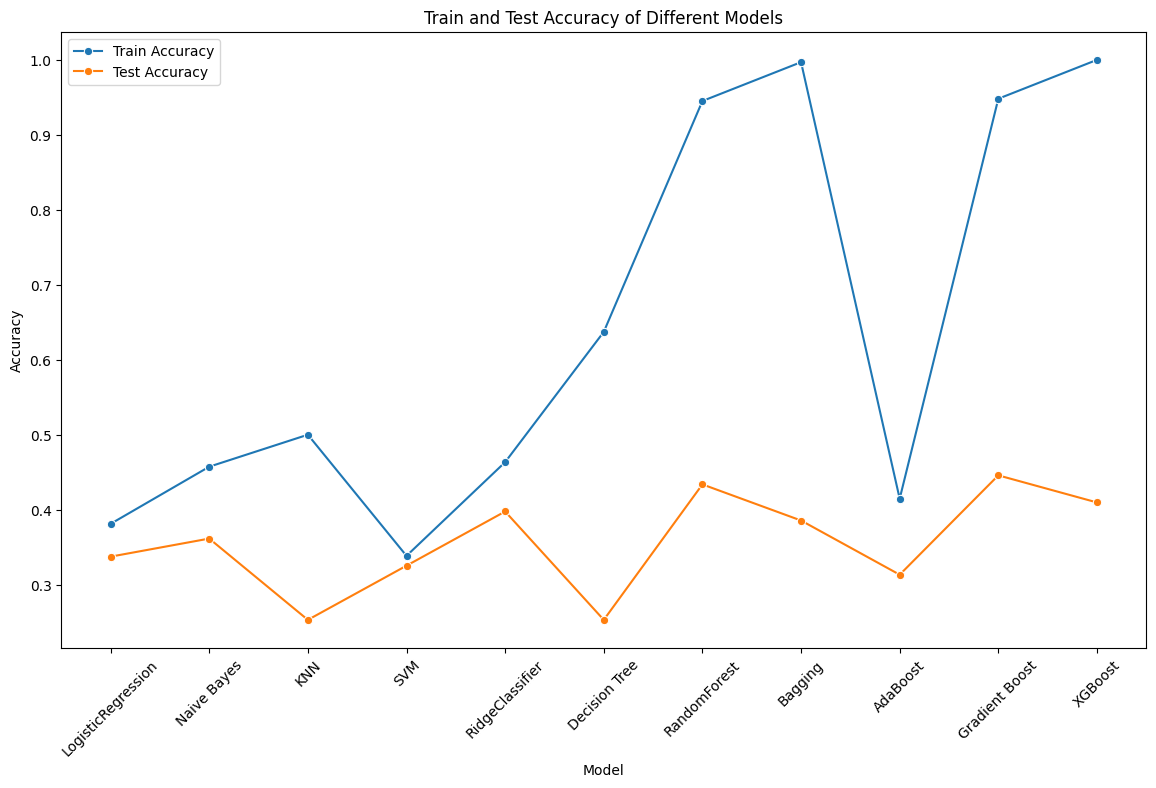

Method  Train Accuracy  Test Accuracy  Precision    Recall  \
1   LogisticRegression        0.381098       0.337349   0.282430  0.337349   
2          Naive Bayes        0.457317       0.361446   0.386046  0.361446   
3                  KNN        0.500000       0.253012   0.222866  0.253012   
4                  SVM        0.338415       0.325301   0.105821  0.325301   
5      RidgeClassifier        0.463415       0.397590   0.444129  0.397590   
6        Decision Tree        0.637195       0.253012   0.247203  0.253012   
7         RandomForest        0.945122       0.433735   0.399832  0.433735   
8              Bagging        0.996951       0.385542   0.338651  0.385542   
9             AdaBoost        0.414634       0.313253   0.277482  0.313253   
10      Gradient Boost        0.948171       0.445783   0.409294  0.445783   
11             XGBoost        1.000000       0.409639   0.347016  0.409639   

    F1-Score  
1   0.200500  
2   0.365539  
3   0.228860  
4   0.159693  
5   0.314783  
6   0.229354  
7   0.371358  
8   0.350142  
9   0.284242  
10  0.387371  
11  0.366641

In [ ]:
ml_models(X_train_glove, y_train_new, X_test_glove, y_test_new)

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search_ml_models(X_train, y_train_new, X_test, y_test_new):
    # creating a dictionary with different ML models and their hyperparameters
    models = {
        'LogisticRegression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1),
            'params': {
                'C': [0.01, 0.1, 1, 10, 100]
            }
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'params': {
                'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']
            }
        },
        'SVM': {
            'model': SVC(kernel='rbf', probability=True),
            'params': {
                'C': [0.1, 1, 10],
                'gamma': [0.001, 0.01, 0.1]
            }
        },
        'RidgeClassifier': {
            'model': RidgeClassifier(random_state=1),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=100, min_samples_leaf=5),
            'params': {
                'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5, 10]
            }
        },
        'RandomForest': {
            'model': RandomForestClassifier(n_estimators=100, max_depth=7),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [5, 7, 10]
            }
        },
        'Bagging': {
            'model': BaggingClassifier(n_estimators=50, max_samples=.7),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_samples': [0.5, 0.7, 1.0]
            }
        },
        'AdaBoost': {
            'model': AdaBoostClassifier(n_estimators=50),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 1]
            }
        },
        'Gradient Boost': {
            'model': GradientBoostingClassifier(n_estimators=50, learning_rate=0.05),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(task_type='GPU', random_state=1, verbose=0),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2]
            }
        },
    }

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, model_params in models.items():
        model = model_params['model']
        params = model_params['params']

         # Perform GridSearchCV
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train_new)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Train the best model on the entire training set
        best_model.fit(X_train, y_train_new)

        # Evaluate the best model on the test set
        test_score = best_model.score(X_test, y_test_new)

        # Store the results
        result = {
            'model': name,
            'best_params': best_params,
            'train_score': best_score,
            'test_score': test_score
        }

        resultsDf_common = pd.concat([resultsDf_common, pd.DataFrame([result])], ignore_index=True)
        i = i + 1
    # Plotting the train and test accuracy
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=resultsDf_common.melt(id_vars=['model'], value_vars=['train_score', 'test_score'], var_name='type', value_name='accuracy'), x='model', y='accuracy', hue='type', marker='o')
    plt.xticks(rotation=45)
    plt.title('Train and Test Accuracy of Different Models')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend(title='Dataset')
    plt.show()
    return resultsDf_common


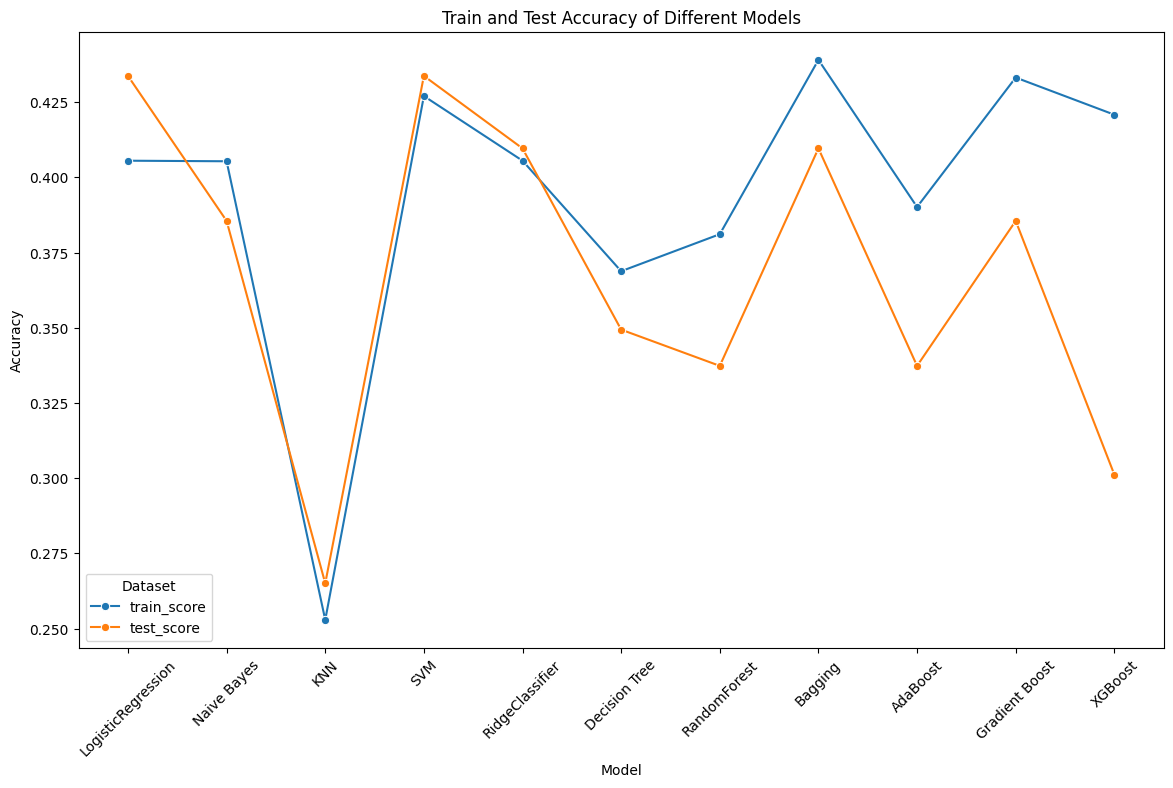

model                                   best_params  \
0   LogisticRegression                                     {'C': 10}   
1          Naive Bayes                      {'var_smoothing': 1e-09}   
2                  KNN     {'n_neighbors': 3, 'weights': 'distance'}   
3                  SVM                      {'C': 10, 'gamma': 0.01}   
4      RidgeClassifier                                {'alpha': 0.1}   
5        Decision Tree      {'max_depth': 5, 'min_samples_split': 2}   
6         RandomForest         {'max_depth': 10, 'n_estimators': 50}   
7              Bagging      {'max_samples': 0.7, 'n_estimators': 50}   
8             AdaBoost  {'learning_rate': 0.01, 'n_estimators': 200}   
9       Gradient Boost    {'learning_rate': 0.1, 'n_estimators': 50}   
10             XGBoost  {'learning_rate': 0.01, 'n_estimators': 200}   

    train_score  test_score  
0      0.405548    0.433735  
1      0.405361    0.385542  
2      0.252914    0.265060  
3      0.427040    0.433735  
4      0.405548    0.409639  
5      0.368811    0.349398  
6      0.381119    0.337349  
7      0.439068    0.409639  
8      0.390163    0.337349  
9      0.433193    0.385542  
10     0.420839    0.301205

In [ ]:
 #BOW hyperparameter tuning
grid_search_ml_models(X_train_bow.toarray(), y_train_new, X_test_bow.toarray(), y_test_new)

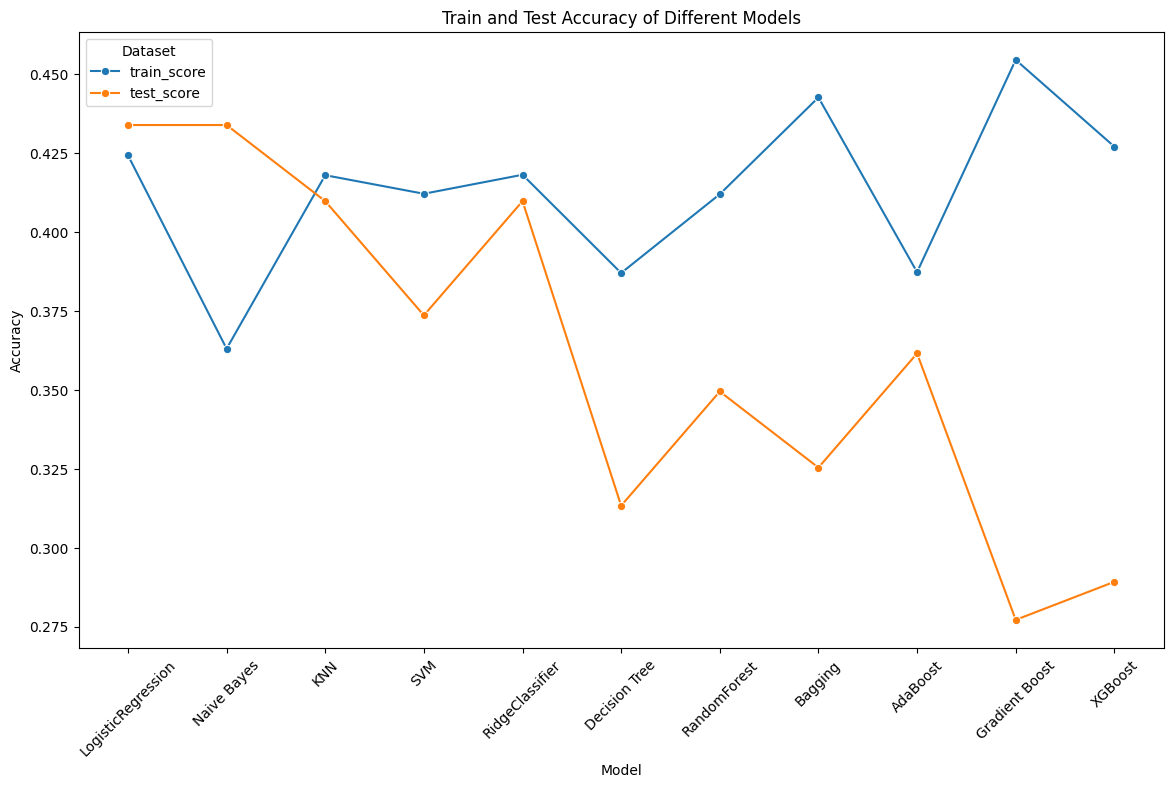

model                                   best_params  \
0   LogisticRegression                                     {'C': 10}   
1          Naive Bayes                      {'var_smoothing': 1e-09}   
2                  KNN     {'n_neighbors': 9, 'weights': 'distance'}   
3                  SVM                       {'C': 10, 'gamma': 0.1}   
4      RidgeClassifier                                  {'alpha': 1}   
5        Decision Tree      {'max_depth': 5, 'min_samples_split': 2}   
6         RandomForest        {'max_depth': 10, 'n_estimators': 100}   
7              Bagging     {'max_samples': 0.7, 'n_estimators': 100}   
8             AdaBoost   {'learning_rate': 0.01, 'n_estimators': 50}   
9       Gradient Boost    {'learning_rate': 0.2, 'n_estimators': 50}   
10             XGBoost  {'learning_rate': 0.01, 'n_estimators': 200}   

    train_score  test_score  
0      0.424149    0.433735  
1      0.362937    0.433735  
2      0.417855    0.409639  
3      0.411981    0.373494  
4      0.417995    0.409639  
5      0.386900    0.313253  
6      0.411841    0.349398  
7      0.442471    0.325301  
8      0.387179    0.361446  
9      0.454359    0.277108  
10     0.426900    0.289157

In [ ]:
#TF_IDF model hyperparameter tuning
grid_search_ml_models(X_train_tf.toarray(), y_train_new, X_test_tf.toarray(), y_test_new)

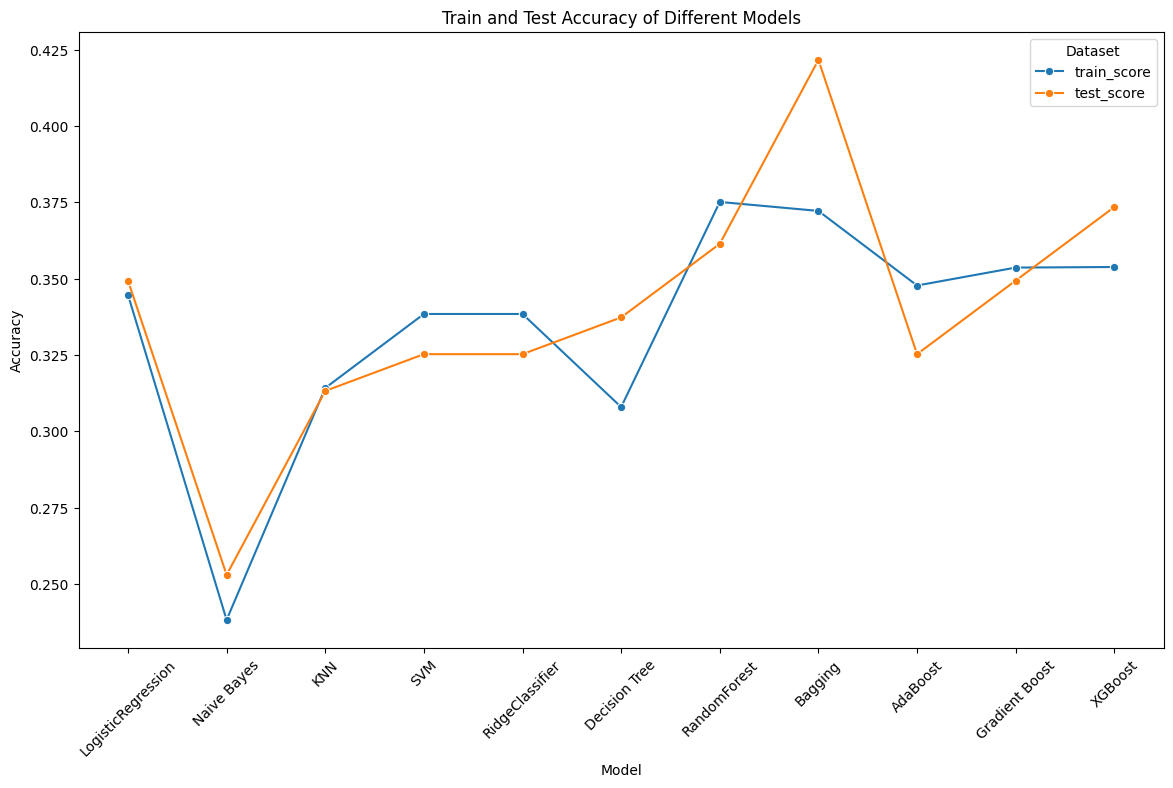

model                                  best_params  \
0   LogisticRegression                                   {'C': 100}   
1          Naive Bayes                     {'var_smoothing': 1e-09}   
2                  KNN     {'n_neighbors': 9, 'weights': 'uniform'}   
3                  SVM                   {'C': 0.1, 'gamma': 0.001}   
4      RidgeClassifier                                 {'alpha': 1}   
5        Decision Tree     {'max_depth': 3, 'min_samples_split': 2}   
6         RandomForest         {'max_depth': 7, 'n_estimators': 50}   
7              Bagging    {'max_samples': 0.7, 'n_estimators': 100}   
8             AdaBoost  {'learning_rate': 0.1, 'n_estimators': 100}   
9       Gradient Boost   {'learning_rate': 0.2, 'n_estimators': 50}   
10             XGBoost  {'learning_rate': 0.2, 'n_estimators': 100}   

    train_score  test_score  
0      0.344755    0.349398  
1      0.238275    0.253012  
2      0.314219    0.313253  
3      0.338462    0.325301  
4      0.338462    0.325301  
5      0.307972    0.337349  
6      0.375152    0.361446  
7      0.372214    0.421687  
8      0.347786    0.325301  
9      0.353660    0.349398  
10     0.353846    0.373494

In [ ]:
#CBOW w2v hyperparameter tuning
grid_search_ml_models(xtrain_w2v, y_train_new, xtest_w2v, y_test_new)

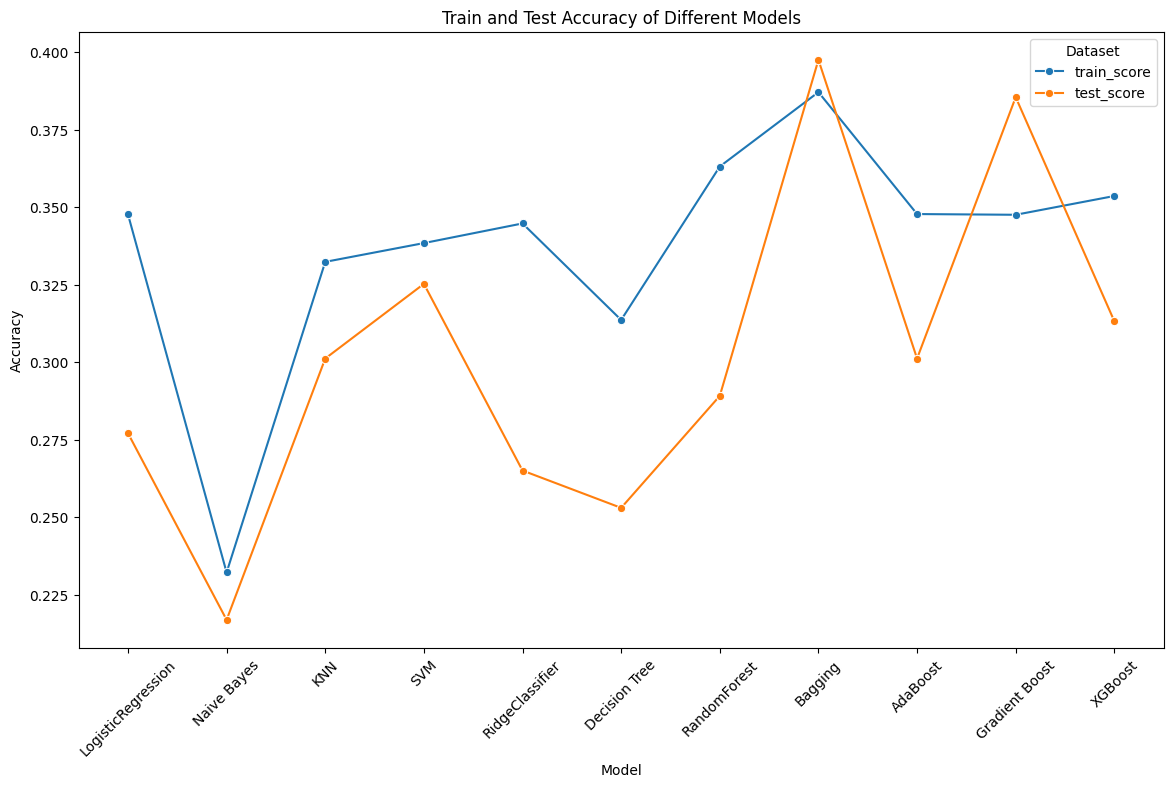

model                                   best_params  \
0   LogisticRegression                                    {'C': 100}   
1          Naive Bayes                      {'var_smoothing': 1e-09}   
2                  KNN     {'n_neighbors': 7, 'weights': 'distance'}   
3                  SVM                    {'C': 0.1, 'gamma': 0.001}   
4      RidgeClassifier                                {'alpha': 0.1}   
5        Decision Tree      {'max_depth': 5, 'min_samples_split': 2}   
6         RandomForest         {'max_depth': 5, 'n_estimators': 200}   
7              Bagging     {'max_samples': 1.0, 'n_estimators': 100}   
8             AdaBoost  {'learning_rate': 0.01, 'n_estimators': 200}   
9       Gradient Boost   {'learning_rate': 0.1, 'n_estimators': 200}   
10             XGBoost   {'learning_rate': 0.2, 'n_estimators': 100}   

    train_score  test_score  
0      0.347739    0.277108  
1      0.232168    0.216867  
2      0.332401    0.301205  
3      0.338462    0.325301  
4      0.344802    0.265060  
5      0.313660    0.253012  
6      0.363170    0.289157  
7      0.387179    0.397590  
8      0.347832    0.301205  
9      0.347599    0.385542  
10     0.353660    0.313253

In [ ]:
#Skip gram w2v hyperparameter tuning
grid_search_ml_models(xtrain_skip, y_train_new, xtest_skip, y_test_new)

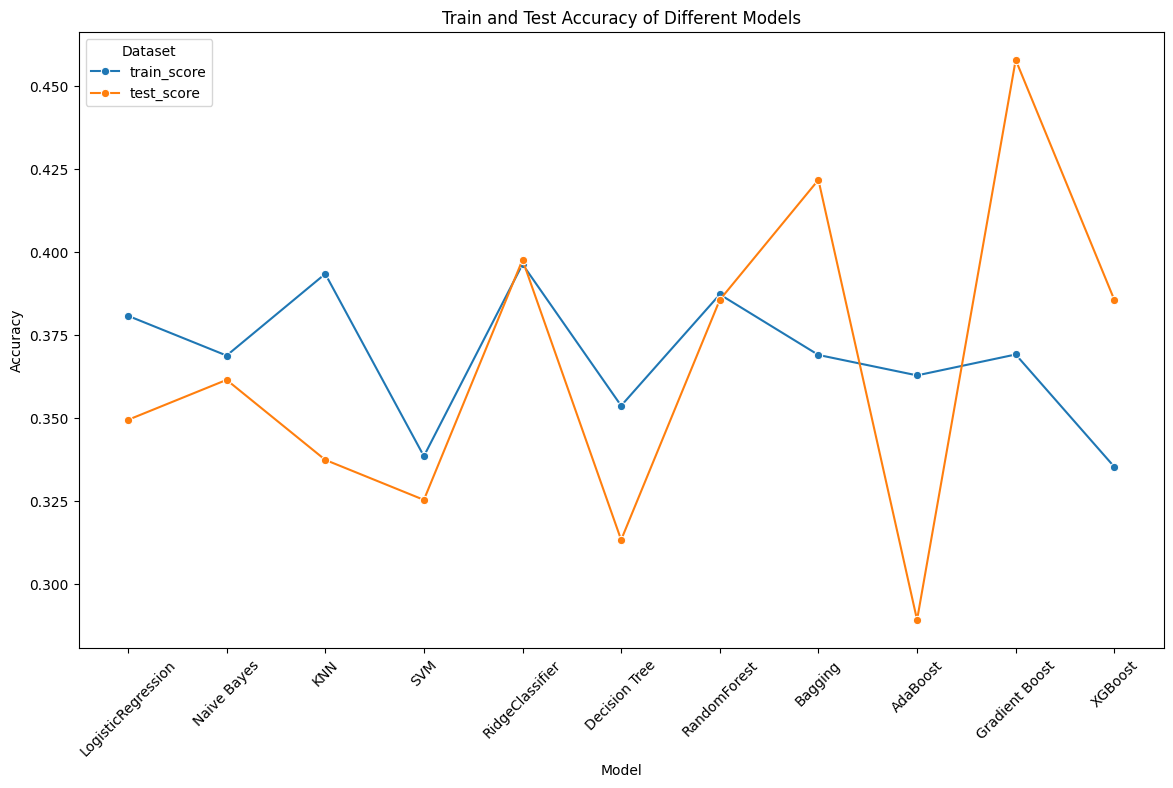

model                                   best_params  \
0   LogisticRegression                                     {'C': 10}   
1          Naive Bayes                      {'var_smoothing': 1e-09}   
2                  KNN     {'n_neighbors': 9, 'weights': 'distance'}   
3                  SVM                    {'C': 0.1, 'gamma': 0.001}   
4      RidgeClassifier                                  {'alpha': 1}   
5        Decision Tree      {'max_depth': 3, 'min_samples_split': 2}   
6         RandomForest         {'max_depth': 10, 'n_estimators': 50}   
7              Bagging     {'max_samples': 0.5, 'n_estimators': 100}   
8             AdaBoost   {'learning_rate': 0.01, 'n_estimators': 50}   
9       Gradient Boost    {'learning_rate': 0.1, 'n_estimators': 50}   
10             XGBoost  {'learning_rate': 0.01, 'n_estimators': 200}   

    train_score  test_score  
0      0.380746    0.349398  
1      0.368765    0.361446  
2      0.393380    0.337349  
3      0.338462    0.325301  
4      0.396270    0.397590  
5      0.353660    0.313253  
6      0.387179    0.385542  
7      0.368951    0.421687  
8      0.362797    0.289157  
9      0.369091    0.457831  
10     0.335245    0.385542

In [ ]:
#Glove model hyperparameter tuning
grid_search_ml_models(X_train_glove, y_train_new, X_test_glove, y_test_new)